<a href="https://colab.research.google.com/github/dewirizki/datathon2021/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 80 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 19.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=ed49d271bdc49a38a3145b1ff79dc386166197e19249d33d4ffd213464a59d08
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=977edfc01e36994064e03d3454608544d40b02eb0bb451324f75919c82fc4711
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
--2021-09-03 12:27:23--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133

In [ ]:
import pandas as pd
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, tau_unsup as tau
import plotly.express as px

# Meload Dataset

In [ ]:
#Import Data
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/malinaafemi/datathon2021/main/Tingkat%20Vaksinasi%20COVID-19%20Indonesia%20beserta%20Luas%20dan%20Jumlah%20Penduduk.csv

--2021-09-03 12:27:44--  https://raw.githubusercontent.com/malinaafemi/datathon2021/main/Tingkat%20Vaksinasi%20COVID-19%20Indonesia%20beserta%20Luas%20dan%20Jumlah%20Penduduk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51396 (50K) [text/plain]
Saving to: ‘data/Tingkat Vaksinasi COVID-19 Indonesia beserta Luas dan Jumlah Penduduk.csv’

Tingkat Vaksinasi C 100%[===================>]  50.19K  --.-KB/s    in 0.01s   

2021-09-03 12:27:44 (3.65 MB/s) - ‘data/Tingkat Vaksinasi COVID-19 Indonesia beserta Luas dan Jumlah Penduduk.csv’ saved [51396/51396]



## Dibuat menjadi dataframe

In [ ]:
data = pd.read_csv("/content/data/Tingkat Vaksinasi COVID-19 Indonesia beserta Luas dan Jumlah Penduduk.csv")

In [ ]:
data

Tanggal     Kota  ... Jumlah Penduduk  Luas Daerah
0     07/05/2021  Jakarta  ...        10562088       664.01
1     07/06/2021  Jakarta  ...        10562088       664.01
2     07/07/2021  Jakarta  ...        10562088       664.01
3     07/08/2021  Jakarta  ...        10562088       664.01
4     07/09/2021  Jakarta  ...        10562088       664.01
...          ...      ...  ...             ...          ...
1051  08/01/2021  Lampung  ...         9007848     34623.80
1052  08/02/2021  Lampung  ...         9007848     34623.80
1053  08/03/2021  Lampung  ...         9007848     34623.80
1054  08/04/2021  Lampung  ...         9007848     34623.80
1055  08/05/2021  Lampung  ...         9007848     34623.80

[1056 rows x 6 columns]

In [ ]:
data.head(10)

Tanggal     Kota  ... Jumlah Penduduk  Luas Daerah
0  07/05/2021  Jakarta  ...        10562088       664.01
1  07/06/2021  Jakarta  ...        10562088       664.01
2  07/07/2021  Jakarta  ...        10562088       664.01
3  07/08/2021  Jakarta  ...        10562088       664.01
4  07/09/2021  Jakarta  ...        10562088       664.01
5  07/10/2021  Jakarta  ...        10562088       664.01
6  07/11/2021  Jakarta  ...        10562088       664.01
7  07/12/2021  Jakarta  ...        10562088       664.01
8  07/13/2021  Jakarta  ...        10562088       664.01
9  07/14/2021  Jakarta  ...        10562088       664.01

[10 rows x 6 columns]

In [ ]:
data

Tanggal     Kota  ... Jumlah Penduduk  Luas Daerah
0     07/05/2021  Jakarta  ...        10562088       664.01
1     07/06/2021  Jakarta  ...        10562088       664.01
2     07/07/2021  Jakarta  ...        10562088       664.01
3     07/08/2021  Jakarta  ...        10562088       664.01
4     07/09/2021  Jakarta  ...        10562088       664.01
...          ...      ...  ...             ...          ...
1051  08/01/2021  Lampung  ...         9007848     34623.80
1052  08/02/2021  Lampung  ...         9007848     34623.80
1053  08/03/2021  Lampung  ...         9007848     34623.80
1054  08/04/2021  Lampung  ...         9007848     34623.80
1055  08/05/2021  Lampung  ...         9007848     34623.80

[1056 rows x 6 columns]

In [ ]:
data.tail(10)

Tanggal     Kota  ... Jumlah Penduduk  Luas Daerah
1046  07/27/2021  Lampung  ...         9007848      34623.8
1047  07/28/2021  Lampung  ...         9007848      34623.8
1048  07/29/2021  Lampung  ...         9007848      34623.8
1049  07/30/2021  Lampung  ...         9007848      34623.8
1050  07/31/2021  Lampung  ...         9007848      34623.8
1051  08/01/2021  Lampung  ...         9007848      34623.8
1052  08/02/2021  Lampung  ...         9007848      34623.8
1053  08/03/2021  Lampung  ...         9007848      34623.8
1054  08/04/2021  Lampung  ...         9007848      34623.8
1055  08/05/2021  Lampung  ...         9007848      34623.8

[10 rows x 6 columns]

In [ ]:
data.sample(10)

Tanggal              Kota  ... Jumlah Penduduk  Luas Daerah
253  08/03/2021         Kep. Riau  ...         2064564      8201.72
75   07/16/2021        yogyakarta  ...         3668719      3133.15
680  07/13/2021    Sulawesi Barat  ...         1419229     16787.18
240  07/21/2021         Kep. Riau  ...         2064564      8201.72
331  07/16/2021         Gorontalo  ...         1171681     11257.07
279  07/28/2021    Sulawesi Utara  ...         2621923     13892.47
320  07/05/2021         Gorontalo  ...         1171681     11257.07
974  07/19/2021  Kalimantan Barat  ...         5414390    147307.00
983  07/28/2021  Kalimantan Barat  ...         5414390    147307.00
294  07/11/2021             Jambi  ...         3548228     50058.16

[10 rows x 6 columns]

In [ ]:
data.columns

Index(['Tanggal', 'Kota', 'Tingkat Vaksinasi', 'Dalam atau Luar Jawa Bali',
       'Jumlah Penduduk', 'Luas Daerah'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tanggal                    1056 non-null   object 
 1   Kota                       1056 non-null   object 
 2   Tingkat Vaksinasi          1056 non-null   object 
 3   Dalam atau Luar Jawa Bali  1056 non-null   int64  
 4   Jumlah Penduduk            1056 non-null   int64  
 5   Luas Daerah                1056 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 49.6+ KB


In [ ]:
data['Tanggal'] = data['Tanggal'].astype('datetime64')
data.dtypes

Tanggal                      datetime64[ns]
Kota                                 object
Tingkat Vaksinasi                    object
Dalam atau Luar Jawa Bali             int64
Jumlah Penduduk                       int64
Luas Daerah                         float64
dtype: object

In [ ]:
data.dtypes

Tanggal                      datetime64[ns]
Kota                                 object
Tingkat Vaksinasi                    object
Dalam atau Luar Jawa Bali             int64
Jumlah Penduduk                       int64
Luas Daerah                         float64
dtype: object

In [ ]:
data['Tingkat Vaksinasi'] = data['Tingkat Vaksinasi'].str.rstrip('%').astype('float') / 100.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal                    1056 non-null   datetime64[ns]
 1   Kota                       1056 non-null   object        
 2   Tingkat Vaksinasi          1056 non-null   float64       
 3   Dalam atau Luar Jawa Bali  1056 non-null   int64         
 4   Jumlah Penduduk            1056 non-null   int64         
 5   Luas Daerah                1056 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 49.6+ KB


In [ ]:
data['Dalam atau Luar Jawa Bali'] = data['Dalam atau Luar Jawa Bali'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Tanggal                    1056 non-null   datetime64[ns]
 1   Kota                       1056 non-null   object        
 2   Tingkat Vaksinasi          1056 non-null   float64       
 3   Dalam atau Luar Jawa Bali  1056 non-null   category      
 4   Jumlah Penduduk            1056 non-null   int64         
 5   Luas Daerah                1056 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 42.5+ KB


In [ ]:
penduduk = data.groupby('Kota', as_index=False)['Jumlah Penduduk'].\
    mean().dropna()
penduduk

Kota  Jumlah Penduduk
0                 Aceh          5274871
1                 Bali          4317404
2      Bangka Belitung          1455678
3               Banten         11904562
4             Bengkulu          2010670
5            Gorontalo          1171681
6              Jakarta         10562088
7                Jambi          3548228
8           Jawa Barat         48274162
9           Jawa Timur         40665696
10         Jawa tengah         36516035
11    Kalimantan Barat          5414390
12  Kalimantan Selatan          4073584
13   Kalimantan Tengah          2669969
14    Kalimantan Timur          3766039
15    Kalimantan Utara           701814
16           Kep. Riau          2064564
17             Lampung          9007848
18              Maluku          1848923
19                 NTB          5320092
20                 NTT          5325566
21               Papua          4303707
22         Papua Barat          1134068
23                Riau          6394087
24      Sulawesi Barat          1419229
25    Sulawesi Selatan          9073509
26     Sulawesi Tengah          2985734
27   Sulawesi Tenggara          2624875
28      Sulawesi Utara          2621923
29      Sumatera Barat          5534472
30    Sumatera Selatan          8467432
31      Sumatera Utara         14799361
32          yogyakarta          3668719

In [ ]:
luas = data.groupby('Kota', as_index=False)['Luas Daerah'].\
    mean().dropna()
luas

Kota  Luas Daerah
0                 Aceh     57956.00
1                 Bali      5780.06
2      Bangka Belitung     16424.06
3               Banten      9662.92
4             Bengkulu     19919.33
5            Gorontalo     11257.07
6              Jakarta       664.01
7                Jambi     50058.16
8           Jawa Barat     35377.76
9           Jawa Timur     47803.49
10         Jawa tengah     32800.69
11    Kalimantan Barat    147307.00
12  Kalimantan Selatan     38744.23
13   Kalimantan Tengah    153564.50
14    Kalimantan Timur    129066.64
15    Kalimantan Utara     75467.70
16           Kep. Riau      8201.72
17             Lampung     34623.80
18              Maluku     46914.03
19                 NTB     18572.32
20                 NTT     48718.10
21               Papua    319036.05
22         Papua Barat    102955.15
23                Riau     87023.66
24      Sulawesi Barat     16787.18
25    Sulawesi Selatan     46717.48
26     Sulawesi Tengah     61841.29
27   Sulawesi Tenggara     38067.70
28      Sulawesi Utara     13892.47
29      Sumatera Barat     42012.89
30    Sumatera Selatan     91592.43
31      Sumatera Utara     72981.23
32          yogyakarta      3133.15

In [ ]:
df = pd.concat([luas,penduduk['Jumlah Penduduk']], axis=1)

In [ ]:
df

Kota  Luas Daerah  Jumlah Penduduk
0                 Aceh     57956.00          5274871
1                 Bali      5780.06          4317404
2      Bangka Belitung     16424.06          1455678
3               Banten      9662.92         11904562
4             Bengkulu     19919.33          2010670
5            Gorontalo     11257.07          1171681
6              Jakarta       664.01         10562088
7                Jambi     50058.16          3548228
8           Jawa Barat     35377.76         48274162
9           Jawa Timur     47803.49         40665696
10         Jawa tengah     32800.69         36516035
11    Kalimantan Barat    147307.00          5414390
12  Kalimantan Selatan     38744.23          4073584
13   Kalimantan Tengah    153564.50          2669969
14    Kalimantan Timur    129066.64          3766039
15    Kalimantan Utara     75467.70           701814
16           Kep. Riau      8201.72          2064564
17             Lampung     34623.80          9007848
18              Maluku     46914.03          1848923
19                 NTB     18572.32          5320092
20                 NTT     48718.10          5325566
21               Papua    319036.05          4303707
22         Papua Barat    102955.15          1134068
23                Riau     87023.66          6394087
24      Sulawesi Barat     16787.18          1419229
25    Sulawesi Selatan     46717.48          9073509
26     Sulawesi Tengah     61841.29          2985734
27   Sulawesi Tenggara     38067.70          2624875
28      Sulawesi Utara     13892.47          2621923
29      Sumatera Barat     42012.89          5534472
30    Sumatera Selatan     91592.43          8467432
31      Sumatera Utara     72981.23         14799361
32          yogyakarta      3133.15          3668719

In [ ]:
fig = px.bar(df, x='Kota', y="Luas Daerah", title = 'Luas Daerah Provinsi di Indonesia', width=1200, height=700, color="Kota")
fig.show()

In [ ]:
fig2 = px.bar(df, x='Kota', y="Jumlah Penduduk", title = 'Jumlah Penduduk Provinsi-provinsi di Indonesia', width=1200, height=700, color="Kota")
fig2.show()

In [ ]:
fig3 = px.scatter(df, x="Luas Daerah", y="Jumlah Penduduk", color="Kota", width=900, height=800)
fig3.show()

## Statistika Sederhana

In [ ]:
#Statistika Deskriptif kesuluruhan variabel
df.describe(include='all')

Kota    Luas Daerah  Jumlah Penduduk
count      33      33.000000     3.300000e+01
unique     33            NaN              NaN
top     Papua            NaN              NaN
freq        1            NaN              NaN
mean      NaN   57118.917273     8.149121e+06
std       NaN   61854.800970     1.140399e+07
min       NaN     664.010000     7.018140e+05
25%       NaN   16787.180000     2.621923e+06
50%       NaN   42012.890000     4.303707e+06
75%       NaN   72981.230000     8.467432e+06
max       NaN  319036.050000     4.827416e+07

In [ ]:
#statistika deskriptif jumlah penduduk dan luas daerah
df[['Jumlah Penduduk','Luas Daerah']].describe(include='all')

Jumlah Penduduk    Luas Daerah
count     3.300000e+01      33.000000
mean      8.149121e+06   57118.917273
std       1.140399e+07   61854.800970
min       7.018140e+05     664.010000
25%       2.621923e+06   16787.180000
50%       4.303707e+06   42012.890000
75%       8.467432e+06   72981.230000
max       4.827416e+07  319036.050000

# Elbow Curve

## K-Means

In [ ]:
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

In [ ]:
X = df[['Luas Daerah','Jumlah Penduduk']].values

Text(0.5, 1.0, 'Elbow curve')

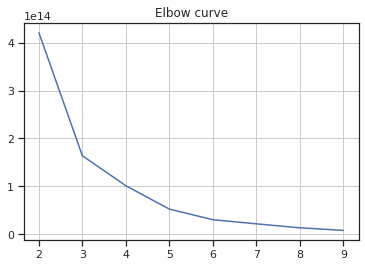

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


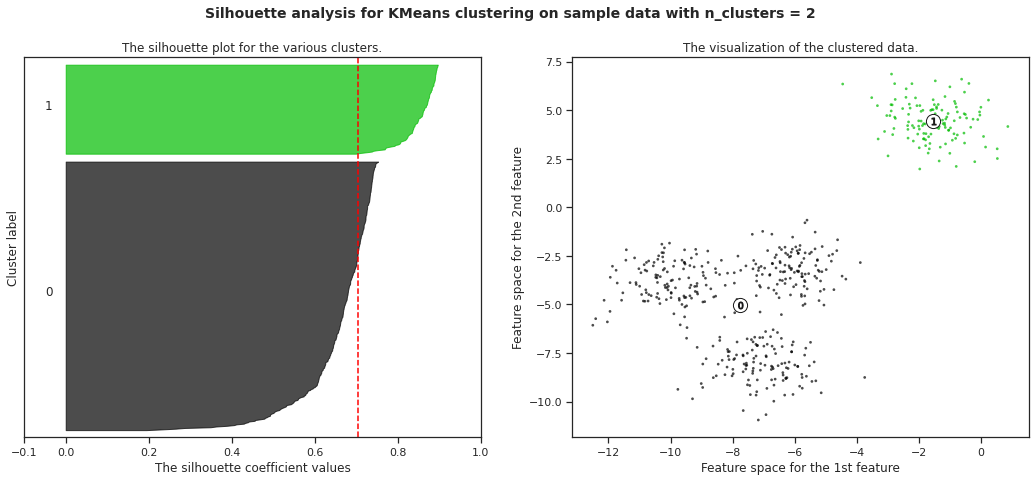

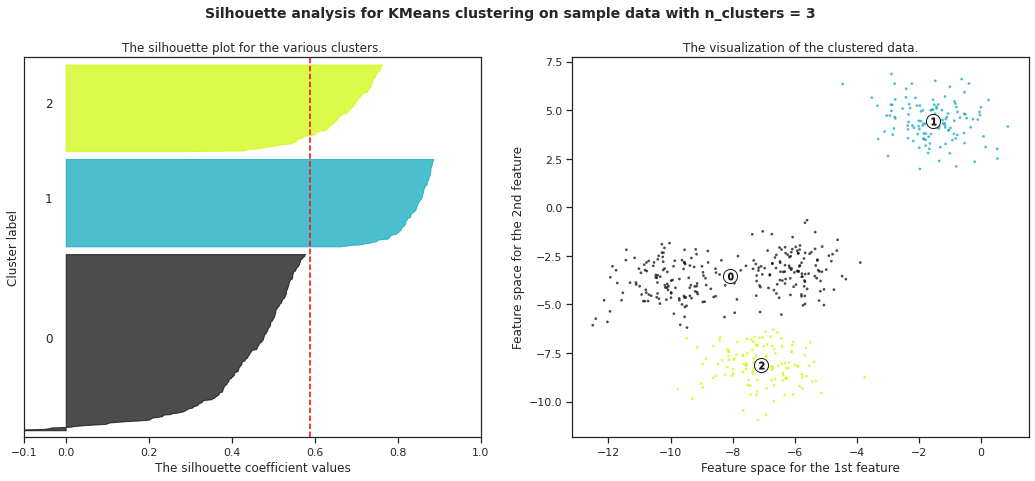

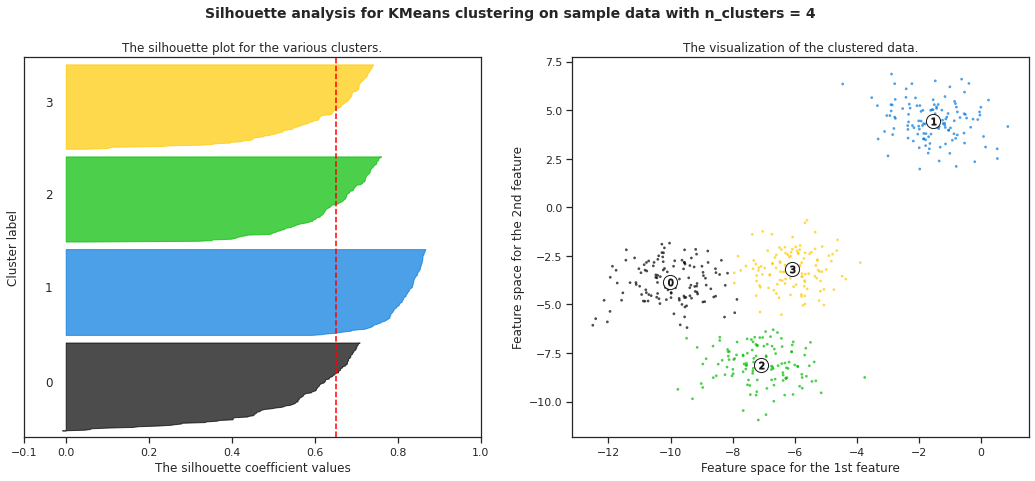

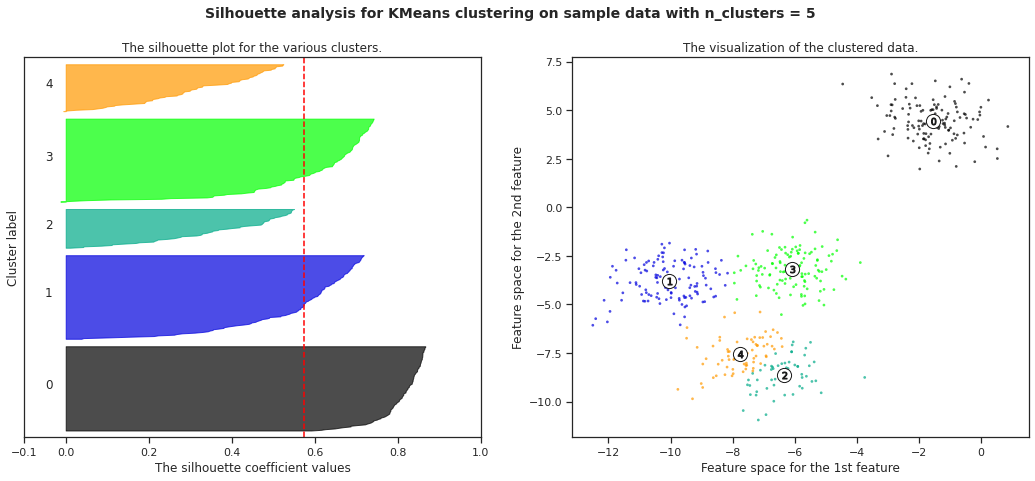

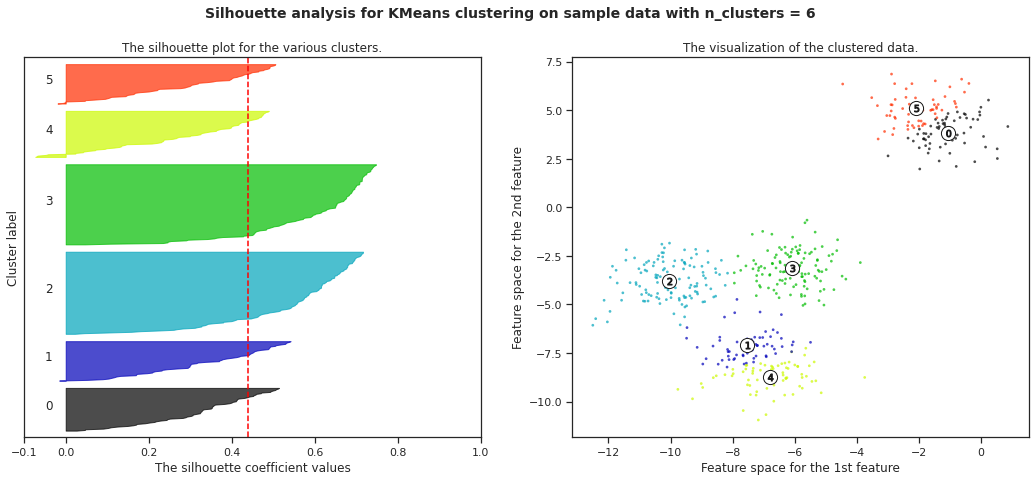

In [ ]:
tau.sil_based_optimal_km()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



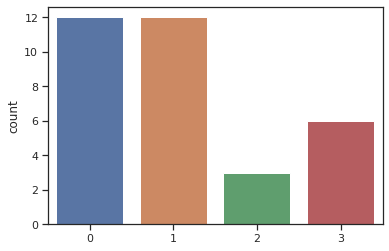

In [ ]:
k = 4
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)
# Hasil clusteringnya
C_km = km.predict(X)
p= sns.countplot(C_km)

In [ ]:
C_km

array([1, 1, 0, 3, 0, 0, 3, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 3, 0, 1, 1, 1,
       0, 1, 0, 3, 0, 0, 0, 1, 3, 3, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[4.71076833e+04, 1.89242733e+06],
       [7.89506883e+04, 4.74509658e+06],
       [3.86606467e+04, 4.18186310e+07],
       [4.27069783e+04, 1.06358000e+07]])

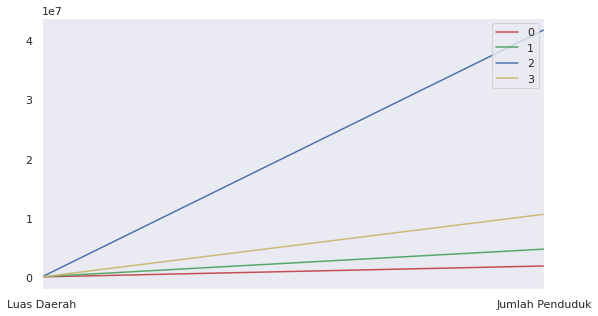

In [ ]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means++

cols = ['Luas Daerah','Jumlah Penduduk']
dfC = pd.DataFrame(km.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b', 'y'))
plt.show()

In [ ]:
dfC

Luas Daerah  Jumlah Penduduk  cluster
0  47107.683333     1.892427e+06        0
1  78950.688333     4.745097e+06        1
2  38660.646667     4.181863e+07        2
3  42706.978333     1.063580e+07        3

In [ ]:
df['Cluster'] = pd.Series(C_km, index=df.index)

In [ ]:
dfC

Luas Daerah  Jumlah Penduduk  cluster
0  47107.683333     1.892427e+06        0
1  78950.688333     4.745097e+06        1
2  38660.646667     4.181863e+07        2
3  42706.978333     1.063580e+07        3

In [ ]:
km.inertia_

114934760911958.52

In [ ]:
data2 = data.drop(['Dalam atau Luar Jawa Bali','Luas Daerah','Jumlah Penduduk'], axis=1)

In [ ]:
data2

Tanggal     Kota  Tingkat Vaksinasi
0    2021-07-05  Jakarta             0.2270
1    2021-07-06  Jakarta             0.2273
2    2021-07-07  Jakarta             0.2276
3    2021-07-08  Jakarta             0.2280
4    2021-07-09  Jakarta             0.2283
...         ...      ...                ...
1051 2021-08-01  Lampung             0.0569
1052 2021-08-02  Lampung             0.0583
1053 2021-08-03  Lampung             0.0590
1054 2021-08-04  Lampung             0.0600
1055 2021-08-05  Lampung             0.0612

[1056 rows x 3 columns]

In [ ]:
data2= data2.set_index(['Tanggal'])
data2

Kota  Tingkat Vaksinasi
Tanggal                               
2021-07-05  Jakarta             0.2270
2021-07-06  Jakarta             0.2273
2021-07-07  Jakarta             0.2276
2021-07-08  Jakarta             0.2280
2021-07-09  Jakarta             0.2283
...             ...                ...
2021-08-01  Lampung             0.0569
2021-08-02  Lampung             0.0583
2021-08-03  Lampung             0.0590
2021-08-04  Lampung             0.0600
2021-08-05  Lampung             0.0612

[1056 rows x 2 columns]

In [ ]:
data2['Kota'].unique()

array(['Jakarta', 'Bali', 'yogyakarta', 'Banten', 'Jawa tengah',
       'Jawa Barat', 'Jawa Timur', 'Kep. Riau', 'Sulawesi Utara', 'Jambi',
       'Gorontalo', 'Kalimantan Tengah', 'Sulawesi Selatan',
       'Papua Barat', 'Sulawesi Tenggara', 'Bangka Belitung', 'Riau',
       'Kalimantan Timur', 'Kalimantan Utara', 'Sumatera Utara', 'Aceh',
       'Sulawesi Barat', 'Bengkulu', 'NTT', 'Sumatera Selatan', 'Maluku',
       'NTB', 'Sulawesi Tengah', 'Sumatera Barat', 'Kalimantan Selatan',
       'Kalimantan Barat', 'Papua', 'Lampung'], dtype=object)

In [ ]:
kluster_dict ={'Jakarta' : 3, 'Bali' : 1, 'yogyakarta' : 1, 'Banten' : 3, 'Jawa tengah' : 2,
               'Jawa Barat' : 2, 'Jawa Timur' : 2, 'Kep. Riau' : 0, 'Sulawesi Utara' : 0, 'Jambi' : 1, 
               'Gorontalo' : 0, 'Kalimantan Tengah' : 0, 'Sulawesi Selatan' : 3,
               'Papua Barat' : 0, 'Sulawesi Tenggara' : 0, 'Bangka Belitung' : 0, 'Riau' : 1,
               'Kalimantan Timur' : 1, 'Kalimantan Utara' : 0, 'Sumatera Utara' : 0, 'Aceh' : 1,
               'Sulawesi Barat' : 0, 'Bengkulu' : 0, 'NTT' : 1, 'Sumatera Selatan' : 3, 'Maluku' : 0,
               'NTB' : 1, 'Sulawesi Tengah' : 0, 'Sumatera Barat' : 1, 'Kalimantan Selatan' : 1,
               'Kalimantan Barat' : 1, 'Papua' : 1, 'Lampung' : 3}

In [ ]:
data2['Kluster'] = data2['Kota'].map(kluster_dict)

In [ ]:
data2.sample(10)

Kota  Tingkat Vaksinasi  Kluster
Tanggal                                                  
2021-07-10     Sumatera Barat             0.0380        1
2021-07-09              Papua             0.0518        1
2021-07-11  Sulawesi Tenggara             0.0538        0
2021-07-27     Sumatera Utara             0.0817        0
2021-07-31  Sulawesi Tenggara             0.0752        0
2021-07-14   Kalimantan Timur             0.0879        1
2021-07-21               Bali             0.2306        1
2021-07-22              Jambi             0.0726        1
2021-07-14             Banten             0.0556        3
2021-07-19              Jambi             0.0702        1

In [ ]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
print(siluet(X,C_km))

0.6154929265322959


In [ ]:
data2 = data2.rename({'Kota': 'Provinsi'}, axis=1)

In [ ]:
data2.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05  Jakarta             0.2270        3
2021-07-06  Jakarta             0.2273        3
2021-07-07  Jakarta             0.2276        3
2021-07-08  Jakarta             0.2280        3
2021-07-09  Jakarta             0.2283        3

# EDA berdasarkan Kluster

In [ ]:
data.head()

Tanggal     Kota  ...  Jumlah Penduduk Luas Daerah
0 2021-07-05  Jakarta  ...         10562088      664.01
1 2021-07-06  Jakarta  ...         10562088      664.01
2 2021-07-07  Jakarta  ...         10562088      664.01
3 2021-07-08  Jakarta  ...         10562088      664.01
4 2021-07-09  Jakarta  ...         10562088      664.01

[5 rows x 6 columns]

In [ ]:
data3 = data

In [ ]:
data3['Kluster'] = data3['Kota'].map(kluster_dict)
data3.head()

Tanggal     Kota  Tingkat Vaksinasi  ... Jumlah Penduduk  Luas Daerah  Kluster
0 2021-07-05  Jakarta             0.2270  ...        10562088       664.01        3
1 2021-07-06  Jakarta             0.2273  ...        10562088       664.01        3
2 2021-07-07  Jakarta             0.2276  ...        10562088       664.01        3
3 2021-07-08  Jakarta             0.2280  ...        10562088       664.01        3
4 2021-07-09  Jakarta             0.2283  ...        10562088       664.01        3

[5 rows x 7 columns]

In [ ]:
data3 = data3.rename({'Kota': 'Provinsi'}, axis=1)
data3.tail()

Tanggal Provinsi  ...  Luas Daerah Kluster
1051 2021-08-01  Lampung  ...      34623.8       3
1052 2021-08-02  Lampung  ...      34623.8       3
1053 2021-08-03  Lampung  ...      34623.8       3
1054 2021-08-04  Lampung  ...      34623.8       3
1055 2021-08-05  Lampung  ...      34623.8       3

[5 rows x 7 columns]

In [ ]:
fig13 = px.scatter_matrix(data3,
    dimensions=["Jumlah Penduduk", "Luas Daerah"], width=900, height=500,
    color="Kluster")
fig13.show()

In [ ]:
fig14 = px.scatter_matrix(data3,
    dimensions=["Jumlah Penduduk", "Tingkat Vaksinasi"], width=900, height=500,
    color="Kluster")
fig14.show()

In [ ]:
fig20 = px.line(data3, x="Tanggal", y="Tingkat Vaksinasi", facet_col="Kluster",
               color='Provinsi')

fig20.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white",
)

fig20.show()

In [ ]:
df.head()

Kota  Luas Daerah  Jumlah Penduduk  Cluster
0             Aceh     57956.00          5274871        1
1             Bali      5780.06          4317404        1
2  Bangka Belitung     16424.06          1455678        0
3           Banten      9662.92         11904562        3
4         Bengkulu     19919.33          2010670        0

In [ ]:
df = df.rename({'Kota': 'Provinsi'}, axis=1)
df.head()

Provinsi  Luas Daerah  Jumlah Penduduk  Cluster
0             Aceh     57956.00          5274871        1
1             Bali      5780.06          4317404        1
2  Bangka Belitung     16424.06          1455678        0
3           Banten      9662.92         11904562        3
4         Bengkulu     19919.33          2010670        0

In [ ]:
fig23 = px.bar(df, x="Provinsi", y="Luas Daerah", facet_col="Cluster",
               color='Provinsi')

fig23.show()

In [ ]:
fig22 = px.bar(df, x="Provinsi", y="Jumlah Penduduk", facet_col="Cluster",
               color='Provinsi')
fig22.update_layout(title_text="Jumlah Penduduk Provinsi di Indonesia berdasarkan Hasil Clustering")
fig22.show()

In [ ]:
df.head()

Provinsi  Luas Daerah  Jumlah Penduduk  Cluster
0             Aceh     57956.00          5274871        1
1             Bali      5780.06          4317404        1
2  Bangka Belitung     16424.06          1455678        0
3           Banten      9662.92         11904562        3
4         Bengkulu     19919.33          2010670        0

In [ ]:
df_kluster_nol = df[df['Cluster']==0]
df_kluster_satu = df[df['Cluster']==1]
df_kluster_dua = df[df['Cluster']==2]
df_kluster_tiga = df[df['Cluster']==3]

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig24 = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=("Kluster 0","Kluster 1","Kluster 2","Kluster 3"))

fig24.add_trace(
    go.Bar(x=df_kluster_nol['Provinsi'], y=df_kluster_nol['Jumlah Penduduk']),
    row=1, col=1
)

fig24.add_trace(
    go.Bar(x=df_kluster_satu['Provinsi'], y=df_kluster_satu['Jumlah Penduduk']),
    row=1, col=2
)

fig24.add_trace(
    go.Bar(x=df_kluster_dua['Provinsi'], y=df_kluster_dua['Jumlah Penduduk']),
    row=1, col=3
)

fig24.add_trace(
    go.Bar(x=df_kluster_tiga['Provinsi'], y=df_kluster_tiga['Jumlah Penduduk']),
    row=1, col=4
)

fig24.update_layout(height=600, width=800, showlegend=False, title_text="Jumlah Penduduk Provinsi di Indonesia")
fig24.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig25 = make_subplots(rows=1, cols=4, shared_yaxes=True, subplot_titles=("Kluster 0","Kluster 1","Kluster 2","Kluster 3"))

fig25.add_trace(
    go.Bar(x=df_kluster_nol['Provinsi'], y=df_kluster_nol['Luas Daerah']),
    row=1, col=1
)

fig25.add_trace(
    go.Bar(x=df_kluster_satu['Provinsi'], y=df_kluster_satu['Luas Daerah']),
    row=1, col=2
)

fig25.add_trace(
    go.Bar(x=df_kluster_dua['Provinsi'], y=df_kluster_dua['Luas Daerah']),
    row=1, col=3
)

fig25.add_trace(
    go.Bar(x=df_kluster_tiga['Provinsi'], y=df_kluster_tiga['Luas Daerah']),
    row=1, col=4
)

fig25.update_layout(height=600, width=800, showlegend=False, title_text="Luas Daerah Provinsi di Indonesia")
fig25.show()

## Dalam atau Luar Jawa Bali

In [ ]:
fig16 = px.scatter_matrix(data3,
    dimensions=["Jumlah Penduduk", "Tingkat Vaksinasi"], width=900, height=500,
    color="Dalam atau Luar Jawa Bali")
fig16.show()

In [ ]:
fig17 = px.scatter(data3, x="Jumlah Penduduk", y="Tingkat Vaksinasi", facet_col="Dalam atau Luar Jawa Bali",
                 width=800, height=400)

fig17.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig17.show()

In [ ]:
fig18 = px.scatter(data3, x="Jumlah Penduduk", y="Tingkat Vaksinasi", facet_col="Kluster",
                   color='Provinsi')

fig18.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white",
)

fig18.show()

## Kluster 0

In [ ]:
#Provinsi yang berada pada kluster 0
kluster_nol = data3[data3['Kluster']==0]
kluster_nol['Provinsi'].unique()

array(['Kep. Riau', 'Sulawesi Utara', 'Gorontalo', 'Kalimantan Tengah',
       'Papua Barat', 'Sulawesi Tenggara', 'Bangka Belitung',
       'Kalimantan Utara', 'Sumatera Utara', 'Sulawesi Barat', 'Bengkulu',
       'Maluku', 'Sulawesi Tengah'], dtype=object)

In [ ]:
len(kluster_nol['Provinsi'].unique())

13

In [ ]:
fig4 = px.scatter(kluster_nol, x="Luas Daerah", y="Jumlah Penduduk", color="Provinsi")
fig4.show()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

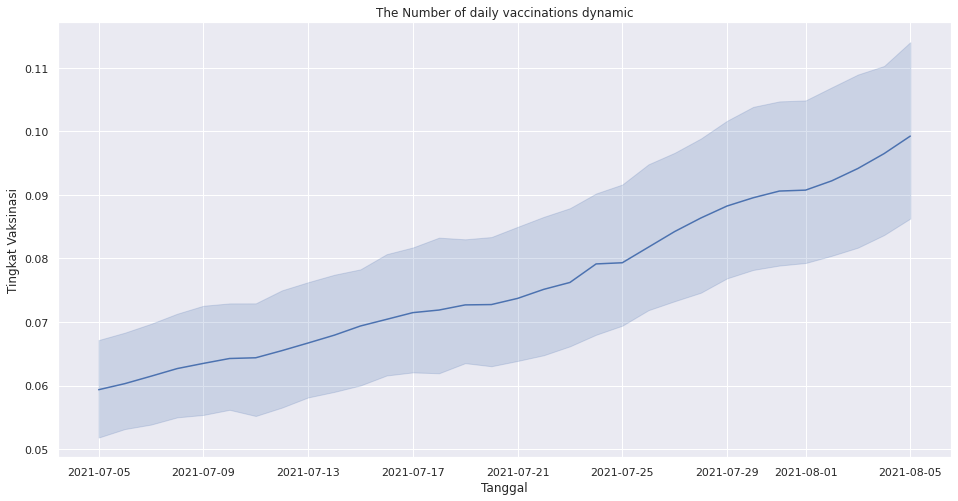

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=kluster_nol.Tanggal, y=kluster_nol['Tingkat Vaksinasi'])
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [ ]:
fig8 = px.line(kluster_nol, x="Tanggal", y="Tingkat Vaksinasi", color="Provinsi", width=800, height=500, title="Tingkat Vaksinasi Per Hari untuk Kluster 0")
fig8.show()

In [ ]:
vaksin = kluster_nol[kluster_nol['Tanggal']=='2021-08-05']

In [ ]:
fig15 = px.scatter(vaksin, x="Jumlah Penduduk", y="Tingkat Vaksinasi", color="Provinsi", width=900, height=500, title="Perbandingan Jumlah Penduduk dan Tingkat Vaksinasi per 5 Agustus 2021 untuk Kluster 0")
fig15.show()

## Kluster 1

In [ ]:
#Provinsi yang berada pada kluster 1
kluster_satu = data3[data3['Kluster']==1]
kluster_satu['Provinsi'].unique()

array(['Bali', 'yogyakarta', 'Jambi', 'Riau', 'Kalimantan Timur', 'Aceh',
       'NTT', 'NTB', 'Sumatera Barat', 'Kalimantan Selatan',
       'Kalimantan Barat', 'Papua'], dtype=object)

In [ ]:
len(kluster_satu['Provinsi'].unique())

12

In [ ]:
fig5 = px.scatter(kluster_satu, x="Luas Daerah", y="Jumlah Penduduk", color="Provinsi", width=1000, height=500)
fig5.show()

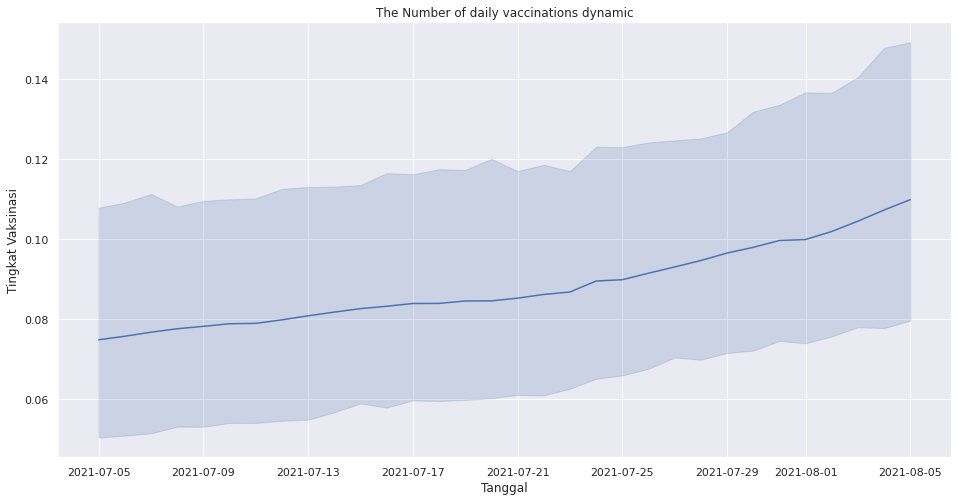

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=kluster_satu.Tanggal, y=kluster_satu['Tingkat Vaksinasi'])
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [ ]:
fig10 = px.line(kluster_satu, x="Tanggal", y="Tingkat Vaksinasi", color="Provinsi", width=1000, height=500, title="Tingkat Vaksinasi Per Hari untuk Kluster 1")
fig10.show()

## Kluster 2

In [ ]:
#Provinsi yang berada pada kluster 2
kluster_dua = data3[data3['Kluster']==2]
kluster_dua['Provinsi'].unique()

array(['Jawa tengah', 'Jawa Barat', 'Jawa Timur'], dtype=object)

In [ ]:
len(kluster_dua['Provinsi'].unique())

3

In [ ]:
fig6 = px.scatter(kluster_dua, x="Luas Daerah", y="Jumlah Penduduk", color="Provinsi", width=900, height=500)
fig6.show()

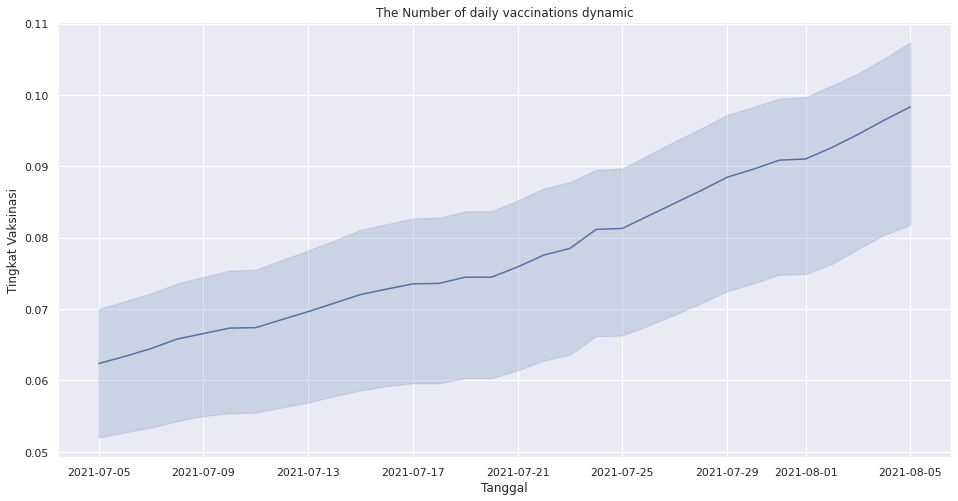

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=kluster_dua.Tanggal, y=kluster_dua['Tingkat Vaksinasi'])
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [ ]:
fig11 = px.line(kluster_dua, x="Tanggal", y="Tingkat Vaksinasi", color="Provinsi", width=800, height=500, title="Tingkat Vaksinasi Per Hari untuk Kluster 2")
fig11.show()

## Kluster 3

In [ ]:
#Provinsi yang berada pada kluster 3
kluster_tiga = data3[data3['Kluster']==3]
kluster_tiga['Provinsi'].unique()

array(['Jakarta', 'Banten', 'Sulawesi Selatan', 'Sumatera Selatan',
       'Lampung'], dtype=object)

In [ ]:
len(kluster_tiga['Provinsi'].unique())

5

In [ ]:
fig7 = px.scatter(kluster_tiga, x="Luas Daerah", y="Jumlah Penduduk", color="Provinsi", width=900, height=500)
fig7.show()

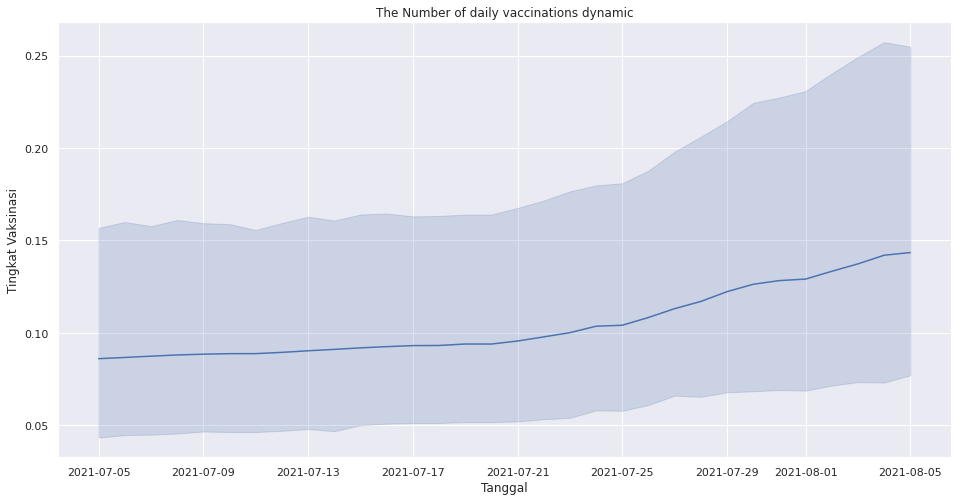

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=kluster_tiga.Tanggal, y=kluster_tiga['Tingkat Vaksinasi'])
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [ ]:
fig12 = px.line(kluster_tiga, x="Tanggal", y="Tingkat Vaksinasi", color="Provinsi", width=800, height=500, title="Tingkat Vaksinasi Per Hari untuk Kluster 2")
fig12.show()

# Riau

In [ ]:
riau = data2[data2['Provinsi']=='Riau']

In [ ]:
riau.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05     Riau             0.0812        1
2021-07-06     Riau             0.0839        1
2021-07-07     Riau             0.0866        1
2021-07-08     Riau             0.0894        1
2021-07-09     Riau             0.0911        1

In [ ]:
riau[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0812
2021-07-06             0.0839
2021-07-07             0.0866
2021-07-08             0.0894
2021-07-09             0.0911

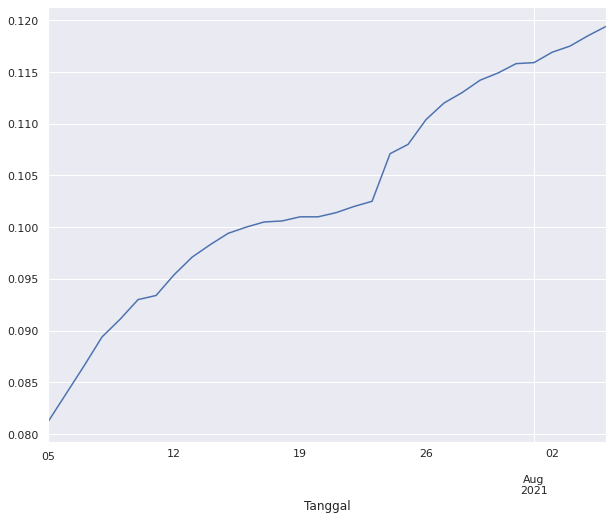

In [ ]:
riau['Tingkat Vaksinasi'].plot(figsize=(10,8))

Forecasting Tingkat Vaksinasi di Riau

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 5.4 MB/s 
     |████████████████████████████████| 9.5 MB 21.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Memeriksa apakah data bersifat stasioner

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest=adfuller(dataset,autolag='AIC')
  print('1. ADF : ',dftest[0])
  print('2. P-Value : ', dftest[1])
  print('3. Num of Lags : ', dftest[2])
  print('4. Num of Observations Used for ADF Regression and Critical Values Calculation : ', dftest[3])
  print('5. Critical Values : ')
  for key, val in dftest[4].items():
    print("\t",key,':', val)

In [ ]:
ad_test(riau['Tingkat Vaksinasi'])

1. ADF :  -2.3884424989855018
2. P-Value :  0.14502503390345678
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_model_riau = auto_arima(riau['Tingkat Vaksinasi'], trace=True, test = 'adf',
                                 suppress_warnings=True, stepwise=True,
                                 max_p=3, max_q=3, # maximum p and q
                                 m=1, # frequency of series
                                 d=None, # let model determine 'd'
                                 seasonal=False, # No Seasonality
                                 start_P=0,
                                 D=0,
                                 error_action='ignore')
stepwise_model_riau.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-322.679, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-314.493, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-327.304, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-325.061, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-316.421, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-326.065, Time=0.22 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-325.889, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-324.935, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-328.987, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-327.616, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-327.454, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-326.231, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-326.119, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.553 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 166.494
Date:                Mon, 23 Aug 2021   AIC                           -328.987
Time:                        02:12:14   BIC                           -326.185
Sample:                             0   HQIC                          -328.091
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6285      0.147     -4.286      0.000      -0.916      -0.341
sigma2      8.661e-07    9.5e-08      9.119      0.000     6.8e-07    1.05e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               173.53
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             2.74
Prob(H) (two-sided):                  0.18   Kurtosis:                        13.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
train_riau = (riau[['Tingkat Vaksinasi']])[:25]
test_riau = (riau[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_riau.fit(train_riau)

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_riau = stepwise_model_riau.predict(n_periods = len(test_riau))

In [ ]:
forecast_riau = pd.DataFrame(forecast_riau, index = test_riau.index, columns=['Prediksi'])

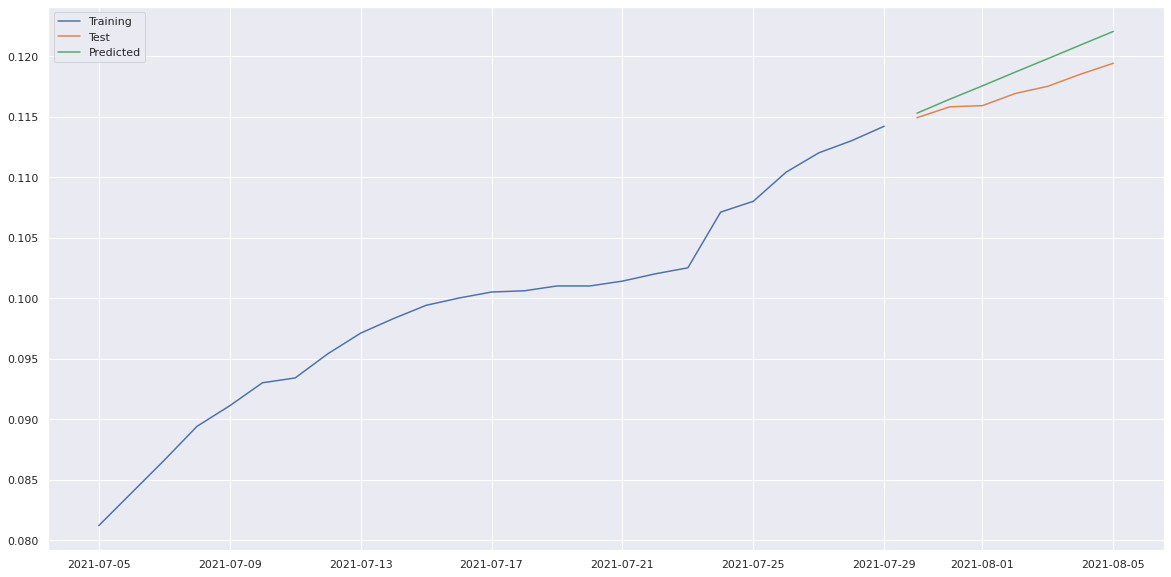

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_riau,label="Training")
plt.plot(test_riau,label="Test")
plt.plot(forecast_riau,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test_riau, forecast_riau))
print(rms)

0.0018636225008677636


In [ ]:
stepwise_model_riau.fit(riau['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_riau = stepwise_model_riau.predict(n_periods=329)
pred_riau = pd.DataFrame(pred_riau, columns=['Tingkat Vaksinasi'])
pred_riau.index = index_future_dates
pred_riau.tail()

Tingkat Vaksinasi
2022-06-26           0.424458
2022-06-27           0.425396
2022-06-28           0.426335
2022-06-29           0.427273
2022-06-30           0.428212

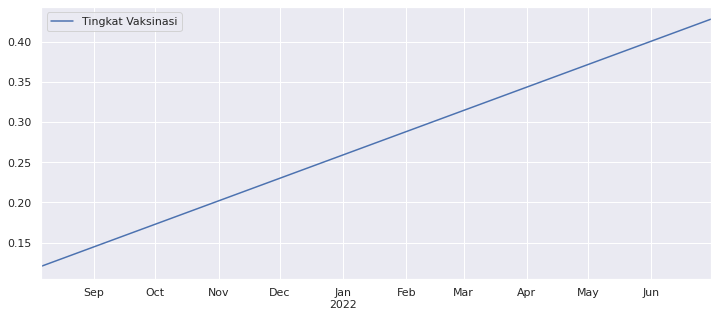

In [ ]:
pred_riau.plot(figsize=(12,5),legend=True)

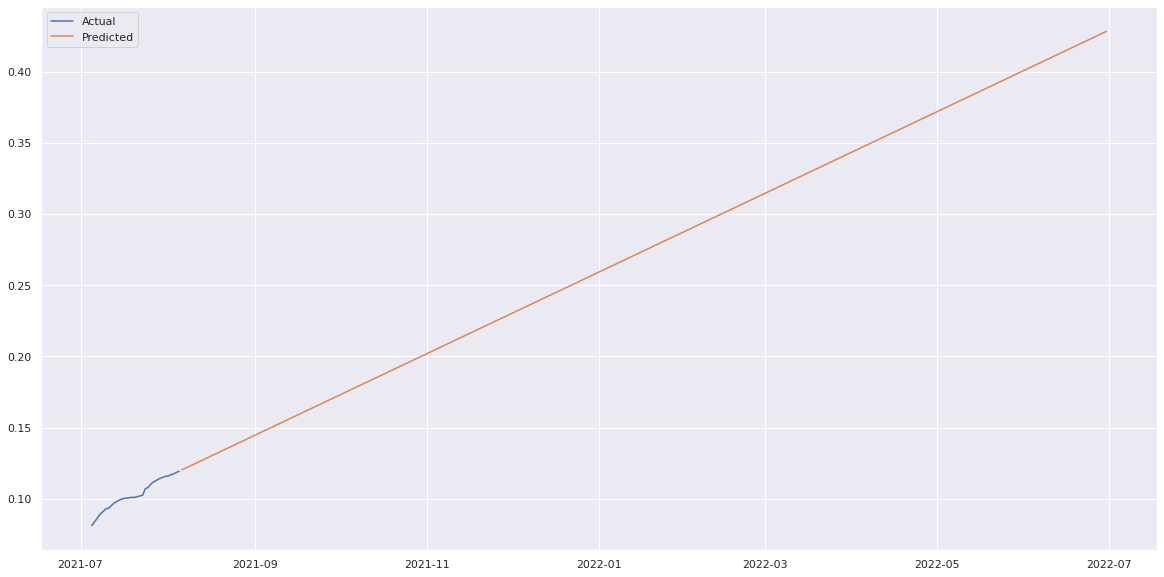

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(riau['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_riau,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sulawesi Barat

In [ ]:
sulbar = data2[data2['Provinsi']=='Sulawesi Barat']

In [ ]:
sulbar.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                               
2021-07-05  Sulawesi Barat             0.0545        0
2021-07-06  Sulawesi Barat             0.0552        0
2021-07-07  Sulawesi Barat             0.0556        0
2021-07-08  Sulawesi Barat             0.0562        0
2021-07-09  Sulawesi Barat             0.0567        0

In [ ]:
sulbar[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0545
2021-07-06             0.0552
2021-07-07             0.0556
2021-07-08             0.0562
2021-07-09             0.0567

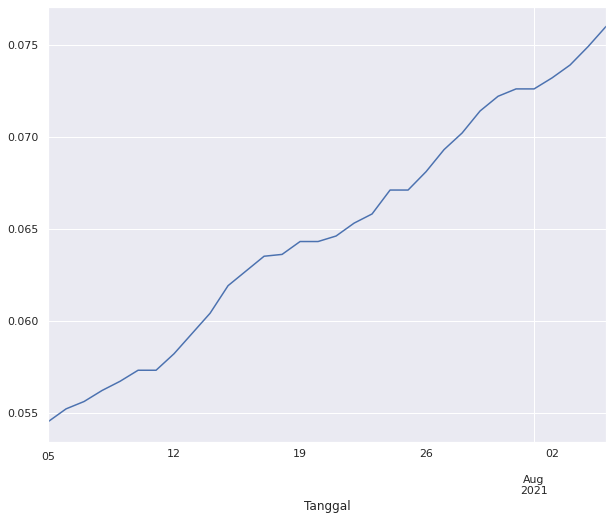

In [ ]:
sulbar['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sulbar['Tingkat Vaksinasi'])

1. ADF :  0.43894279627949073
2. P-Value :  0.9828942806913873
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_sulbar = auto_arima(sulbar['Tingkat Vaksinasi'], trace=True,
                          suppress_warnings=True, stepwise=True)
stepwise_model_sulbar.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-387.162, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-392.629, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-391.603, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-391.312, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-351.970, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-389.524, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.867 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 198.315
Date:                Mon, 23 Aug 2021   AIC                           -392.629
Time:                        02:12:18   BIC                           -389.761
Sample:                             0   HQIC                          -391.695
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007   7.34e-05      9.445      0.000       0.001       0.001
sigma2      1.625e-07   5.19e-08      3.132      0.002    6.08e-08    2.64e-07
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                 0.82
Prob(Q):                              0.30   Prob(JB):                         0.67
Heteroskedasticity (H):               0.85   Skew:                            -0.19
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sulbar = (sulbar[['Tingkat Vaksinasi']])[:25]
test_sulbar = (sulbar[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sulbar.fit(train_sulbar)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_sulbar = stepwise_model_sulbar.predict(n_periods = len(test_sulbar))

In [ ]:
forecast_sulbar = pd.DataFrame(forecast_sulbar, index = test_sulbar.index, columns=['Prediksi'])

In [ ]:
forecast_sulbar

Prediksi
Tanggal             
2021-07-30  0.072104
2021-07-31  0.072808
2021-08-01  0.073511
2021-08-02  0.074215
2021-08-03  0.074919
2021-08-04  0.075623
2021-08-05  0.076327

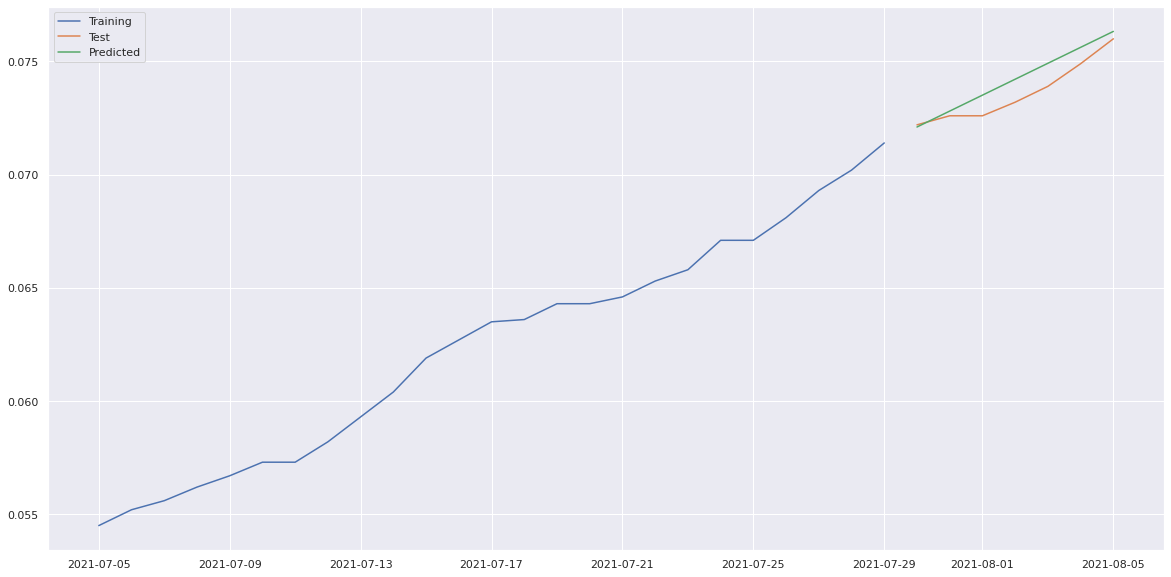

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sulbar,label="Training")
plt.plot(test_sulbar,label="Test")
plt.plot(forecast_sulbar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sulbar = sqrt(mean_squared_error(test_sulbar, forecast_sulbar))
print(rms_sulbar)

0.0007152504091565581


In [ ]:
stepwise_model_sulbar.fit(sulbar['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sulbar = stepwise_model_sulbar.predict(n_periods=329)
pred_sulbar = pd.DataFrame(pred_sulbar, columns=['Tingkat Vaksinasi'])
pred_sulbar.index = index_future_dates
pred_sulbar.tail()

Tingkat Vaksinasi
2022-06-26           0.301403
2022-06-27           0.302097
2022-06-28           0.302790
2022-06-29           0.303484
2022-06-30           0.304177

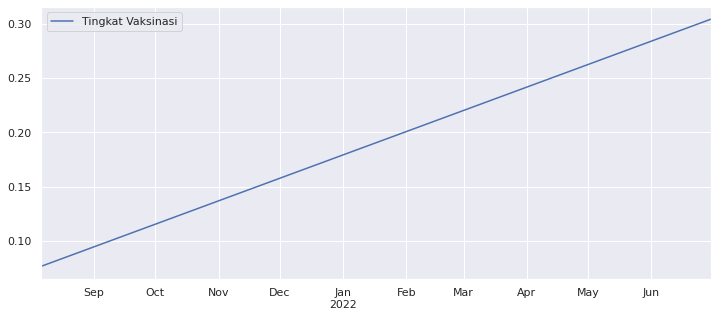

In [ ]:
pred_sulbar.plot(figsize=(12,5),legend=True)

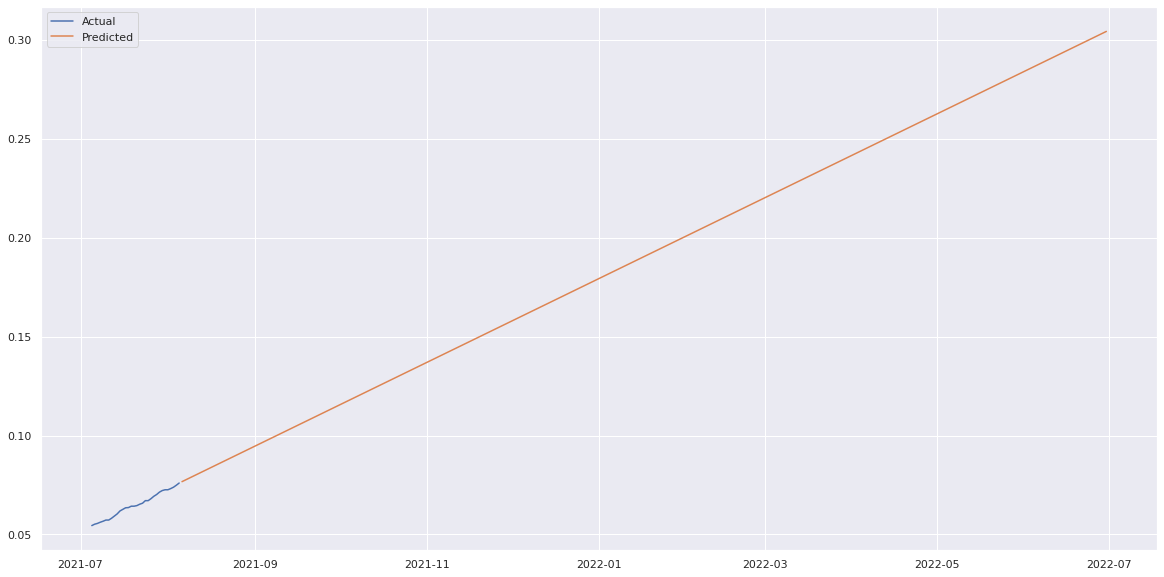

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sulbar['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sulbar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sulawesi Selatan

In [ ]:
sulsel = data2[data2['Provinsi']=='Sulawesi Selatan']

In [ ]:
sulsel.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                 
2021-07-05  Sulawesi Selatan             0.0665        3
2021-07-06  Sulawesi Selatan             0.0675        3
2021-07-07  Sulawesi Selatan             0.0684        3
2021-07-08  Sulawesi Selatan             0.0690        3
2021-07-09  Sulawesi Selatan             0.0694        3

In [ ]:
sulsel[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0921
2021-08-02             0.0932
2021-08-03             0.0947
2021-08-04             0.0976
2021-08-05             0.1006

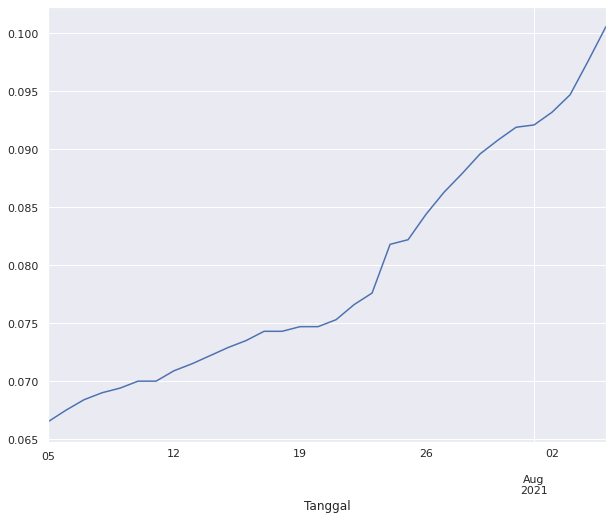

In [ ]:
sulsel['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sulsel['Tingkat Vaksinasi'])

1. ADF :  3.0336103502312026
2. P-Value :  1.0
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_sulsel = auto_arima(sulsel['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
stepwise_model_sulsel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-330.389, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-320.375, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-332.292, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-330.668, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-322.264, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-330.471, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-314.375, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-333.820, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-331.947, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-331.894, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-331.688, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-316.263, Time=0.20 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.329 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 168.910
Date:                Mon, 23 Aug 2021   AIC                           -333.820
Time:                        02:12:22   BIC                           -331.017
Sample:                             0   HQIC                          -332.923
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6111      0.117     -5.238      0.000      -0.840      -0.382
sigma2      7.389e-07   1.23e-07      6.000      0.000    4.98e-07     9.8e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                17.36
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               7.68   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sulsel = (sulsel[['Tingkat Vaksinasi']])[:25]
test_sulsel = (sulsel[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sulsel.fit(train_sulsel)

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_sulsel = stepwise_model_sulsel.predict(n_periods = len(test_sulsel))

In [ ]:
forecast_sulsel = pd.DataFrame(forecast_sulsel, index = test_sulsel.index, columns=['Prediksi'])

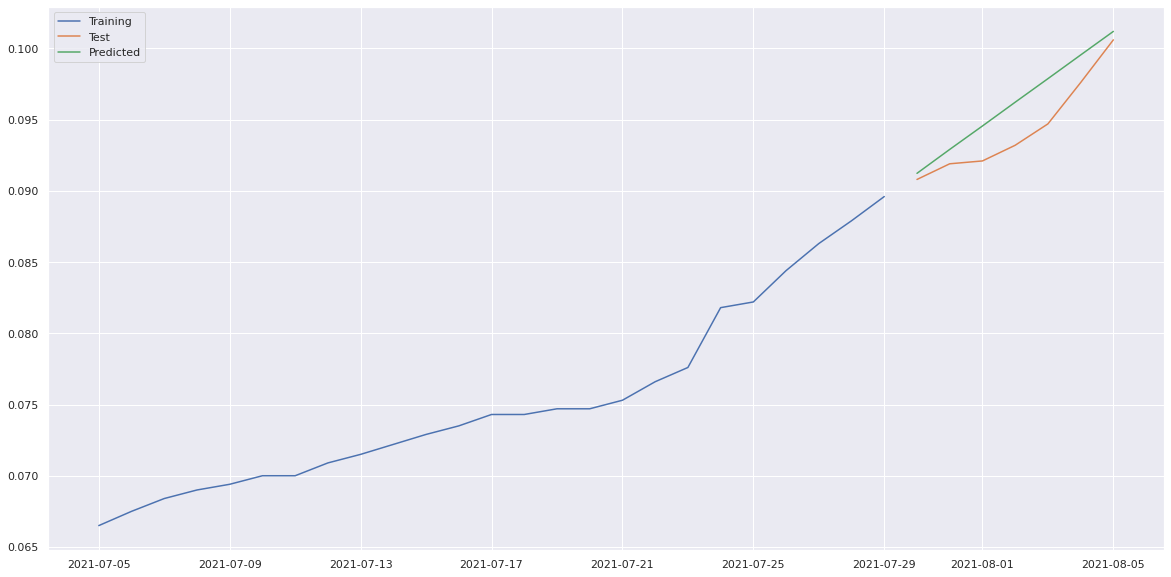

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sulsel,label="Training")
plt.plot(test_sulsel,label="Test")
plt.plot(forecast_sulsel,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sulsel = sqrt(mean_squared_error(test_sulsel, forecast_sulsel))
print(rms_sulsel)

0.0020888943569513647


In [ ]:
stepwise_model_sulsel.fit(sulsel['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sulsel = stepwise_model_sulsel.predict(n_periods=329)
pred_sulsel = pd.DataFrame(pred_sulsel, columns=['Tingkat Vaksinasi'])
pred_sulsel.index = index_future_dates
pred_sulsel.tail()

Tingkat Vaksinasi
2022-06-26           1.063260
2022-06-27           1.066222
2022-06-28           1.069184
2022-06-29           1.072147
2022-06-30           1.075109

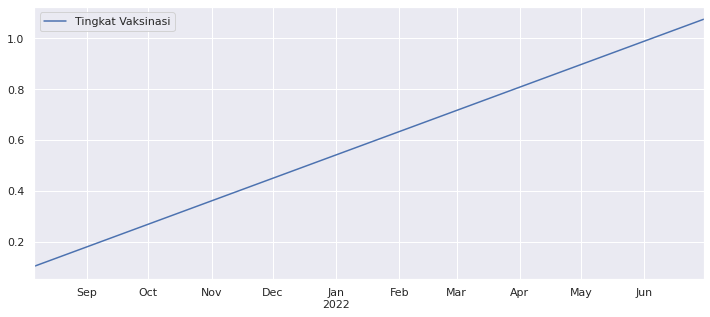

In [ ]:
pred_sulsel.plot(figsize=(12,5),legend=True)

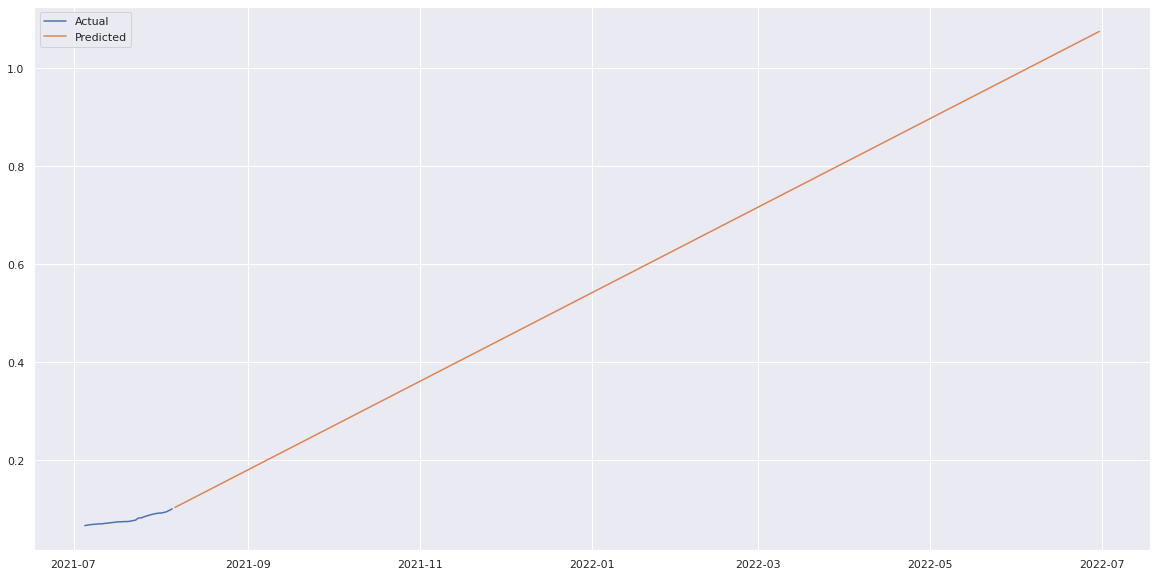

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sulsel['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sulsel,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sulawesi Tengah

In [ ]:
sulteng = data2[data2['Provinsi']=='Sulawesi Tengah']

In [ ]:
sulteng.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                
2021-07-05  Sulawesi Tengah             0.0452        0
2021-07-06  Sulawesi Tengah             0.0458        0
2021-07-07  Sulawesi Tengah             0.0468        0
2021-07-08  Sulawesi Tengah             0.0475        0
2021-07-09  Sulawesi Tengah             0.0482        0

In [ ]:
sulteng[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0452
2021-07-06             0.0458
2021-07-07             0.0468
2021-07-08             0.0475
2021-07-09             0.0482

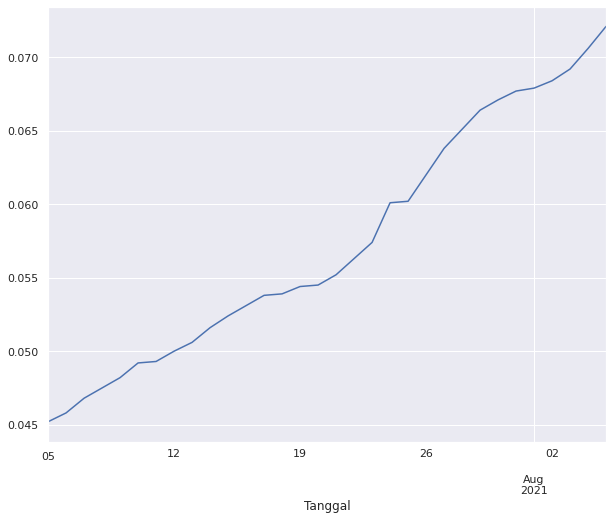

In [ ]:
sulteng['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sulteng['Tingkat Vaksinasi'])

1. ADF :  1.2443697846976736
2. P-Value :  0.9962785472712387
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_sulteng = auto_arima(sulteng['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_sulteng.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-352.878, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-343.368, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-354.152, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-354.135, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-345.326, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-353.151, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-352.438, Time=0.37 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-356.031, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-355.006, Time=0.28 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-354.745, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-355.989, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-354.377, Time=0.10 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.738 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 180.016
Date:                Mon, 23 Aug 2021   AIC                           -356.031
Time:                        02:12:26   BIC                           -353.229
Sample:                             0   HQIC                          -355.135
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5930      0.120     -4.940      0.000      -0.828      -0.358
sigma2      3.539e-07   7.77e-08      4.557      0.000    2.02e-07    5.06e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.53   Prob(JB):                         0.26
Heteroskedasticity (H):               3.22   Skew:                            -0.10
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sulteng = (sulteng[['Tingkat Vaksinasi']])[:25]
test_sulteng = (sulteng[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sulteng.fit(train_sulteng)

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_sulteng = stepwise_model_sulteng.predict(n_periods = len(test_sulteng))

In [ ]:
forecast_sulteng = pd.DataFrame(forecast_sulteng, index = test_sulteng.index, columns=['Prediksi'])

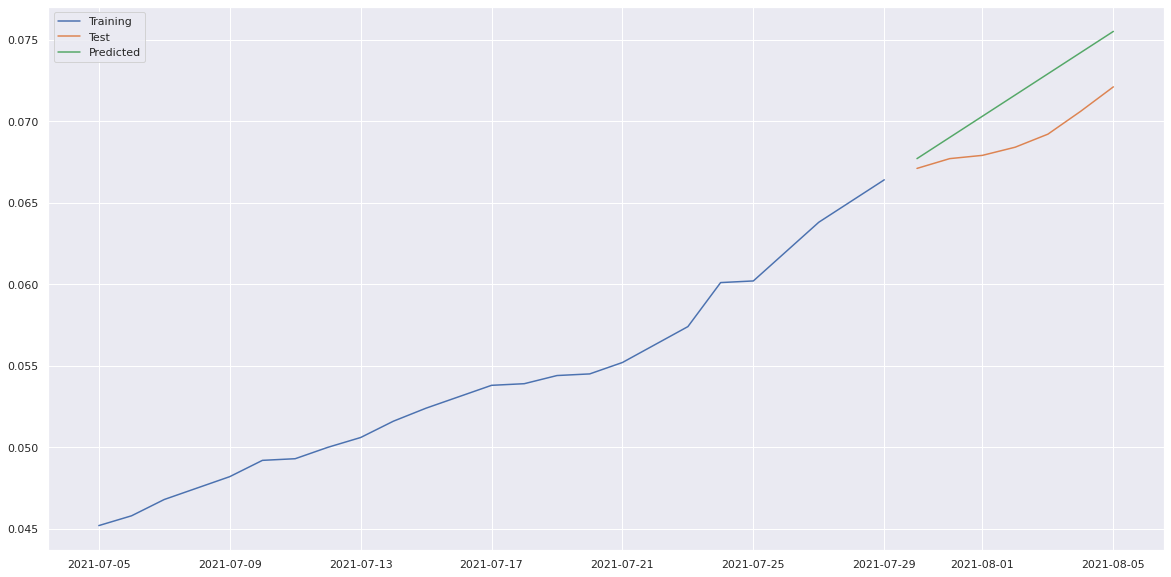

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sulteng,label="Training")
plt.plot(test_sulteng,label="Test")
plt.plot(forecast_sulteng,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sulteng = sqrt(mean_squared_error(test_sulteng, forecast_sulteng))
print(rms_sulteng)

0.002835014724256916


In [ ]:
stepwise_model_sulteng.fit(sulteng['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sulteng = stepwise_model_sulteng.predict(n_periods=329)
pred_sulteng = pd.DataFrame(pred_sulteng, columns=['Tingkat Vaksinasi'])
pred_sulteng.index = index_future_dates
pred_sulteng.tail()

Tingkat Vaksinasi
2022-06-26           0.547490
2022-06-27           0.548953
2022-06-28           0.550416
2022-06-29           0.551879
2022-06-30           0.553341

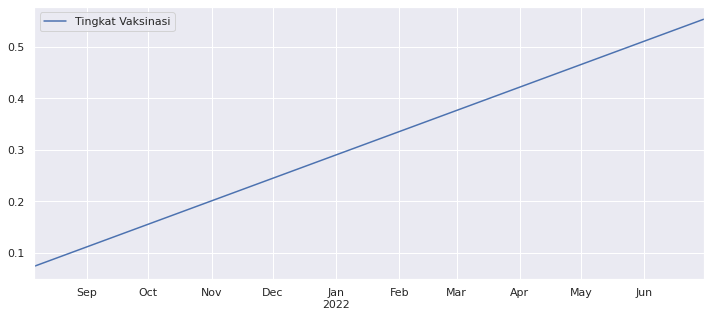

In [ ]:
pred_sulteng.plot(figsize=(12,5),legend=True)

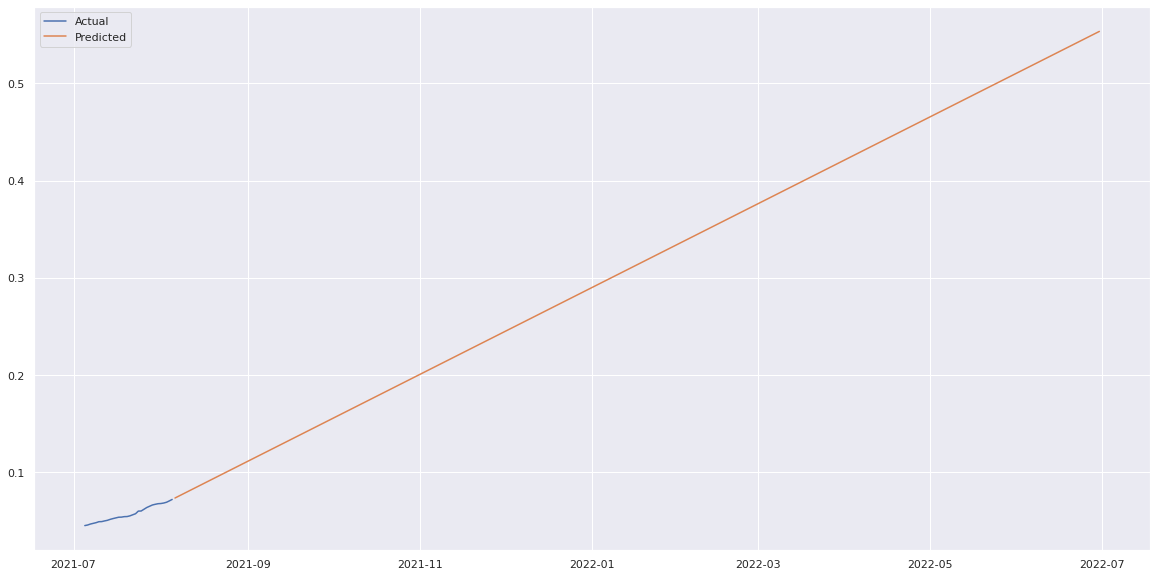

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sulteng['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sulteng,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sulawesi Tenggara

In [ ]:
sultra = data2[data2['Provinsi']=='Sulawesi Tenggara']

In [ ]:
sultra.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                  
2021-07-05  Sulawesi Tenggara             0.0497        0
2021-07-06  Sulawesi Tenggara             0.0505        0
2021-07-07  Sulawesi Tenggara             0.0514        0
2021-07-08  Sulawesi Tenggara             0.0525        0
2021-07-09  Sulawesi Tenggara             0.0532        0

In [ ]:
sultra[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0497
2021-07-06             0.0505
2021-07-07             0.0514
2021-07-08             0.0525
2021-07-09             0.0532

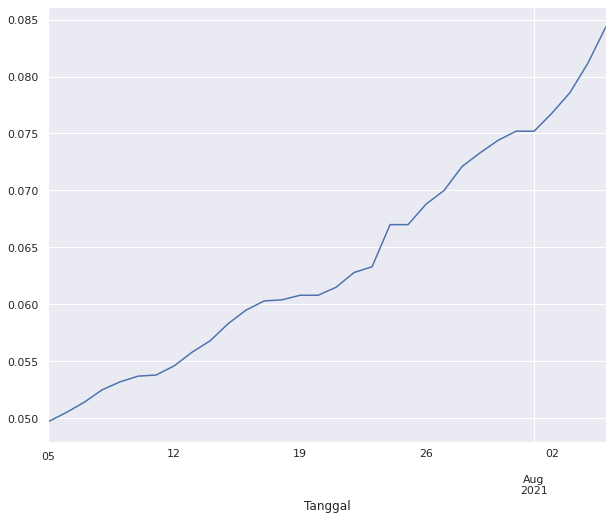

In [ ]:
sultra['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sultra['Tingkat Vaksinasi'])

1. ADF :  2.474883363537402
2. P-Value :  0.9990413010497072
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_sultra = auto_arima(sultra['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_sultra.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-330.960, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-318.934, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-332.940, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-330.731, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-320.779, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-330.959, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-312.934, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-334.368, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-332.374, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-332.375, Time=0.17 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-331.745, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-314.779, Time=0.10 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.430 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 169.184
Date:                Mon, 23 Aug 2021   AIC                           -334.368
Time:                        02:12:31   BIC                           -331.566
Sample:                             0   HQIC                          -333.472
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6480      0.121     -5.337      0.000      -0.886      -0.410
sigma2      7.238e-07   1.63e-07      4.453      0.000    4.05e-07    1.04e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.89   Prob(JB):                         0.16
Heteroskedasticity (H):               4.16   Skew:                             0.67
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sultra = (sultra[['Tingkat Vaksinasi']])[:25]
test_sultra = (sultra[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sultra.fit(train_sultra)

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_sultra = stepwise_model_sultra.predict(n_periods = len(test_sultra))

In [ ]:
forecast_sultra = pd.DataFrame(forecast_sultra, index = test_sultra.index, columns=['Prediksi'])

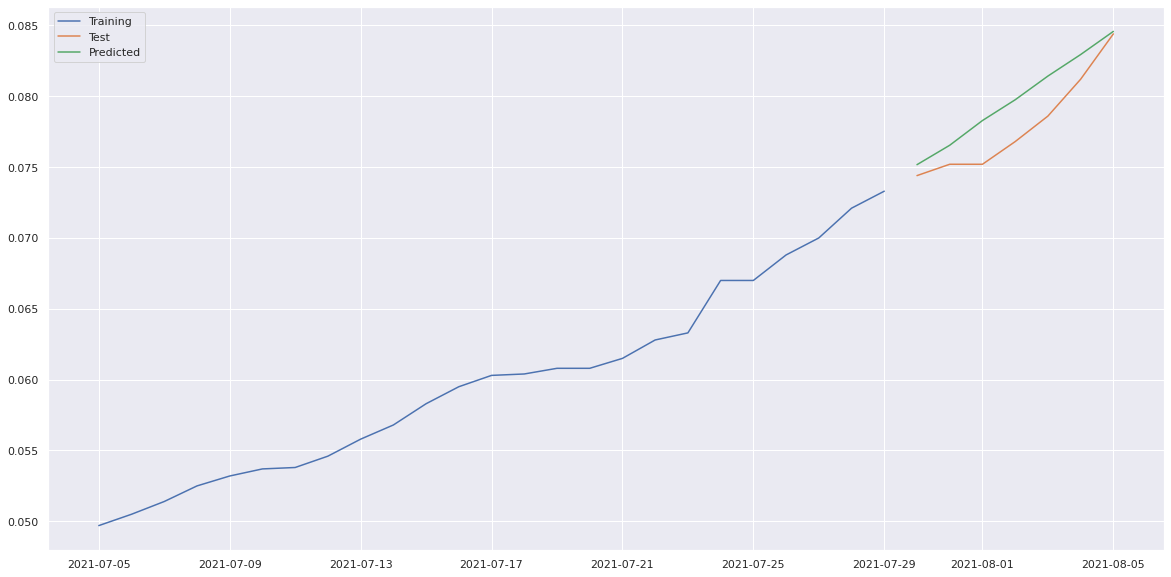

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sultra,label="Training")
plt.plot(test_sultra,label="Test")
plt.plot(forecast_sultra,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sultra = sqrt(mean_squared_error(test_sultra, forecast_sultra))
print(rms_sultra)

0.002127117667815409


In [ ]:
stepwise_model_sultra.fit(sultra['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sultra = stepwise_model_sultra.predict(n_periods=329)
pred_sultra = pd.DataFrame(pred_sultra, columns=['Tingkat Vaksinasi'])
pred_sultra.index = index_future_dates
pred_sultra.tail()

Tingkat Vaksinasi
2022-06-26           1.047636
2022-06-27           1.050600
2022-06-28           1.053564
2022-06-29           1.056528
2022-06-30           1.059492

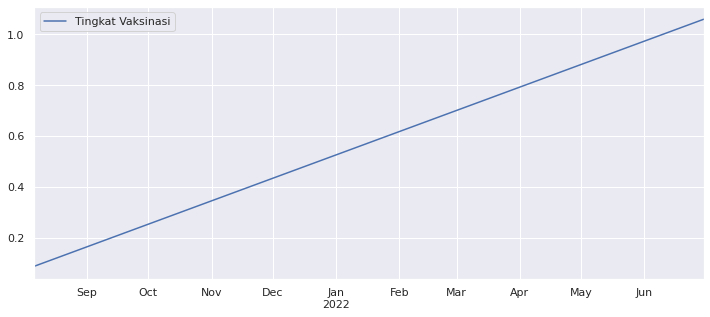

In [ ]:
pred_sultra.plot(figsize=(12,5),legend=True)

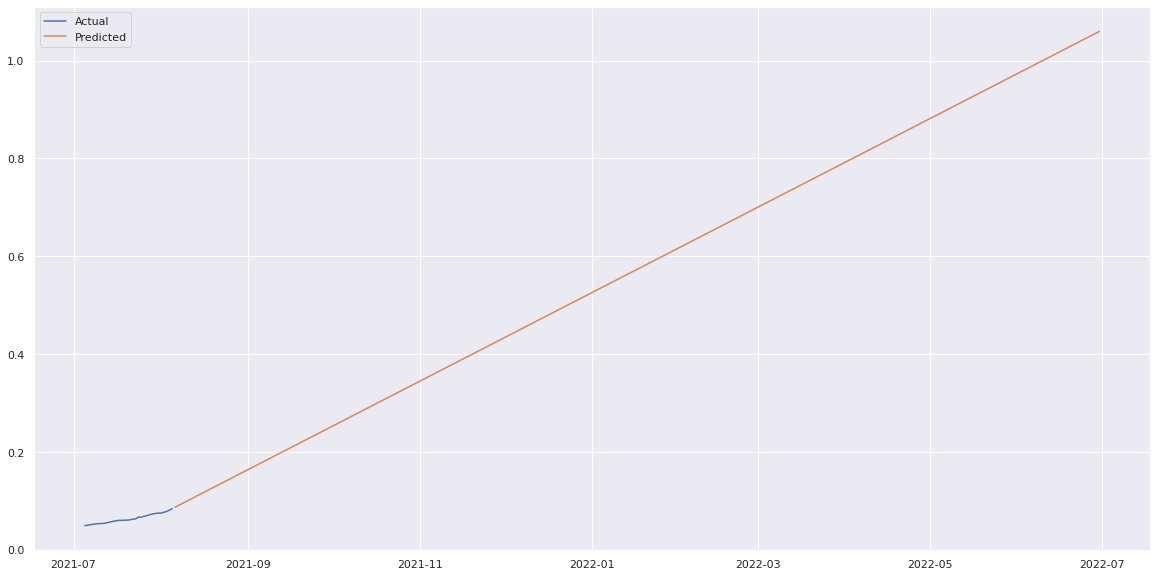

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sultra['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sultra,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sulawesi Utara

In [ ]:
sulut = data2[data2['Provinsi']=='Sulawesi Utara']

In [ ]:
sulut.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                               
2021-07-05  Sulawesi Utara             0.0703        0
2021-07-06  Sulawesi Utara             0.0713        0
2021-07-07  Sulawesi Utara             0.0722        0
2021-07-08  Sulawesi Utara             0.0730        0
2021-07-09  Sulawesi Utara             0.0741        0

In [ ]:
sulut[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0703
2021-07-06             0.0713
2021-07-07             0.0722
2021-07-08             0.0730
2021-07-09             0.0741

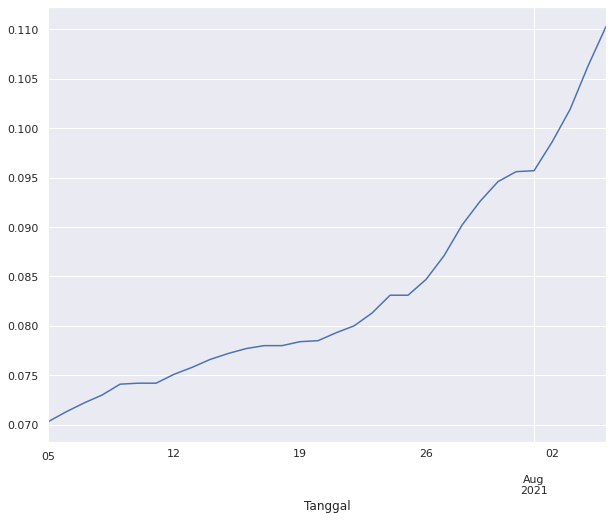

In [ ]:
sulut['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sulut['Tingkat Vaksinasi'])

1. ADF :  2.21294055238623
2. P-Value :  0.9988929848317546
3. Num of Lags :  8
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  23
5. Critical Values : 
	 1% : -3.7529275211638033
	 5% : -2.998499866852963
	 10% : -2.6389669754253307


In [ ]:
stepwise_model_sulut = auto_arima(sulut['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
stepwise_model_sulut.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-333.481, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-334.661, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-333.339, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-333.490, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-336.255, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.641 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 169.128
Date:                Mon, 23 Aug 2021   AIC                           -336.255
Time:                        02:12:34   BIC                           -334.854
Sample:                             0   HQIC                          -335.807
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.452e-07   1.35e-07      5.535      0.000    4.81e-07    1.01e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                 6.98
Prob(Q):                              0.39   Prob(JB):                         0.03
Heteroskedasticity (H):               6.39   Skew:                             0.75
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sulut = (sulut[['Tingkat Vaksinasi']])[:25]
test_sulut = (sulut[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sulut.fit(train_sulut)

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_sulut = stepwise_model_sulut.predict(n_periods = len(test_sulut))
forecast_sulut

array([0.09500017, 0.09740035, 0.09980052, 0.10220069, 0.10460087,
       0.10700104, 0.10940121])

In [ ]:
forecast_sulut = pd.DataFrame(forecast_sulut, index = test_sulut.index, columns=['Prediksi'])
forecast_sulut.head()

Prediksi
Tanggal             
2021-07-30  0.095000
2021-07-31  0.097400
2021-08-01  0.099801
2021-08-02  0.102201
2021-08-03  0.104601

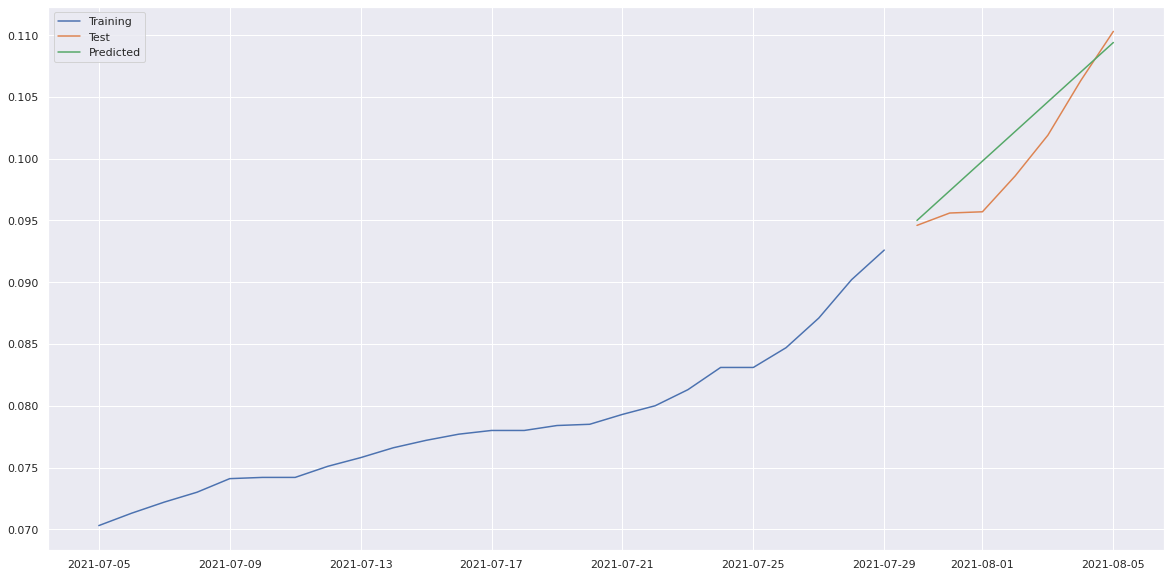

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sulut,label="Training")
plt.plot(test_sulut,label="Test")
plt.plot(forecast_sulut,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sulut = sqrt(mean_squared_error(test_sulut, forecast_sulut))
print(rms_sulut)

0.00244290801312796


In [ ]:
stepwise_model_sulut.fit(sulut['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sulut = stepwise_model_sulut.predict(n_periods=len(index_future_dates))
pred_sulut = pd.DataFrame(pred_sulut, columns=['Tingkat Vaksinasi'])
pred_sulut.index = index_future_dates
pred_sulut.tail()

Tingkat Vaksinasi
2022-06-26           1.410320
2022-06-27           1.414320
2022-06-28           1.418320
2022-06-29           1.422320
2022-06-30           1.426321

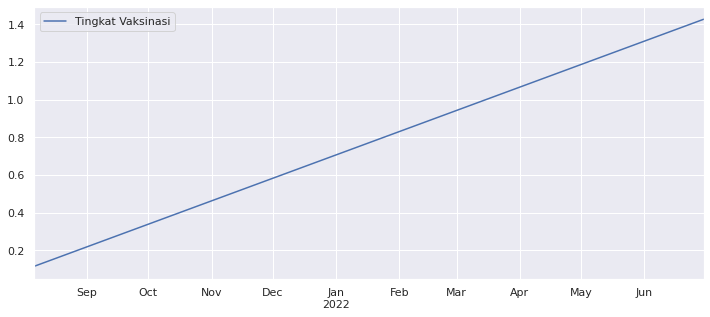

In [ ]:
pred_sulut.plot(figsize=(12,5),legend=True)

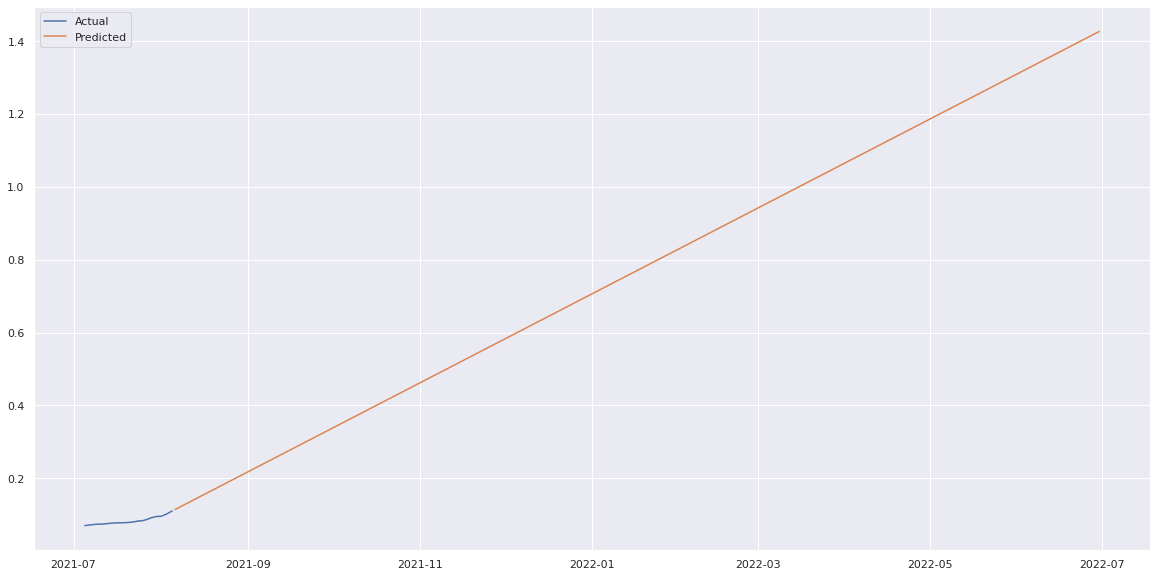

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sulut['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sulut,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sumatera Barat

In [ ]:
sumbar = data2[data2['Provinsi']=='Sumatera Barat']

In [ ]:
sumbar.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                               
2021-07-05  Sumatera Barat             0.0363        1
2021-07-06  Sumatera Barat             0.0367        1
2021-07-07  Sumatera Barat             0.0371        1
2021-07-08  Sumatera Barat             0.0375        1
2021-07-09  Sumatera Barat             0.0377        1

In [ ]:
sumbar[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0363
2021-07-06             0.0367
2021-07-07             0.0371
2021-07-08             0.0375
2021-07-09             0.0377

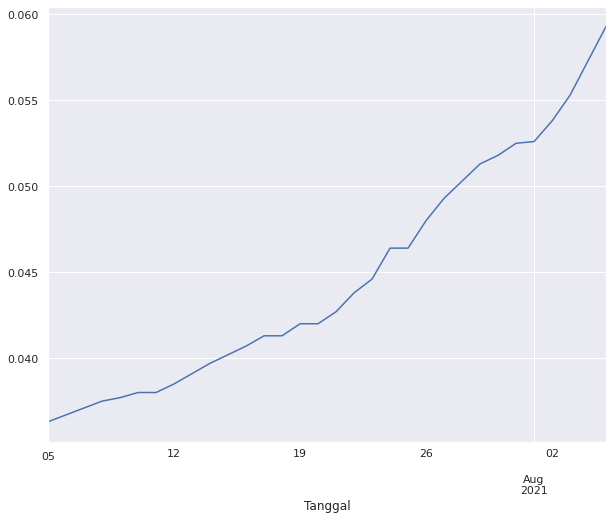

In [ ]:
sumbar['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sumbar['Tingkat Vaksinasi'])

1. ADF :  2.7679904012362364
2. P-Value :  1.0
3. Num of Lags :  10
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  21
5. Critical Values : 
	 1% : -3.7883858816542486
	 5% : -3.013097747543462
	 10% : -2.6463967573696143


In [ ]:
stepwise_model_sumbar = auto_arima(sumbar['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
stepwise_model_sumbar.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-373.211, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-370.963, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-373.426, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-370.992, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-342.361, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-377.230, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-375.341, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-375.290, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-373.284, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-338.360, Time=0.13 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.479 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(2, 1, 0)   Log Likelihood                 192.615
Date:                Mon, 23 Aug 2021   AIC                           -377.230
Time:                        02:12:39   BIC                           -371.494
Sample:                             0   HQIC                          -375.360
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      0.767      0.443      -0.000       0.001
ar.L1          0.2879      0.154      1.865      0.062      -0.015       0.590
ar.L2          0.5216      0.159      3.281      0.001       0.210       0.833
sigma2      2.234e-07   6.77e-08      3.298      0.001    9.06e-08    3.56e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.91   Prob(JB):                         0.87
Heteroskedasticity (H):               6.28   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sumbar = (sumbar[['Tingkat Vaksinasi']])[:25]
test_sumbar = (sumbar[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sumbar.fit(train_sumbar)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_sumbar = stepwise_model_sumbar.predict(n_periods = len(test_sumbar))

In [ ]:
forecast_sumbar = pd.DataFrame(forecast_sumbar, index = test_sumbar.index, columns=['Prediksi'])

In [ ]:
forecast_sumbar

Prediksi
Tanggal             
2021-07-30  0.052134
2021-07-31  0.052958
2021-08-01  0.053699
2021-08-02  0.054430
2021-08-03  0.055119
2021-08-04  0.055801
2021-08-05  0.056462

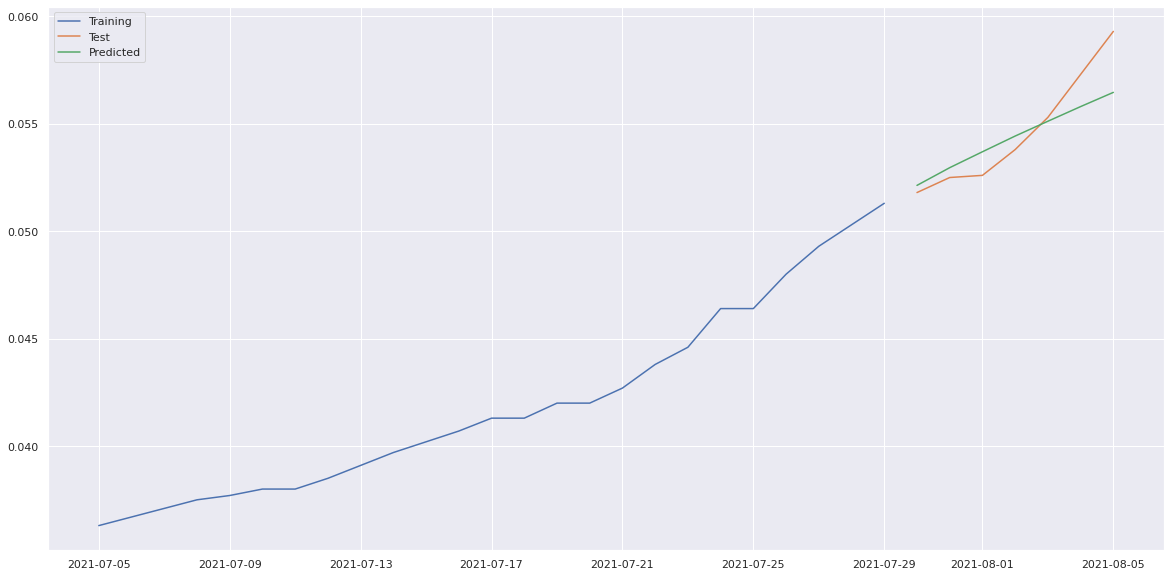

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sumbar,label="Training")
plt.plot(test_sumbar,label="Test")
plt.plot(forecast_sumbar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sumbar = sqrt(mean_squared_error(test_sumbar, forecast_sumbar))
print(rms_sumbar)

0.0013232452366884202


In [ ]:
stepwise_model_sumbar.fit(sumbar['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sumbar = stepwise_model_sumbar.predict(n_periods=329)
pred_sumbar = pd.DataFrame(pred_sumbar, columns=['Tingkat Vaksinasi'])
pred_sumbar.index = index_future_dates
pred_sumbar.tail()

Tingkat Vaksinasi
2022-06-26           0.355024
2022-06-27           0.355910
2022-06-28           0.356796
2022-06-29           0.357682
2022-06-30           0.358568

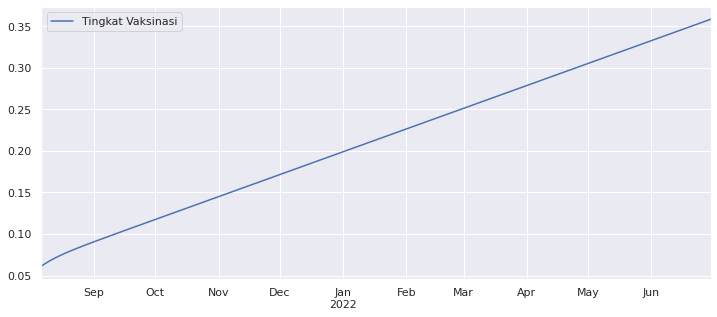

In [ ]:
pred_sumbar.plot(figsize=(12,5),legend=True)

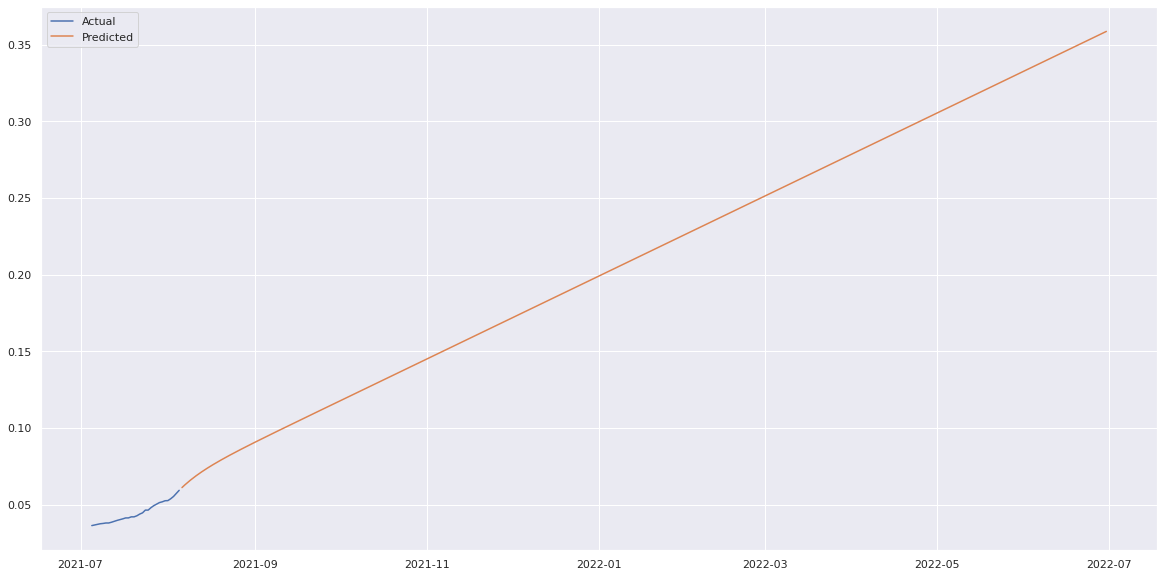

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sumbar['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sumbar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sumatera Selatan

In [ ]:
sumsel = data2[data2['Provinsi']=='Sumatera Selatan']

In [ ]:
sumsel.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                 
2021-07-05  Sumatera Selatan             0.0533        3
2021-07-06  Sumatera Selatan             0.0539        3
2021-07-07  Sumatera Selatan             0.0545        3
2021-07-08  Sumatera Selatan             0.0553        3
2021-07-09  Sumatera Selatan             0.0558        3

In [ ]:
sumsel[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0533
2021-07-06             0.0539
2021-07-07             0.0545
2021-07-08             0.0553
2021-07-09             0.0558

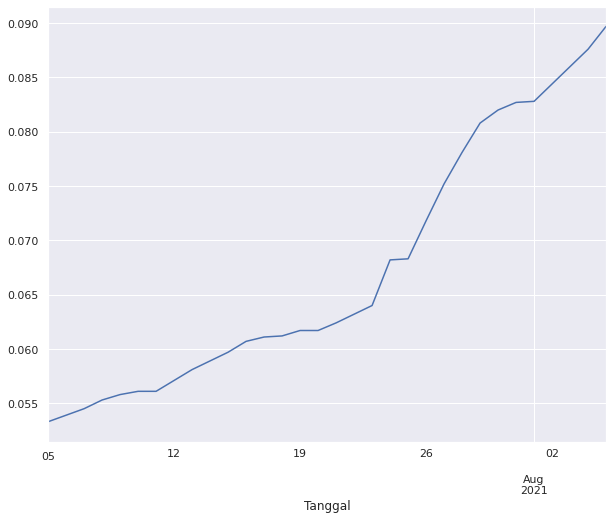

In [ ]:
sumsel['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sumsel['Tingkat Vaksinasi'])

1. ADF :  2.2208912734380273
2. P-Value :  0.9988992590794844
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_sumsel = auto_arima(sumsel['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
stepwise_model_sumsel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-320.208, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-311.095, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-321.573, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-320.736, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-313.048, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-320.480, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-317.805, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-323.435, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-322.300, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-322.030, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-322.378, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-319.148, Time=0.22 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.306 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 163.717
Date:                Mon, 23 Aug 2021   AIC                           -323.435
Time:                        02:12:43   BIC                           -320.632
Sample:                             0   HQIC                          -322.538
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5912      0.097     -6.095      0.000      -0.781      -0.401
sigma2      1.049e-06   1.81e-07      5.802      0.000    6.95e-07     1.4e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 9.94
Prob(Q):                              0.54   Prob(JB):                         0.01
Heteroskedasticity (H):               7.88   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sumsel = (sumsel[['Tingkat Vaksinasi']])[:25]
test_sumsel = (sumsel[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sumsel = stepwise_model_sumsel.fit(train_sumsel)

In [ ]:
forecast_sumsel = stepwise_model_sumsel.predict(n_periods = len(test_sumsel))

In [ ]:
forecast_sumsel = pd.DataFrame(forecast_sumsel, index = test_sumsel.index, columns=['Prediksi'])

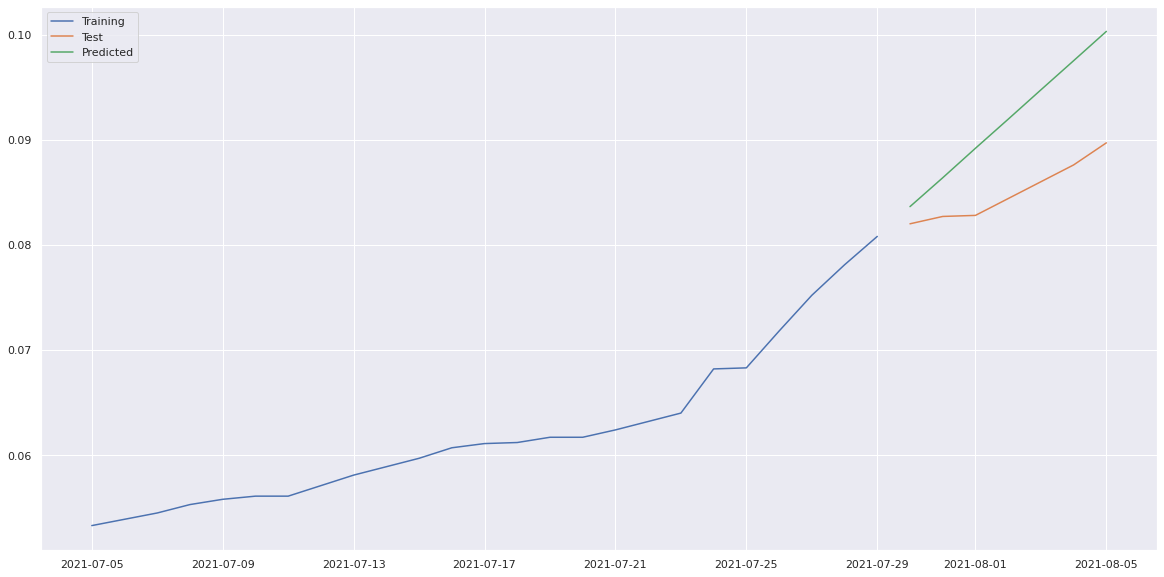

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sumsel,label="Training")
plt.plot(test_sumsel,label="Test")
plt.plot(forecast_sumsel,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sumsel = sqrt(mean_squared_error(test_sumsel, forecast_sumsel))
print(rms_sumsel)

0.007567202764575143


In [ ]:
stepwise_model_sumsel.fit(sumsel['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sumsel = stepwise_model_sumsel.predict(n_periods=len(index_future_dates))
pred_sumsel = pd.DataFrame(pred_sumsel, columns=['Tingkat Vaksinasi'])
pred_sumsel.index = index_future_dates
pred_sumsel.tail()

Tingkat Vaksinasi
2022-06-26           0.711757
2022-06-27           0.713672
2022-06-28           0.715586
2022-06-29           0.717500
2022-06-30           0.719414

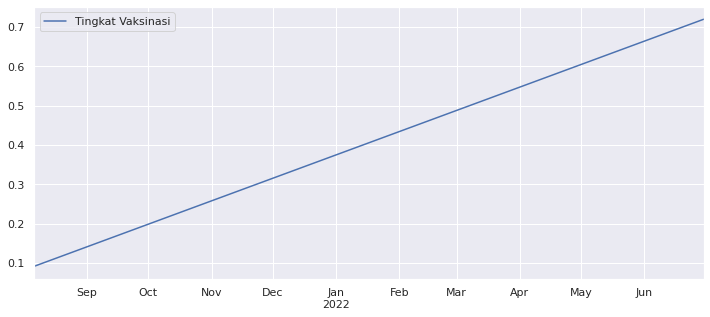

In [ ]:
pred_sumsel.plot(figsize=(12,5),legend=True)

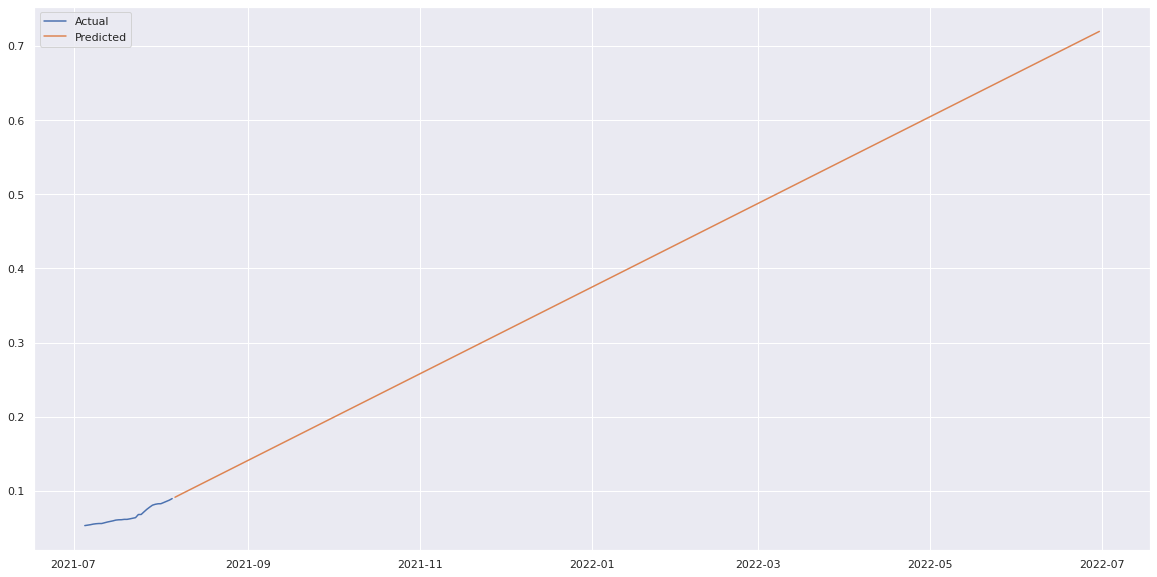

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sumsel['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sumsel,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Sumatera Utara

In [ ]:
sumut = data2[data2['Provinsi']=='Sumatera Utara']

In [ ]:
sumut.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                               
2021-07-05  Sumatera Utara             0.0522        0
2021-07-06  Sumatera Utara             0.0538        0
2021-07-07  Sumatera Utara             0.0555        0
2021-07-08  Sumatera Utara             0.0571        0
2021-07-09  Sumatera Utara             0.0582        0

In [ ]:
sumut[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0522
2021-07-06             0.0538
2021-07-07             0.0555
2021-07-08             0.0571
2021-07-09             0.0582

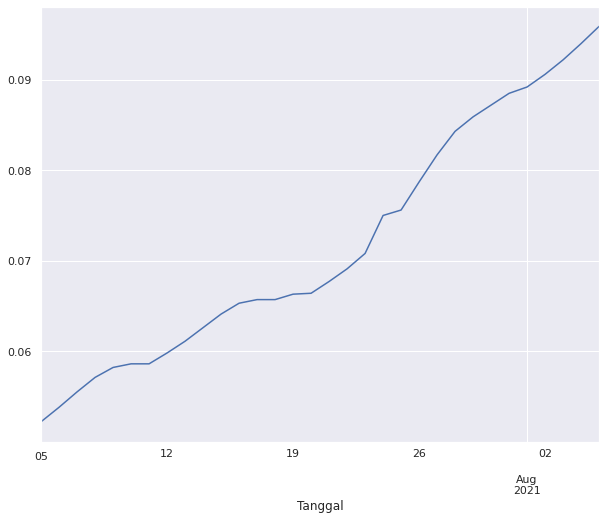

In [ ]:
sumut['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(sumut['Tingkat Vaksinasi'])

1. ADF :  1.4150323231376225
2. P-Value :  0.9971813727585861
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_sumut = auto_arima(sumut['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_sumut.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-327.747, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-322.373, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-329.354, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-329.161, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-324.373, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-327.849, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-326.490, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-331.349, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-329.844, Time=0.23 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-329.742, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-331.153, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-328.487, Time=0.13 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.429 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 167.674
Date:                Mon, 23 Aug 2021   AIC                           -331.349
Time:                        02:12:48   BIC                           -328.546
Sample:                             0   HQIC                          -330.452
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5160      0.118     -4.385      0.000      -0.747      -0.285
sigma2      8.066e-07   1.66e-07      4.848      0.000     4.8e-07    1.13e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.92
Prob(Q):                              0.69   Prob(JB):                         0.23
Heteroskedasticity (H):               1.36   Skew:                             0.22
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_sumut = (sumut[['Tingkat Vaksinasi']])[:25]
test_sumut = (sumut[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_sumut = stepwise_model_sumut.fit(train_sumut)

In [ ]:
forecast_sumut = stepwise_model_sumut.predict(n_periods = len(test_sumut))

In [ ]:
forecast_sumut = pd.DataFrame(forecast_sumut, index = test_sumut.index, columns=['Prediksi'])

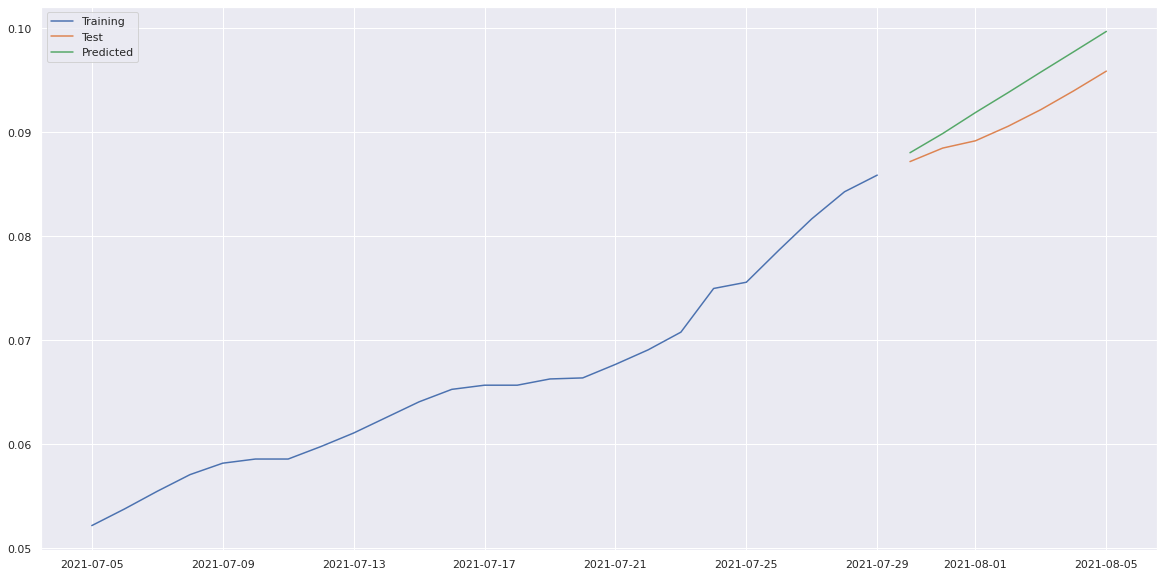

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_sumut,label="Training")
plt.plot(test_sumut,label="Test")
plt.plot(forecast_sumut,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_sumut = sqrt(mean_squared_error(test_sumut, forecast_sumut))
print(rms_sumut)

0.0029828242534659455


In [ ]:
stepwise_model_sumut.fit(sumut['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_sumut = stepwise_model_sumut.predict(n_periods=len(index_future_dates))
pred_sumut = pd.DataFrame(pred_sumut, columns=['Tingkat Vaksinasi'])
pred_sumut.index = index_future_dates
pred_sumut.tail()

Tingkat Vaksinasi
2022-06-26           0.702326
2022-06-27           0.704192
2022-06-28           0.706058
2022-06-29           0.707924
2022-06-30           0.709790

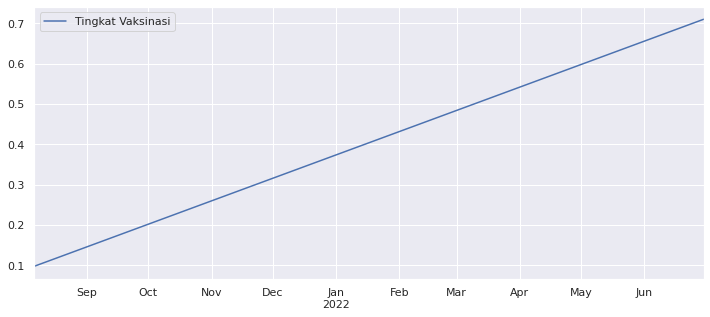

In [ ]:
pred_sumut.plot(figsize=(12,5),legend=True)

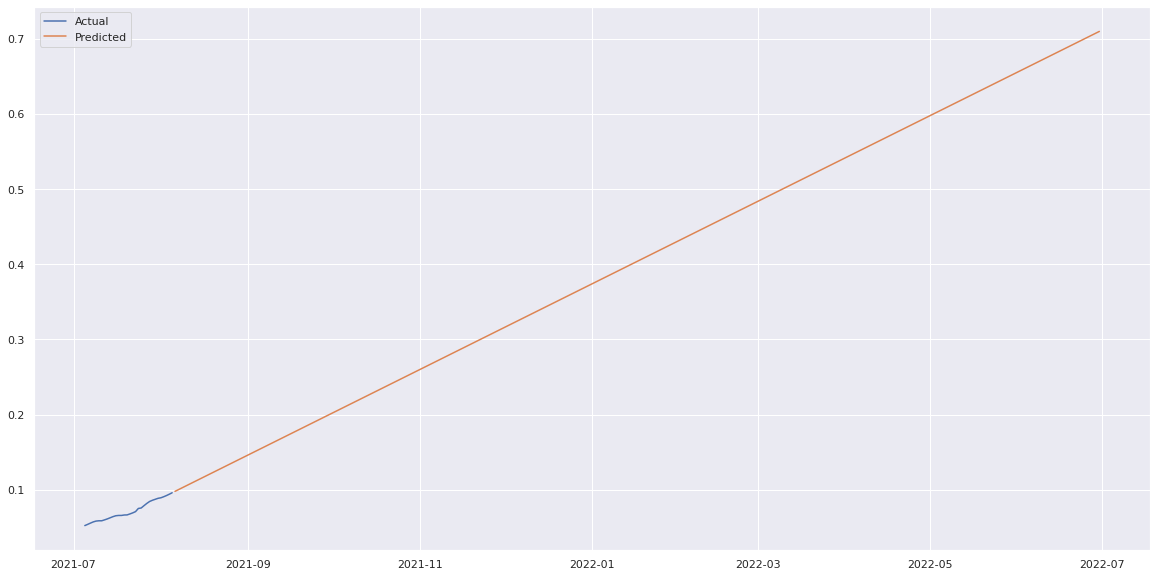

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sumut['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_sumut,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Yogyakarta

In [ ]:
yogya = data2[data2['Provinsi']=='yogyakarta']

In [ ]:
yogya.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                           
2021-07-05  yogyakarta             0.1383        1
2021-07-06  yogyakarta             0.1385        1
2021-07-07  yogyakarta             0.1387        1
2021-07-08  yogyakarta             0.1391        1
2021-07-09  yogyakarta             0.1391        1

In [ ]:
yogya[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.1383
2021-07-06             0.1385
2021-07-07             0.1387
2021-07-08             0.1391
2021-07-09             0.1391

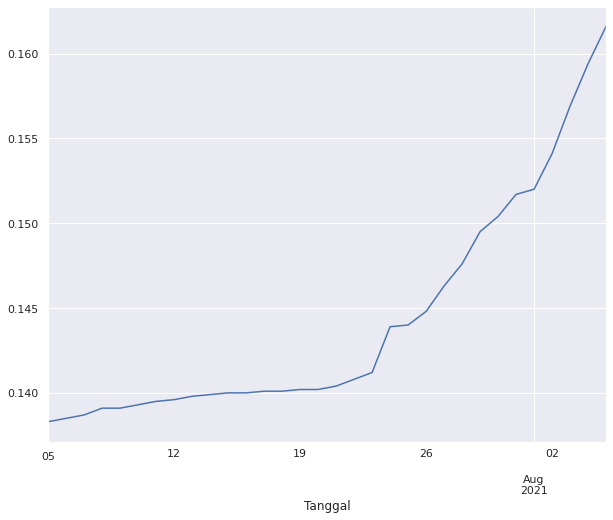

In [ ]:
yogya['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(yogya['Tingkat Vaksinasi'])

1. ADF :  6.3311838598250505
2. P-Value :  1.0
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_yogya = auto_arima(yogya['Tingkat Vaksinasi'], trace=True, test = 'adf',
                                  suppress_warnings=True, stepwise=True)
stepwise_model_yogya.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-342.462, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-339.649, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-345.797, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-348.521, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-346.679, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-346.662, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-344.510, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-349.562, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-337.845, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-347.413, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-347.577, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-344.466, Time=0.13 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-345.756, Time=0.27 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0] intercept
Total fit time: 1.915 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 177.781
Date:                Mon, 23 Aug 2021   AIC                           -349.562
Time:                        02:12:52   BIC                           -345.358
Sample:                             0   HQIC                          -348.217
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    7.19e-05   4.56e-05      1.578      0.115   -1.74e-05       0.000
ma.L1         -0.7065      0.171     -4.125      0.000      -1.042      -0.371
sigma2      4.025e-07   9.56e-08      4.210      0.000    2.15e-07     5.9e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                23.56
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               8.03   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_yogya = (yogya[['Tingkat Vaksinasi']])[:25]
test_yogya = (yogya[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_yogya = stepwise_model_yogya.fit(train_yogya)

In [ ]:
forecast_yogya = stepwise_model_yogya.predict(n_periods = len(test_yogya))

In [ ]:
forecast_yogya = pd.DataFrame(forecast_yogya, index = test_yogya.index, columns=['Prediksi'])

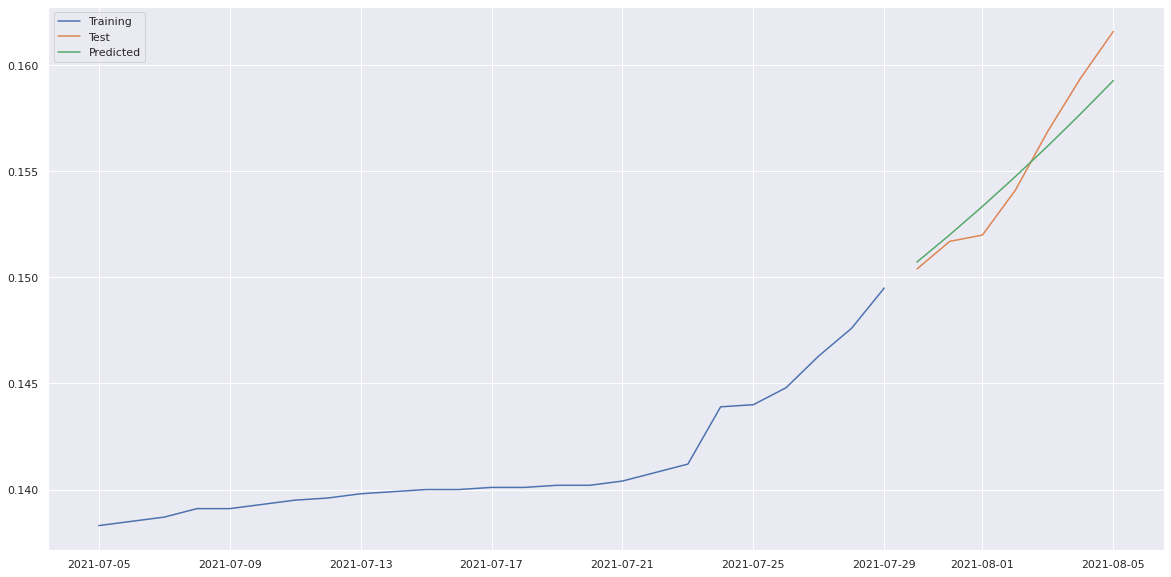

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_yogya,label="Training")
plt.plot(test_yogya,label="Test")
plt.plot(forecast_yogya,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_yogya = sqrt(mean_squared_error(test_yogya, forecast_yogya))
print(rms_yogya)

0.0012618485084458112


In [ ]:
stepwise_model_yogya.fit(yogya['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_yogya = stepwise_model_yogya.predict(n_periods=len(index_future_dates))
pred_yogya = pd.DataFrame(pred_yogya, columns=['Tingkat Vaksinasi'])
pred_yogya.index = index_future_dates
pred_yogya.tail()

Tingkat Vaksinasi
2022-06-26           4.685990
2022-06-27           4.711630
2022-06-28           4.737343
2022-06-29           4.763128
2022-06-30           4.788984

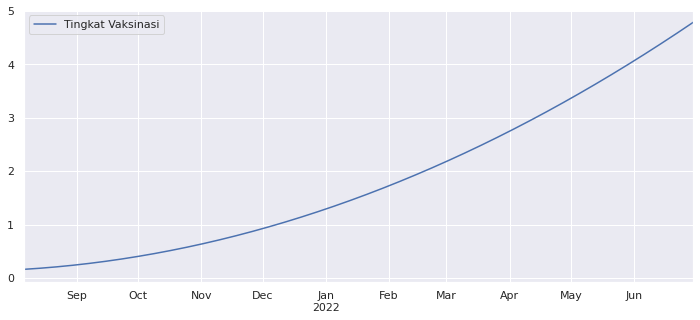

In [ ]:
pred_yogya.plot(figsize=(12,5),legend=True)

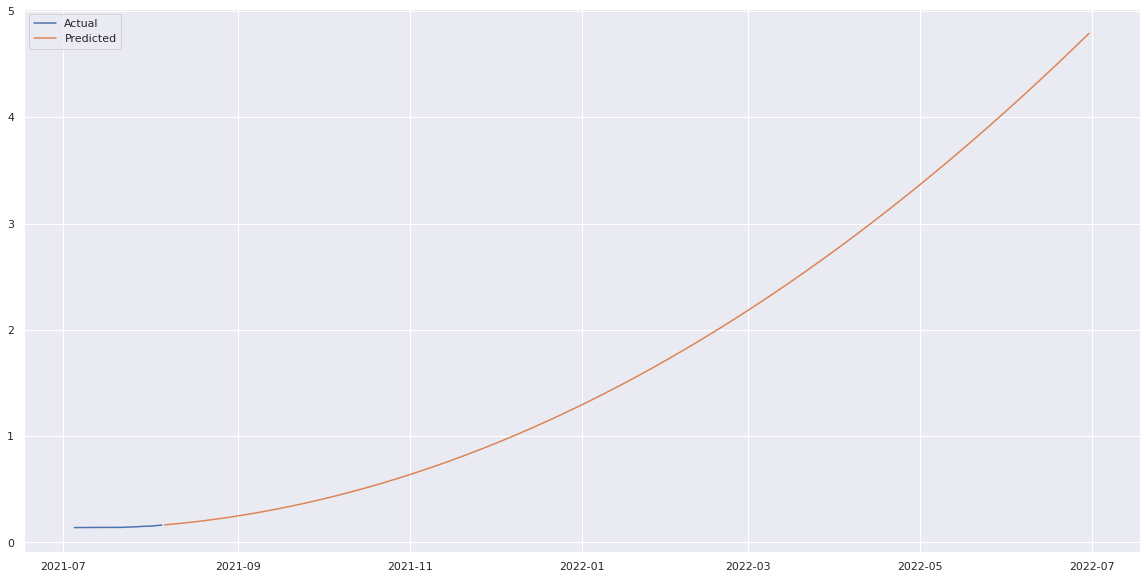

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(yogya['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_yogya,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Aceh**

In [ ]:
aceh = data2[data2['Provinsi']=='Aceh']

In [ ]:
aceh.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05     Aceh             0.0379        1
2021-07-06     Aceh             0.0399        1
2021-07-07     Aceh             0.0419        1
2021-07-08     Aceh             0.0436        1
2021-07-09     Aceh             0.0450        1

In [ ]:
aceh[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0379
2021-07-06             0.0399
2021-07-07             0.0419
2021-07-08             0.0436
2021-07-09             0.0450

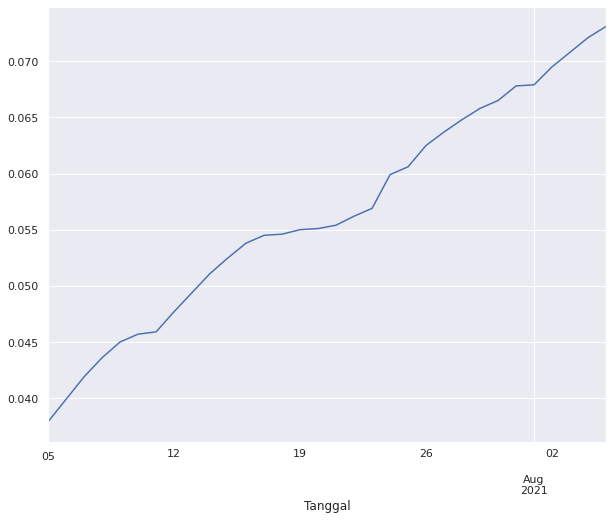

In [ ]:
aceh['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(aceh['Tingkat Vaksinasi'])

1. ADF :  -0.8841404462114439
2. P-Value :  0.7931503212224065
3. Num of Lags :  6
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  25
5. Critical Values : 
	 1% : -3.7238633119999998
	 5% : -2.98648896
	 10% : -2.6328004


In [ ]:
stepwise_model_aceh = auto_arima(aceh['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_aceh.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-342.627, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-335.176, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-344.636, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-343.405, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-337.134, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-342.643, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-329.174, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-346.501, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-344.504, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-344.487, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-345.226, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-331.128, Time=0.22 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.522 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 175.250
Date:                Mon, 23 Aug 2021   AIC                           -346.501
Time:                        02:12:57   BIC                           -343.698
Sample:                             0   HQIC                          -345.604
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5708      0.154     -3.717      0.000      -0.872      -0.270
sigma2      4.875e-07   9.47e-08      5.150      0.000    3.02e-07    6.73e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                12.94
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             1.25
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_aceh=(aceh[['Tingkat Vaksinasi']]).iloc[:25]
test_aceh=(aceh[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_aceh.fit(train_aceh)

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_aceh=stepwise_model_aceh.predict(n_periods=len(test_aceh))

In [ ]:
forecast_aceh = pd.DataFrame(forecast_aceh, index = test_aceh.index, columns=['Prediksi'])

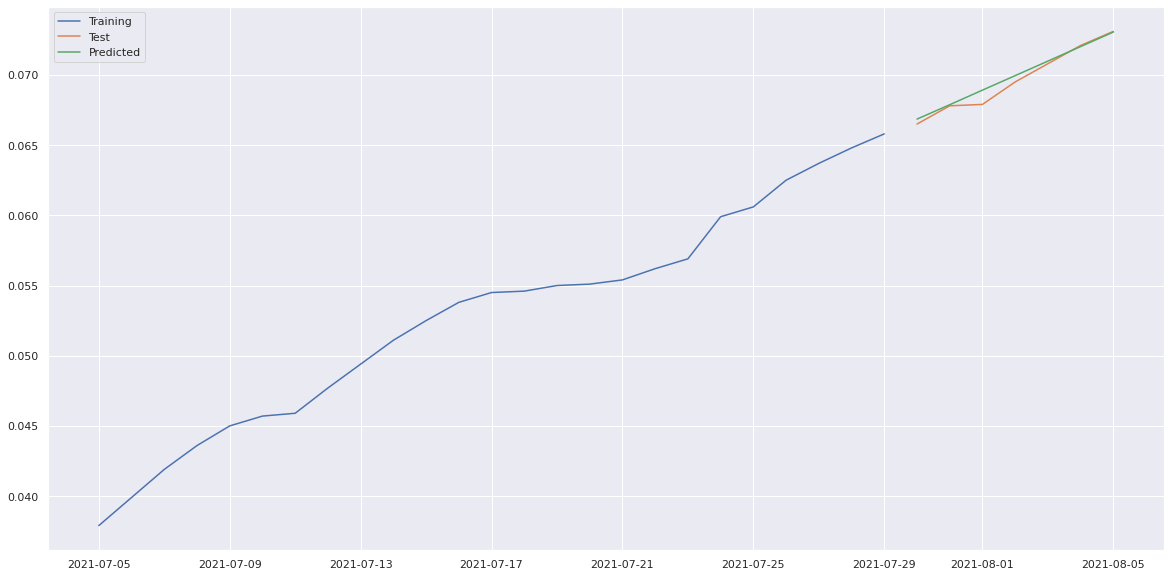

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_aceh,label='Training')
plt.plot(test_aceh,label='Test')
plt.plot(forecast_aceh,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_aceh

Prediksi
Tanggal             
2021-07-30  0.066853
2021-07-31  0.067878
2021-08-01  0.068918
2021-08-02  0.069950
2021-08-03  0.070986
2021-08-04  0.072020
2021-08-05  0.073055

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(test_aceh,forecast_aceh))
print(rms)

0.0004490904580596336


In [ ]:
stepwise_model_aceh.fit(aceh['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_aceh = stepwise_model_aceh.predict(n_periods=len(index_future_dates))
pred_aceh = pd.DataFrame(pred_aceh, columns=['Tingkat Vaksinasi'])
pred_aceh.index = index_future_dates
pred_aceh.tail()

Tingkat Vaksinasi
2022-06-26           0.433567
2022-06-27           0.434676
2022-06-28           0.435785
2022-06-29           0.436894
2022-06-30           0.438003

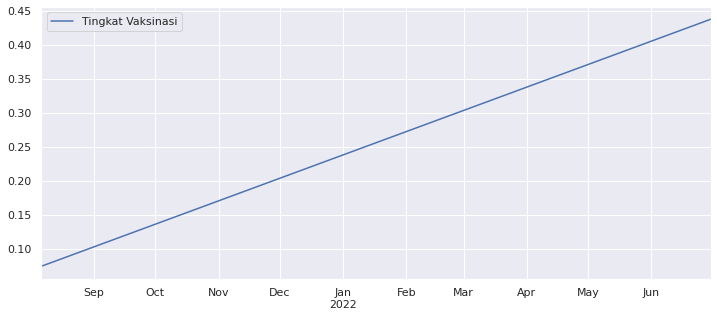

In [ ]:
pred_aceh.plot(figsize=(12,5),legend=True)

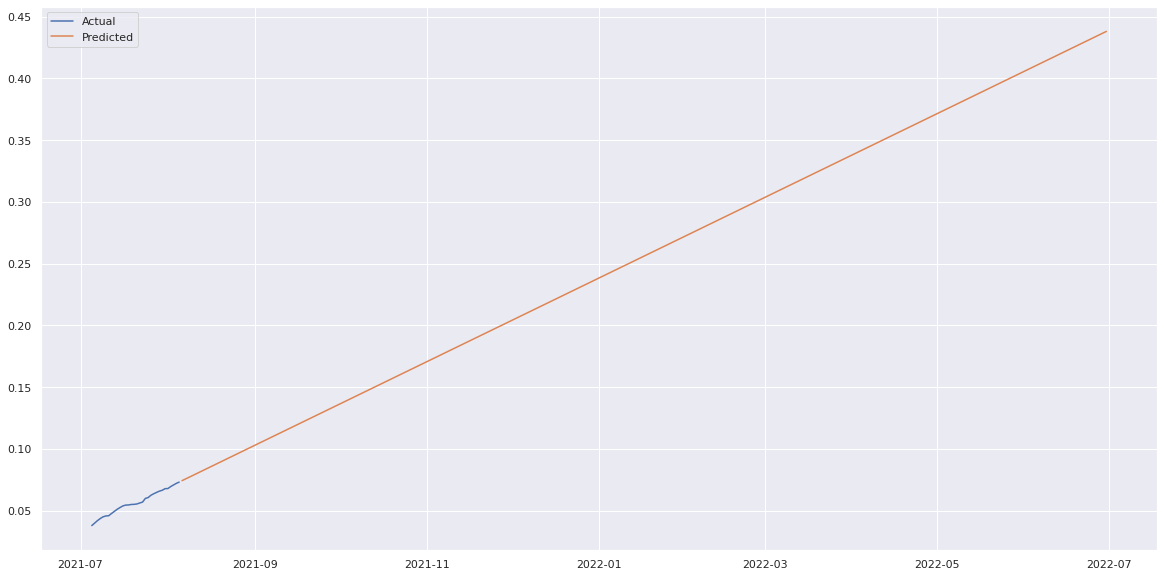

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(aceh['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_aceh,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Bali**#

In [ ]:
bali = data2[data2['Provinsi']=='Bali']

In [ ]:
bali.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05     Bali             0.2233        1
2021-07-06     Bali             0.2237        1
2021-07-07     Bali             0.2241        1
2021-07-08     Bali             0.2244        1
2021-07-09     Bali             0.2247        1

In [ ]:
bali[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.2233
2021-07-06             0.2237
2021-07-07             0.2241
2021-07-08             0.2244
2021-07-09             0.2247

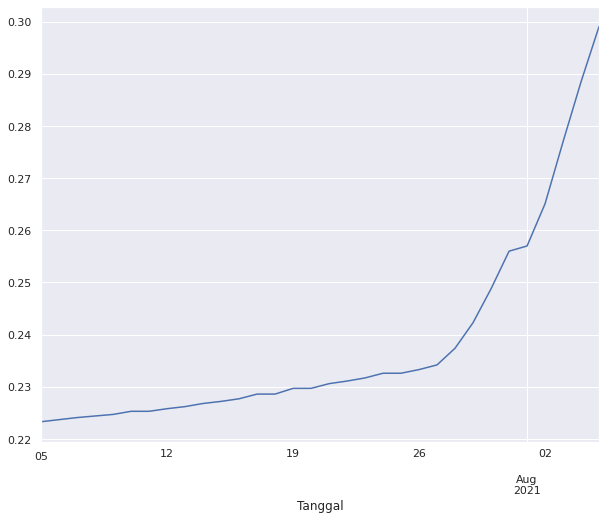

In [ ]:
bali['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(bali['Tingkat Vaksinasi'])

1. ADF :  3.1759333685627835
2. P-Value :  1.0
3. Num of Lags :  9
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  22
5. Critical Values : 
	 1% : -3.769732625845229
	 5% : -3.005425537190083
	 10% : -2.6425009917355373


In [ ]:
stepwise_model_bali = auto_arima(bali['Tingkat Vaksinasi'],start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_bali.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-282.422, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-284.084, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-283.259, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-284.503, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-285.220, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.653 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 143.610
Date:                Mon, 23 Aug 2021   AIC                           -285.220
Time:                        02:13:00   BIC                           -283.819
Sample:                             0   HQIC                          -284.772
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.058e-06   5.36e-07      7.574      0.000    3.01e-06    5.11e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                41.50
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):             142.63   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_bali=(bali[['Tingkat Vaksinasi']]).iloc[:25]
test_bali=(bali[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_bali.fit(train_bali)

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_bali=stepwise_model_bali.predict(n_periods=len(test_bali))

In [ ]:
forecast_bali = pd.DataFrame(forecast_bali, index = test_bali.index, columns=['Prediksi'])

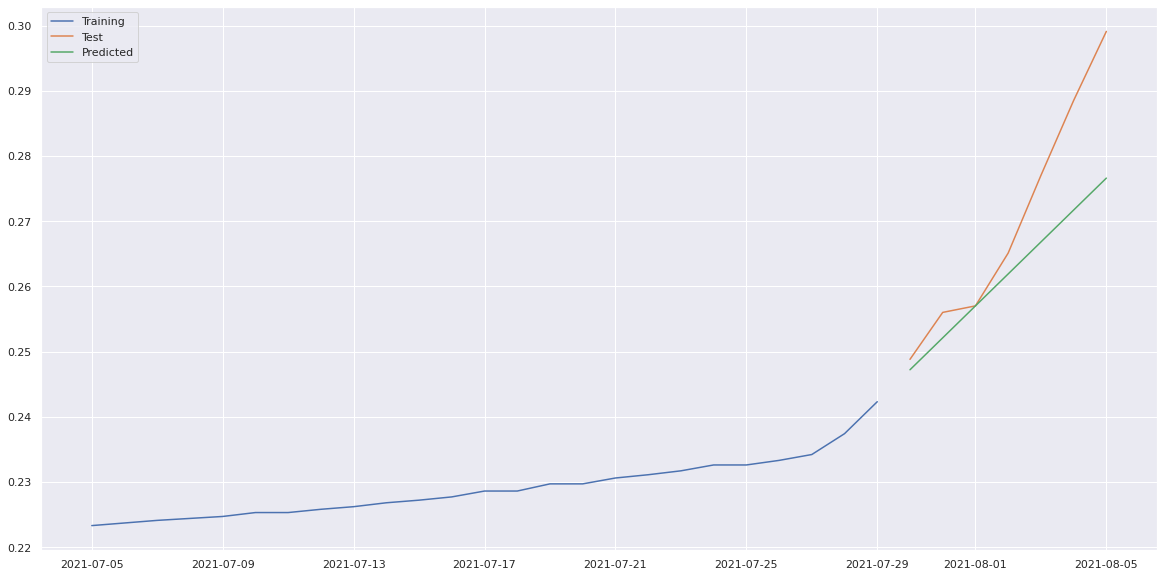

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_bali,label='Training')
plt.plot(test_bali,label='Test')
plt.plot(forecast_bali,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_bali

Prediksi
Tanggal             
2021-07-30  0.247200
2021-07-31  0.252099
2021-08-01  0.256999
2021-08-02  0.261899
2021-08-03  0.266798
2021-08-04  0.271698
2021-08-05  0.276598

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(test_bali,forecast_bali))
print(rms)

0.011468875049829439


In [ ]:
stepwise_model_bali.fit(bali['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_bali = stepwise_model_bali.predict(n_periods=len(index_future_dates))
pred_bali = pd.DataFrame(pred_bali, columns=['Tingkat Vaksinasi'])
pred_bali.index = index_future_dates
pred_bali.tail()

Tingkat Vaksinasi
2022-06-26           3.744108
2022-06-27           3.754708
2022-06-28           3.765308
2022-06-29           3.775908
2022-06-30           3.786508

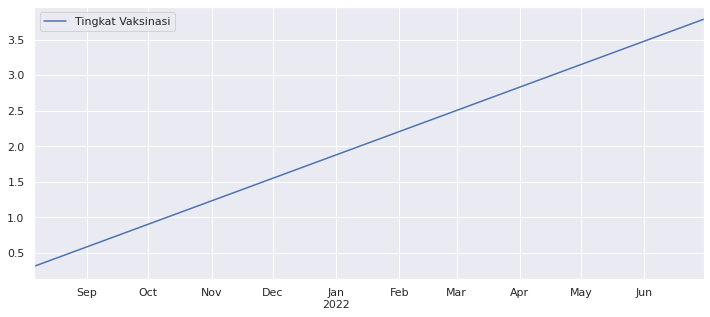

In [ ]:
pred_bali.plot(figsize=(12,5),legend=True)

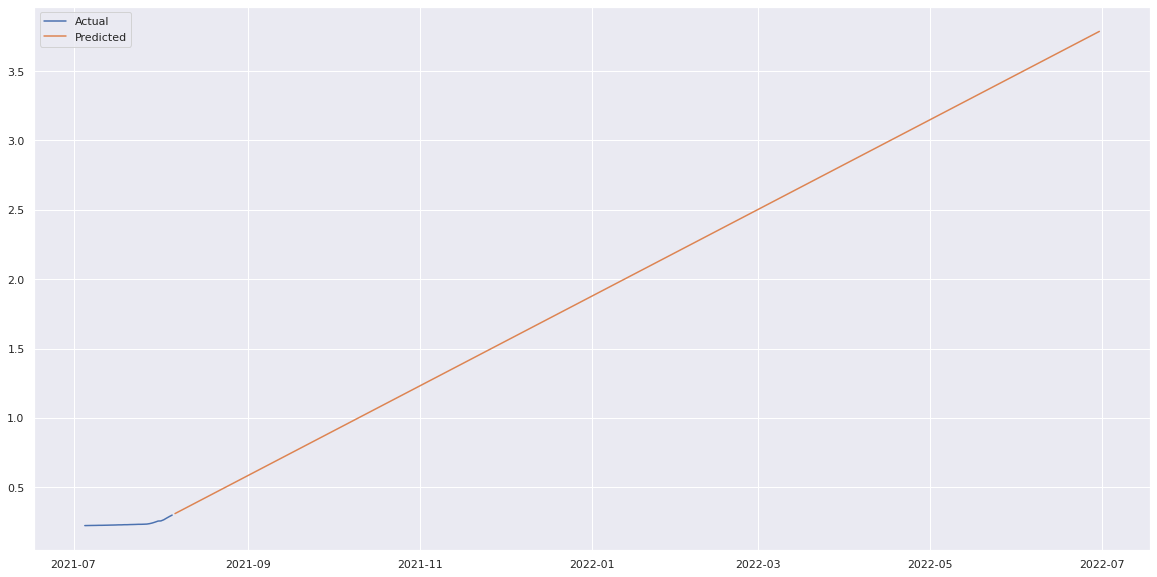

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(bali['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_bali,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Banten**

In [ ]:
banten = data2[data2['Provinsi']=='Banten']

In [ ]:
banten.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05   Banten             0.0495        3
2021-07-06   Banten             0.0503        3
2021-07-07   Banten             0.0512        3
2021-07-08   Banten             0.0520        3
2021-07-09   Banten             0.0525        3

In [ ]:
banten[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0495
2021-07-06             0.0503
2021-07-07             0.0512
2021-07-08             0.0520
2021-07-09             0.0525

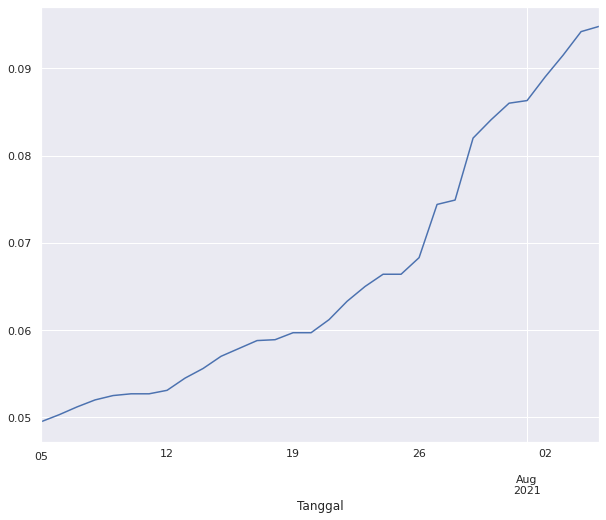

In [ ]:
banten['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(banten['Tingkat Vaksinasi'])

1. ADF :  2.0190340371820503
2. P-Value :  0.9986971791800564
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_banten = auto_arima(banten['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
stepwise_model_banten.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-293.276, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-278.598, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-293.293, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-296.455, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-280.598, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-292.794, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-293.721, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-297.276, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-295.189, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-294.307, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-295.281, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-295.127, Time=0.18 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.547 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 150.638
Date:                Mon, 23 Aug 2021   AIC                           -297.276
Time:                        02:13:05   BIC                           -294.474
Sample:                             0   HQIC                          -296.380
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8314      0.133     -6.256      0.000      -1.092      -0.571
sigma2       2.46e-06   4.53e-07      5.435      0.000    1.57e-06    3.35e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.35   Jarque-Bera (JB):                41.72
Prob(Q):                              0.24   Prob(JB):                         0.00
Heteroskedasticity (H):              28.84   Skew:                             1.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_banten=(banten[['Tingkat Vaksinasi']]).iloc[:25]
test_banten=(banten[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_banten.fit(train_banten)

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_banten=stepwise_model_banten.predict(n_periods=len(test_banten))

In [ ]:
forecast_banten = pd.DataFrame(forecast_banten, index = test_banten.index, columns=['Prediksi'])

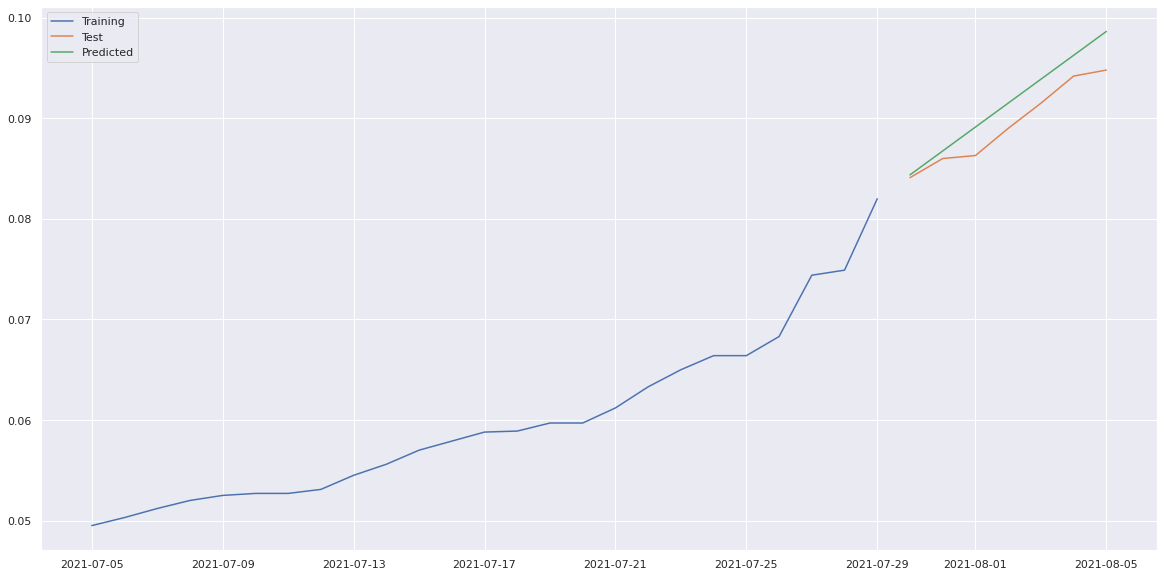

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_banten,label='Training')
plt.plot(test_banten,label='Test')
plt.plot(forecast_banten,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_banten

Prediksi
Tanggal             
2021-07-30  0.084377
2021-07-31  0.086755
2021-08-01  0.089133
2021-08-02  0.091510
2021-08-03  0.093888
2021-08-04  0.096266
2021-08-05  0.098643

In [ ]:
rms_banten=sqrt(mean_squared_error(test_banten,forecast_banten))
print(rms_banten)

0.002381887918774136


In [ ]:
stepwise_model_banten.fit(banten['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_banten = stepwise_model_banten.predict(n_periods=len(index_future_dates))
pred_banten = pd.DataFrame(pred_banten, columns=['Tingkat Vaksinasi'])
pred_banten.index = index_future_dates
pred_banten.tail()

Tingkat Vaksinasi
2022-06-26           0.751693
2022-06-27           0.753714
2022-06-28           0.755735
2022-06-29           0.757757
2022-06-30           0.759778

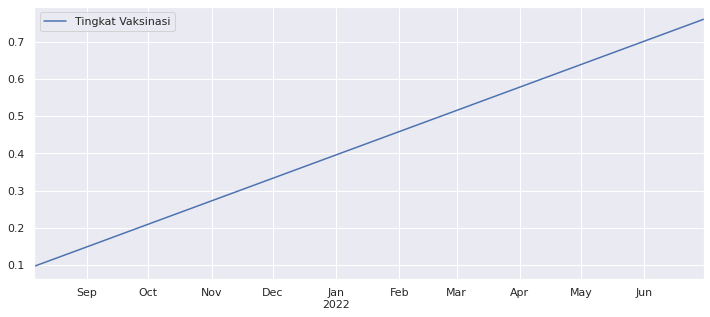

In [ ]:
pred_banten.plot(figsize=(12,5),legend=True)

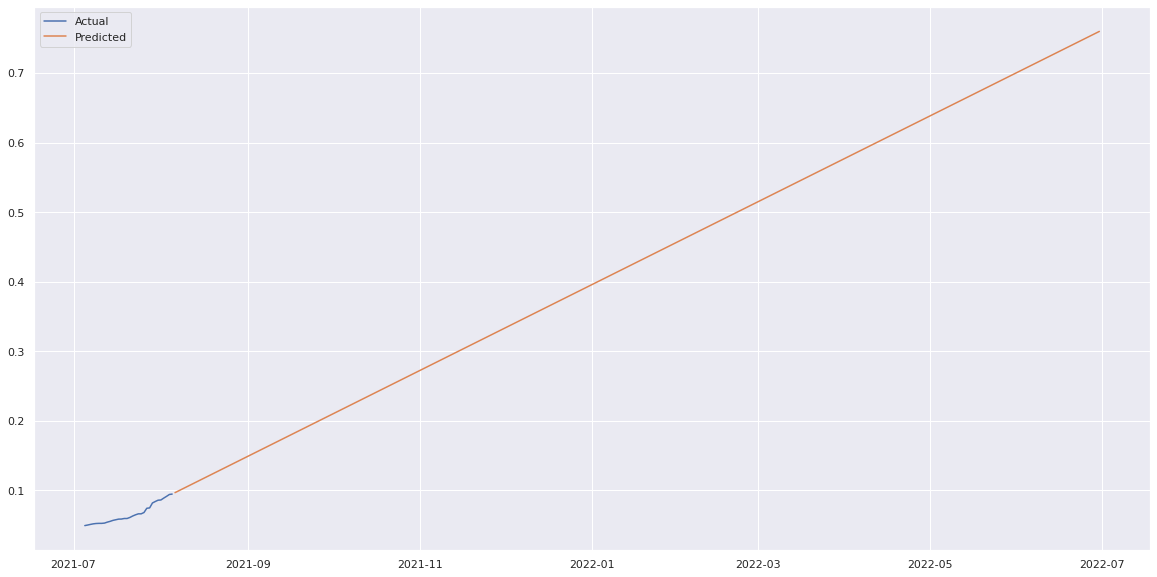

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(banten['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_banten,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Jakarta**

In [ ]:
jakarta = data2[data2['Provinsi']=='Jakarta']

In [ ]:
jakarta.tail()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-08-01  Jakarta             0.3271        3
2021-08-02  Jakarta             0.3413        3
2021-08-03  Jakarta             0.3551        3
2021-08-04  Jakarta             0.3703        3
2021-08-05  Jakarta             0.3707        3

In [ ]:
jakarta[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.3271
2021-08-02             0.3413
2021-08-03             0.3551
2021-08-04             0.3703
2021-08-05             0.3707

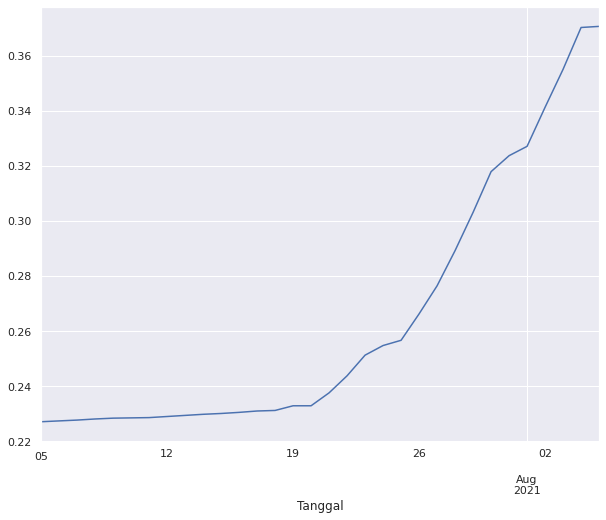

In [ ]:
jakarta['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(jakarta['Tingkat Vaksinasi'])

1. ADF :  -5.438344212927163
2. P-Value :  2.812531179831151e-06
3. Num of Lags :  7
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  24
5. Critical Values : 
	 1% : -3.7377092158564813
	 5% : -2.9922162731481485
	 10% : -2.635746736111111


In [ ]:
stepwise_model_jakarta = auto_arima(jakarta['Tingkat Vaksinasi'],trace=True,
                                    suppress_warnings=True, test='adf', m=1)
stepwise_model_jakarta.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-242.799, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-240.452, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-238.726, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-239.900, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-238.437, Time=0.21 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-236.774, Time=0.24 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-239.624, Time=0.27 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-235.226, Time=0.24 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-236.452, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-239.956, Time=0.56 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-242.520, Time=0.11 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-237.220, Time=0.27 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-241.164, Time=0.43 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0]          
Total fit time: 2.970 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(2, 2, 2)   Log Likelihood                 126.400
Date:                Mon, 23 Aug 2021   AIC                           -242.799
Time:                        02:13:11   BIC                           -235.793
Sample:                             0   HQIC                          -240.558
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6770      0.368      1.837      0.066      -0.045       1.399
ar.L2         -0.7176      0.305     -2.353      0.019      -1.315      -0.120
ma.L1         -1.0977      0.343     -3.201      0.001      -1.770      -0.425
ma.L2          0.5812      0.337      1.726      0.084      -0.079       1.241
sigma2      1.223e-05   4.34e-06      2.815      0.005    3.71e-06    2.07e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.72
Prob(Q):                              0.72   Prob(JB):                         0.16
Heteroskedasticity (H):            2463.14   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_jakarta=(jakarta[['Tingkat Vaksinasi']]).iloc[:25]
test_jakarta=(jakarta[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_jakarta.fit(train_jakarta)

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_jakarta=stepwise_model_jakarta.predict(n_periods=len(test_jakarta))

In [ ]:
forecast_jakarta = pd.DataFrame(forecast_jakarta, index = test_jakarta.index, columns=['Prediksi'])

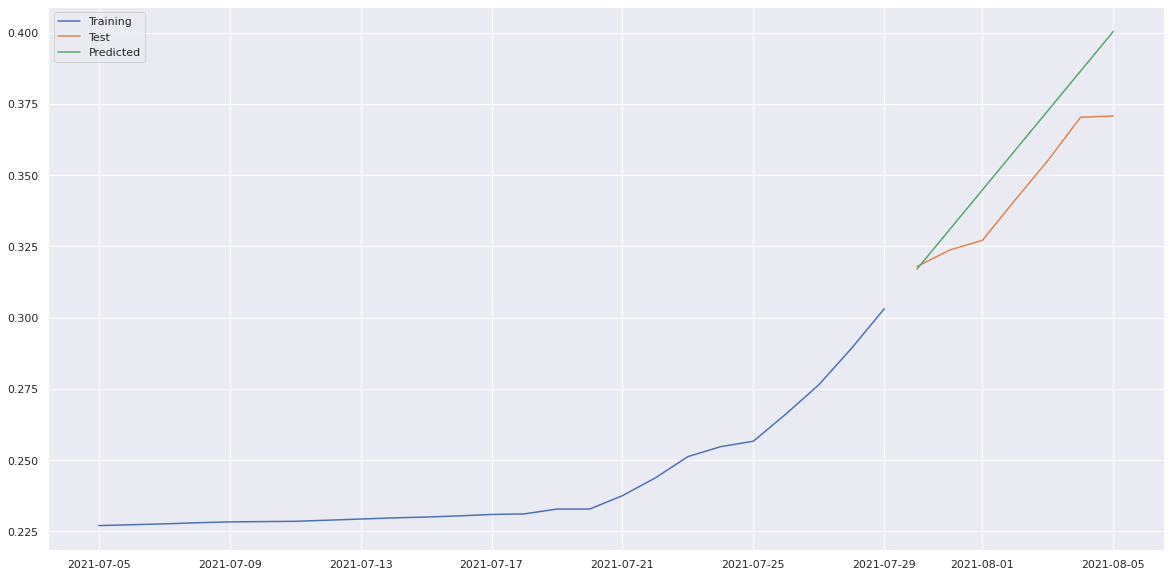

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_jakarta,label='Training')
plt.plot(test_jakarta,label='Test')
plt.plot(forecast_jakarta,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_jakarta

Prediksi
Tanggal             
2021-07-30    0.3170
2021-07-31    0.3309
2021-08-01    0.3448
2021-08-02    0.3587
2021-08-03    0.3726
2021-08-04    0.3865
2021-08-05    0.4004

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms_jakarta=sqrt(mean_squared_error(test_jakarta,forecast_jakarta))
print(rms_jakarta)

0.01740053822356122


In [ ]:
stepwise_model_jakarta.fit(jakarta['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 2, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_jakarta = stepwise_model_jakarta.predict(len(index_future_dates))
pred_jakarta = pd.DataFrame(pred_jakarta, columns=['Tingkat Vaksinasi'])
pred_jakarta.index = index_future_dates
pred_jakarta.tail()

Tingkat Vaksinasi
2022-06-26           2.772986
2022-06-27           2.780378
2022-06-28           2.787769
2022-06-29           2.795160
2022-06-30           2.802552

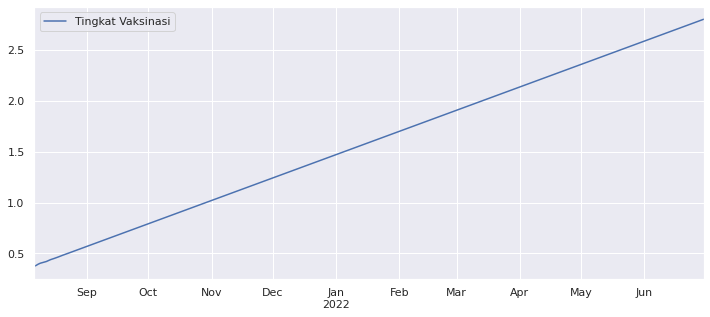

In [ ]:
pred_jakarta.plot(figsize=(12,5),legend=True)

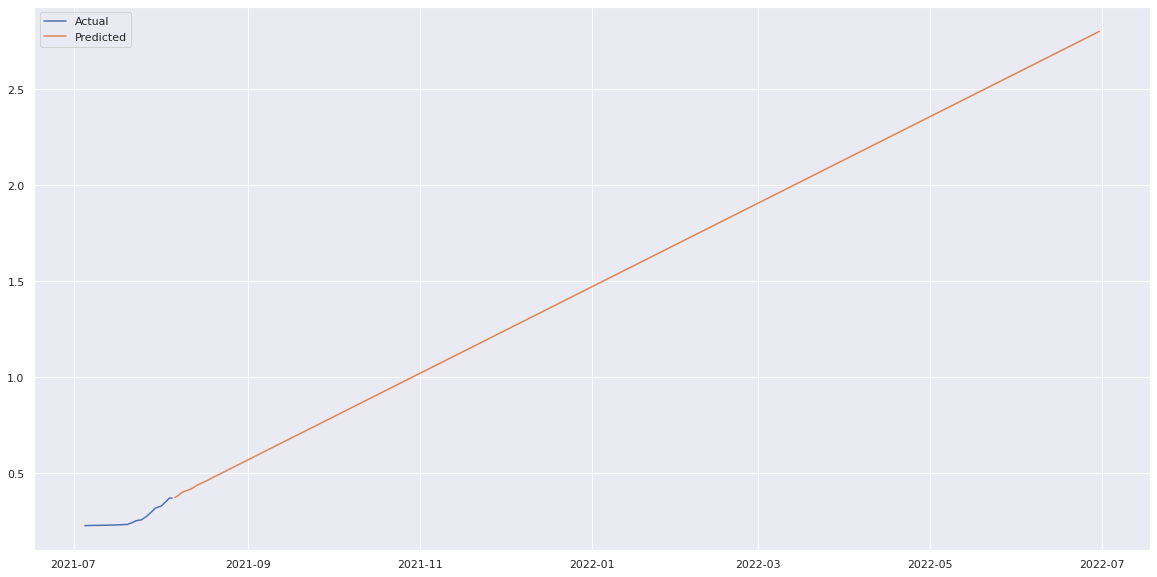

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jakarta['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_jakarta,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Jawa Barat**

In [ ]:
jabar = data2[data2['Provinsi']=='Jawa Barat']

In [ ]:
jabar.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                           
2021-07-05  Jawa Barat             0.0520        2
2021-07-06  Jawa Barat             0.0527        2
2021-07-07  Jawa Barat             0.0534        2
2021-07-08  Jawa Barat             0.0543        2
2021-07-09  Jawa Barat             0.0550        2

In [ ]:
jabar[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0520
2021-07-06             0.0527
2021-07-07             0.0534
2021-07-08             0.0543
2021-07-09             0.0550

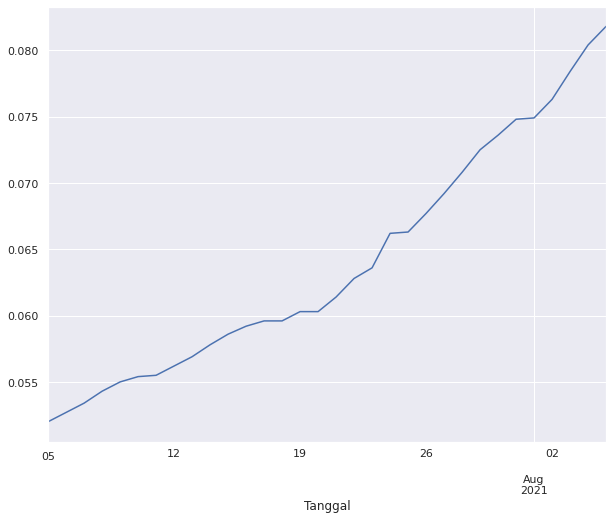

In [ ]:
jabar['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(jabar['Tingkat Vaksinasi'])

1. ADF :  3.2454904348886826
2. P-Value :  1.0
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_jabar = auto_arima(jabar['Tingkat Vaksinasi'],
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_jabar.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-348.248, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-341.206, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-350.897, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-354.139, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-350.803, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-352.453, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-350.455, Time=0.25 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-353.233, Time=0.10 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.087 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 179.069
Date:                Mon, 23 Aug 2021   AIC                           -354.139
Time:                        02:13:15   BIC                           -351.337
Sample:                             0   HQIC                          -353.242
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7100      0.113     -6.278      0.000      -0.932      -0.488
sigma2      3.704e-07   7.65e-08      4.841      0.000     2.2e-07     5.2e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.37   Prob(JB):                         0.49
Heteroskedasticity (H):               5.69   Skew:                             0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_jabar=(jabar[['Tingkat Vaksinasi']]).iloc[:25]
test_jabar=(jabar[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_jabar.fit(train_jabar)

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_jabar=stepwise_model_jabar.predict(n_periods=len(test_jabar))

In [ ]:
forecast_jabar = pd.DataFrame(forecast_jabar, index = test_jabar.index, columns=['Prediksi'])

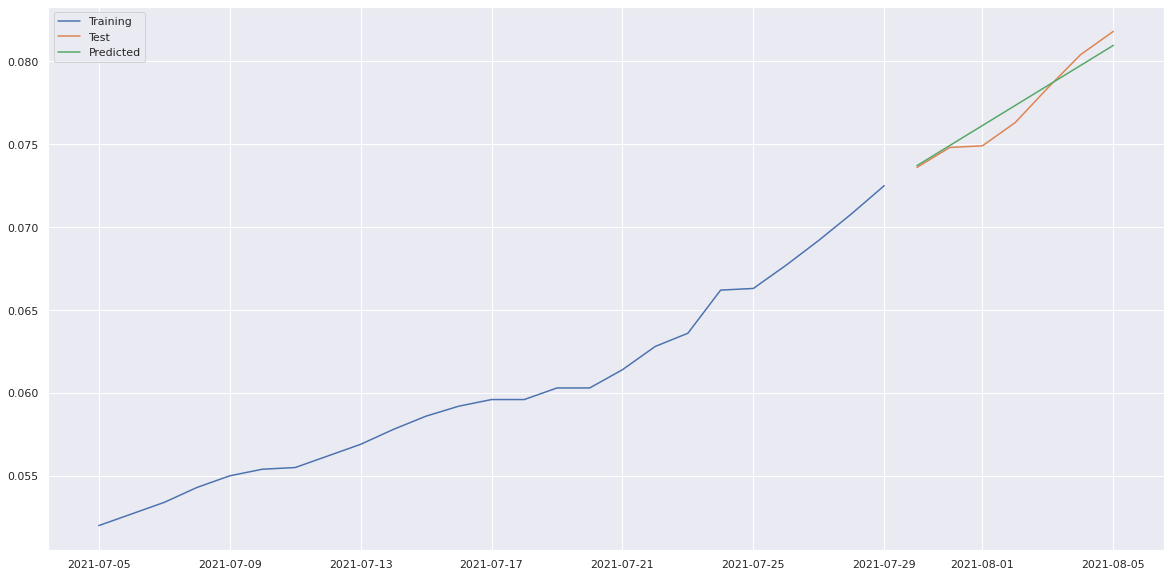

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_jabar,label='Training')
plt.plot(test_jabar,label='Test')
plt.plot(forecast_jabar,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_jabar

Prediksi
Tanggal             
2021-07-30  0.073708
2021-07-31  0.074916
2021-08-01  0.076124
2021-08-02  0.077332
2021-08-03  0.078541
2021-08-04  0.079749
2021-08-05  0.080957

In [ ]:
rms_jabar=sqrt(mean_squared_error(test_jabar,forecast_jabar))
print(rms_jabar)

0.0007314508433288247


In [ ]:
stepwise_model_jabar.fit(jabar['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06', end='2022-06-30')
pred_jabar = stepwise_model_jabar.predict(n_periods=len(index_future_dates))
pred_jabar = pd.DataFrame(pred_jabar, columns=['Tingkat Vaksinasi'])
pred_jabar.index = index_future_dates
pred_jabar.tail()

Tingkat Vaksinasi
2022-06-26           0.573234
2022-06-27           0.574746
2022-06-28           0.576258
2022-06-29           0.577770
2022-06-30           0.579282

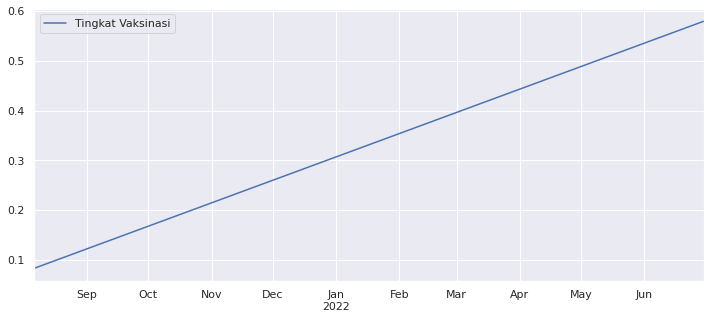

In [ ]:
pred_jabar.plot(figsize=(12,5),legend=True)

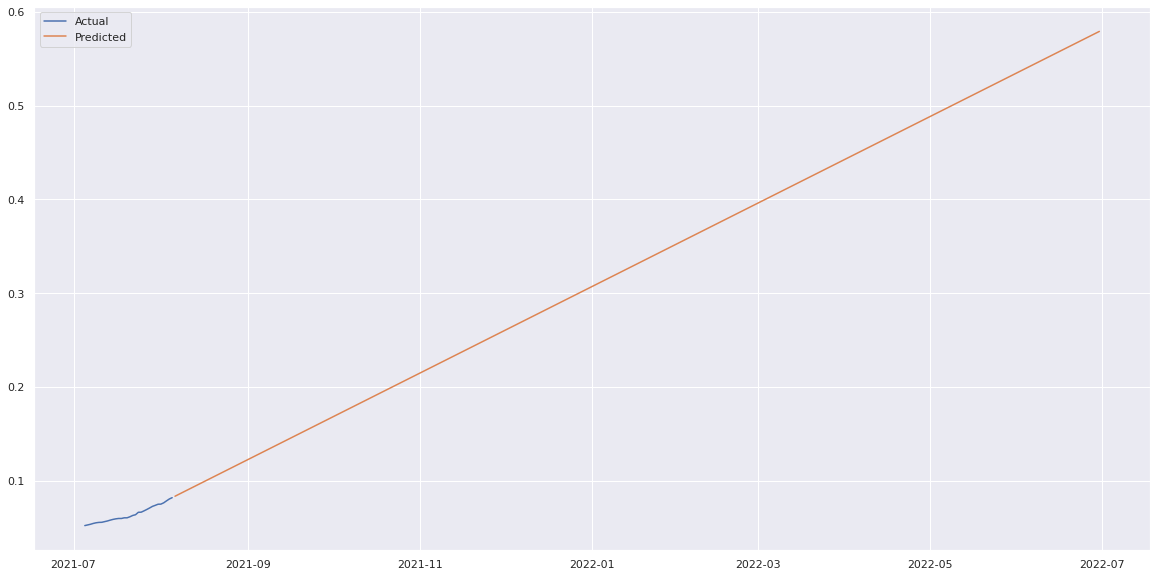

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jabar['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_jabar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Jawa Timur**

In [ ]:
jatim=data2[data2['Provinsi']=='Jawa Timur']

In [ ]:
jatim.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                           
2021-07-05  Jawa Timur             0.0700        2
2021-07-06  Jawa Timur             0.0711        2
2021-07-07  Jawa Timur             0.0722        2
2021-07-08  Jawa Timur             0.0736        2
2021-07-09  Jawa Timur             0.0745        2

In [ ]:
jatim[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0700
2021-07-06             0.0711
2021-07-07             0.0722
2021-07-08             0.0736
2021-07-09             0.0745

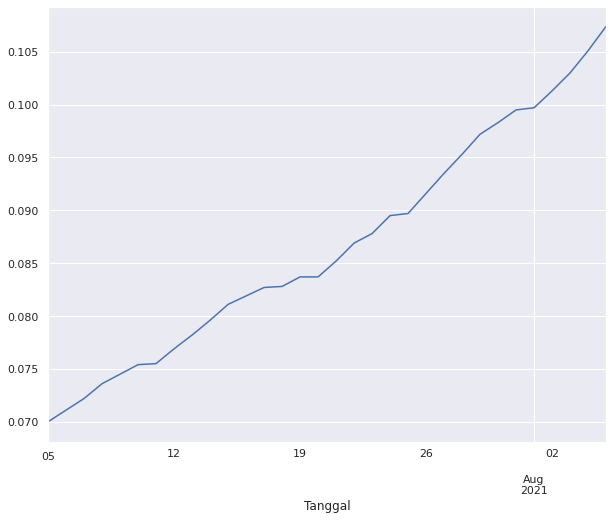

In [ ]:
jatim['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(jatim['Tingkat Vaksinasi'])

1. ADF :  2.289719038015724
2. P-Value :  0.9989485595740482
3. Num of Lags :  10
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  21
5. Critical Values : 
	 1% : -3.7883858816542486
	 5% : -3.013097747543462
	 10% : -2.6463967573696143


In [ ]:
stepwise_model_jatim = auto_arima(jatim['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_jatim.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-363.745, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-366.676, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-365.889, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-365.381, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-319.556, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.580 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 185.338
Date:                Mon, 23 Aug 2021   AIC                           -366.676
Time:                        02:13:19   BIC                           -363.808
Sample:                             0   HQIC                          -365.741
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000     10.219      0.000       0.001       0.001
sigma2      3.753e-07   1.23e-07      3.040      0.002    1.33e-07    6.17e-07
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.27   Prob(JB):                         0.49
Heteroskedasticity (H):               2.88   Skew:                            -0.43
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_jatim=(jatim[['Tingkat Vaksinasi']]).iloc[:25]
test_jatim=(jatim[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_jatim.fit(train_jatim)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_jatim=stepwise_model_jatim.predict(n_periods=len(test_jatim))

In [ ]:
forecast_jatim = pd.DataFrame(forecast_jatim, index = test_jatim.index, columns=['Prediksi'])

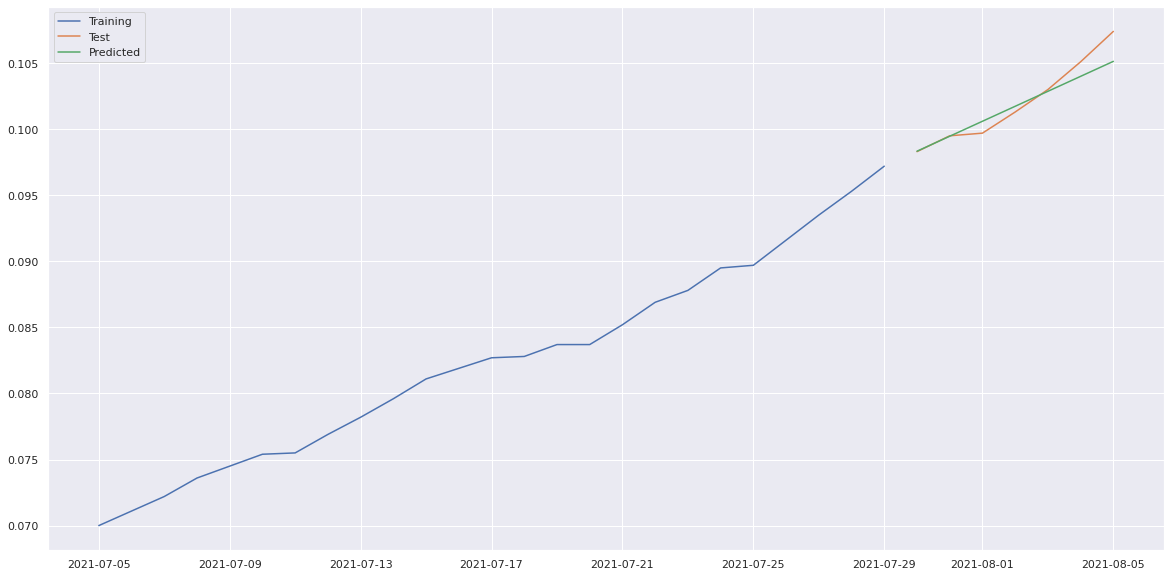

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_jatim,label='Training')
plt.plot(test_jatim,label='Test')
plt.plot(forecast_jatim,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_jatim

Prediksi
Tanggal             
2021-07-30  0.098333
2021-07-31  0.099467
2021-08-01  0.100600
2021-08-02  0.101733
2021-08-03  0.102867
2021-08-04  0.104000
2021-08-05  0.105133

In [ ]:
rms_jatim=sqrt(mean_squared_error(test_jatim,forecast_jatim))
print(rms_jatim)

0.0010257788368952688


In [ ]:
stepwise_model_jatim.fit(jatim['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_jatim = stepwise_model_jatim.predict(n_periods=len(index_future_dates))
pred_jatim = pd.DataFrame(pred_jatim, columns=['Tingkat Vaksinasi'])
pred_jatim.index = index_future_dates
pred_jatim.tail()

Tingkat Vaksinasi
2022-06-26           0.499479
2022-06-27           0.500686
2022-06-28           0.501892
2022-06-29           0.503098
2022-06-30           0.504305

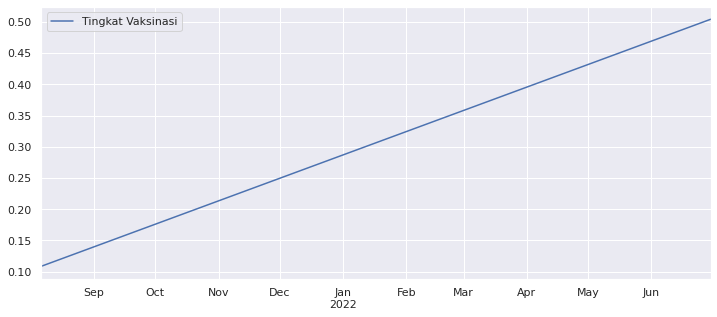

In [ ]:
pred_jatim.plot(figsize=(12,5),legend=True)

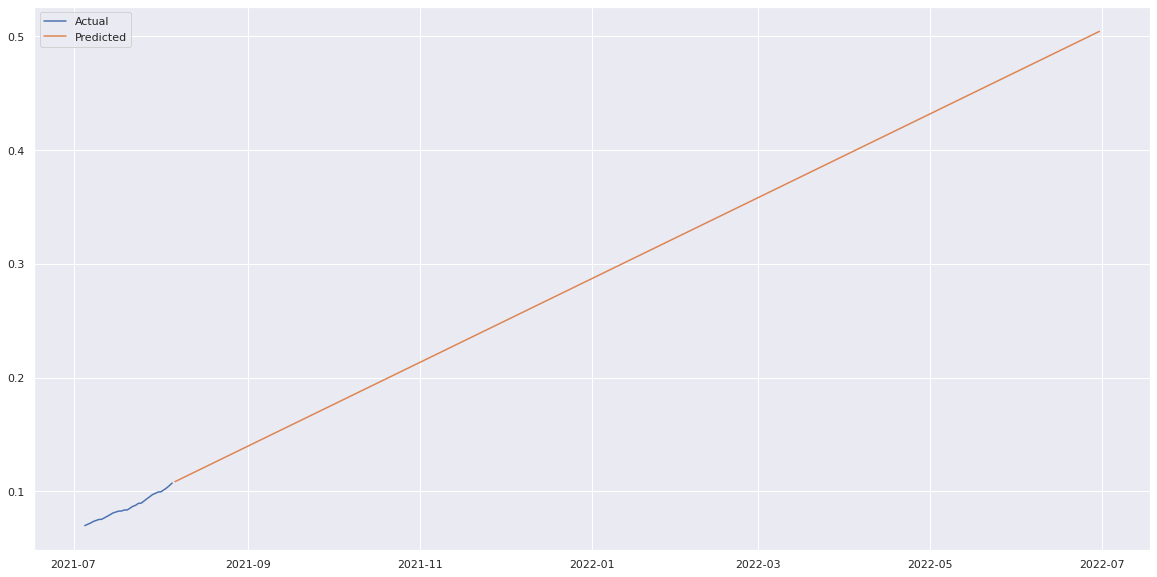

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jatim['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_jatim,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Jawa Tengah**

In [ ]:
jateng = data2[data2['Provinsi']=='Jawa tengah']

In [ ]:
jateng.tail()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                            
2021-08-01  Jawa tengah             0.0985        2
2021-08-02  Jawa tengah             0.1003        2
2021-08-03  Jawa tengah             0.1020        2
2021-08-04  Jawa tengah             0.1039        2
2021-08-05  Jawa tengah             0.1058        2

In [ ]:
jateng[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0985
2021-08-02             0.1003
2021-08-03             0.1020
2021-08-04             0.1039
2021-08-05             0.1058

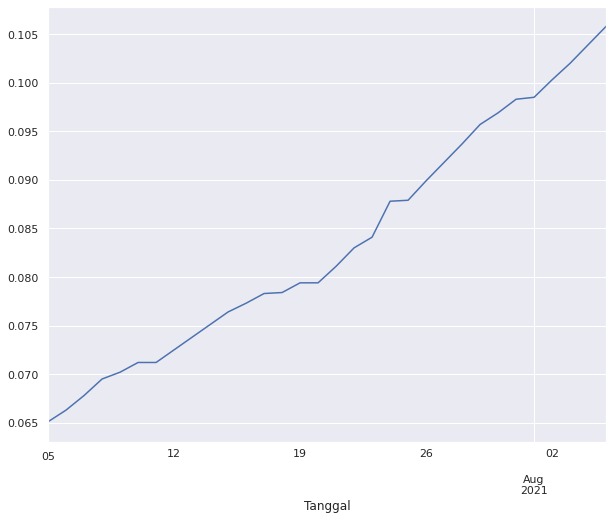

In [ ]:
jateng['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(jateng['Tingkat Vaksinasi'])

1. ADF :  1.5090395229896145
2. P-Value :  0.9975573213444583
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_jateng = auto_arima(jateng['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_jateng.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-349.419, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-353.794, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-352.083, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-351.455, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-312.587, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.543 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 178.897
Date:                Mon, 23 Aug 2021   AIC                           -353.794
Time:                        02:13:22   BIC                           -350.926
Sample:                             0   HQIC                          -352.859
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.000      9.458      0.000       0.001       0.002
sigma2      5.674e-07   1.11e-07      5.121      0.000     3.5e-07    7.85e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 4.04
Prob(Q):                              0.57   Prob(JB):                         0.13
Heteroskedasticity (H):               1.46   Skew:                             0.43
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_jateng=(jateng[['Tingkat Vaksinasi']]).iloc[:25]
test_jateng=(jateng[['Tingkat Vaksinasi']]).iloc[-7:]

In [ ]:
stepwise_model_jateng.fit(train_jateng)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_jateng=stepwise_model_jateng.predict(n_periods=len(test_jateng))

In [ ]:
forecast_jateng = pd.DataFrame(forecast_jateng, index = test_jateng.index, columns=['Prediksi'])

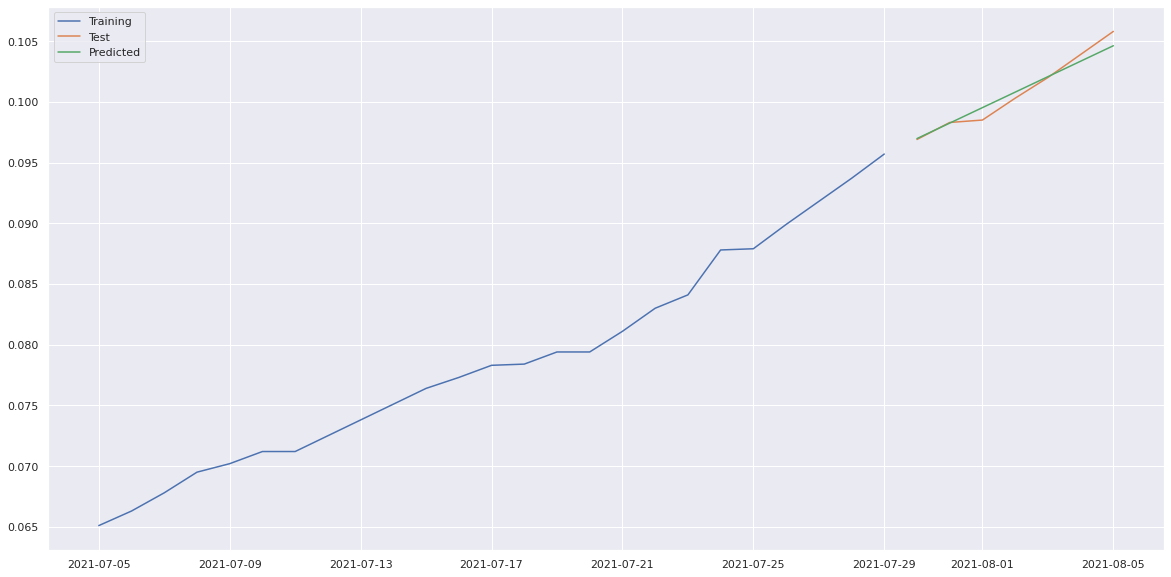

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_jateng,label='Training')
plt.plot(test_jateng,label='Test')
plt.plot(forecast_jateng,label='Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
forecast_jateng

Prediksi
Tanggal             
2021-07-30  0.096974
2021-07-31  0.098249
2021-08-01  0.099523
2021-08-02  0.100797
2021-08-03  0.102072
2021-08-04  0.103346
2021-08-05  0.104620

In [ ]:
rms_jateng=sqrt(mean_squared_error(test_jateng,forecast_jateng))
print(rms_jateng)

0.0006552566480227786


In [ ]:
stepwise_model_jateng.fit(jateng['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_jateng = stepwise_model_jateng.predict(n_periods=len(index_future_dates))
pred_jateng = pd.DataFrame(pred_jateng, columns=['Tingkat Vaksinasi'])
pred_jateng.index = index_future_dates
pred_jateng.tail()

Tingkat Vaksinasi
2022-06-26           0.532334
2022-06-27           0.533646
2022-06-28           0.534959
2022-06-29           0.536271
2022-06-30           0.537584

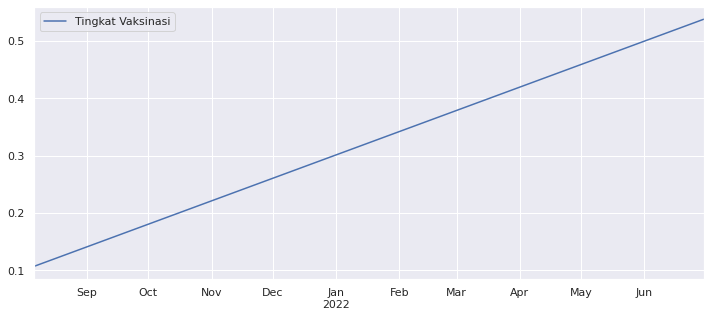

In [ ]:
pred_jateng.plot(figsize=(12,5),legend=True)

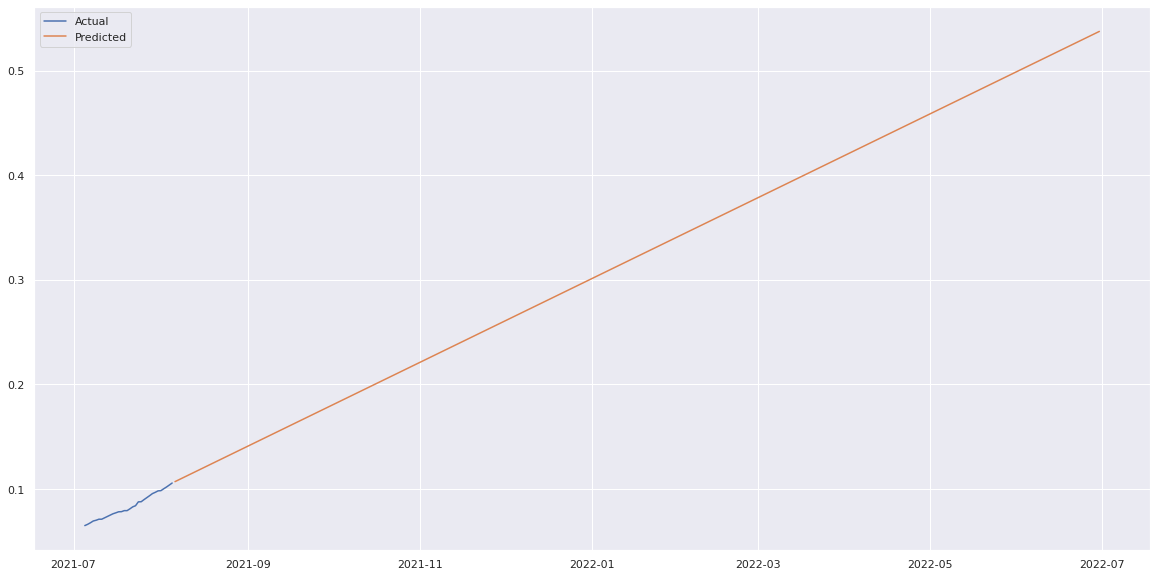

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jateng['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_jateng,label="Predicted")
plt.legend(loc = 'best')
plt.show()

#**Forecasting Kalimantan Barat**

In [ ]:
kalbar = data2[data2['Provinsi']=='Kalimantan Barat']

In [ ]:
kalbar.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                 
2021-07-05  Kalimantan Barat             0.0399        1
2021-07-06  Kalimantan Barat             0.0404        1
2021-07-07  Kalimantan Barat             0.0409        1
2021-07-08  Kalimantan Barat             0.0415        1
2021-07-09  Kalimantan Barat             0.0420        1

In [ ]:
kalbar[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0679
2021-08-02             0.0697
2021-08-03             0.0716
2021-08-04             0.0741
2021-08-05             0.0770

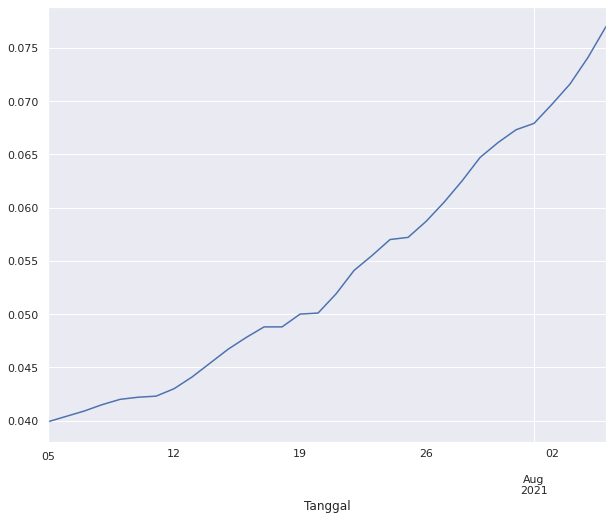

In [ ]:
kalbar['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(kalbar['Tingkat Vaksinasi'])

1. ADF :  5.1433635303724206
2. P-Value :  1.0
3. Num of Lags :  4
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  27
5. Critical Values : 
	 1% : -3.6996079738860943
	 5% : -2.9764303469999494
	 10% : -2.627601001371742


In [ ]:
stepwise_model_kalbar = auto_arima(kalbar['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                   max_p=3, max_q=3, # maximum p and q
                                   m=1, # frequency of series
                                   d=None, # let model determine 'd'
                                   seasonal=False, # No Seasonality
                                   start_P=0,
                                   D=0,
                                   trace=True,
                                   error_action='ignore',
                                   suppress_warnings=True,
                                   stepwise=True)
stepwise_model_kalbar.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-360.591, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-354.157, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-362.342, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-358.243, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-316.904, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-361.127, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-353.885, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-357.780, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.977 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 184.171
Date:                Mon, 23 Aug 2021   AIC                           -362.342
Time:                        02:13:26   BIC                           -358.040
Sample:                             0   HQIC                          -360.939
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.000      2.496      0.013       0.000       0.001
ar.L1          0.5859      0.156      3.750      0.000       0.280       0.892
sigma2      3.941e-07    1.3e-07      3.021      0.003    1.38e-07     6.5e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.60   Prob(JB):                         0.68
Heteroskedasticity (H):               2.90   Skew:                            -0.06
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_kalbar = (kalbar[['Tingkat Vaksinasi']])[:25]
test_kalbar = (kalbar[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_kalbar.fit(train_kalbar)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_kalbar = stepwise_model_kalbar.predict(n_periods = len(test_kalbar))

In [ ]:
forecast_kalbar = pd.DataFrame(forecast_kalbar, index = test_kalbar.index, columns=['Prediksi'])

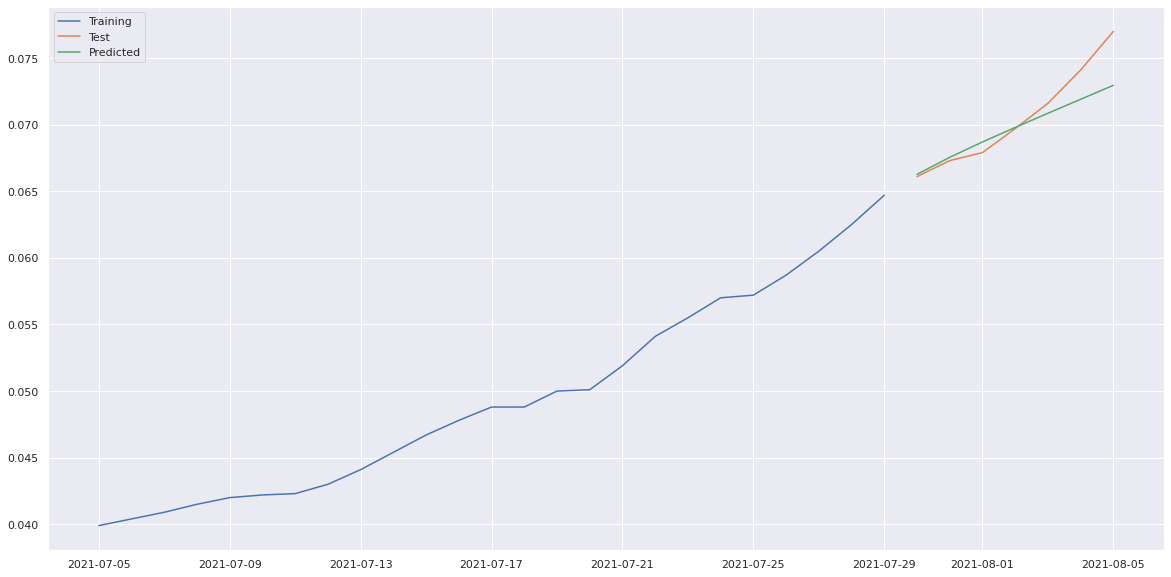

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_kalbar,label="Training")
plt.plot(test_kalbar,label="Test")
plt.plot(forecast_kalbar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_kalbar = sqrt(mean_squared_error(test_kalbar, forecast_kalbar))
print(rms_kalbar)

0.0017926723612458227


In [ ]:
stepwise_model_kalbar.fit(kalbar['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_kalbar = stepwise_model_kalbar.predict(n_periods=len(index_future_dates))
pred_kalbar = pd.DataFrame(pred_kalbar, columns=['Tingkat Vaksinasi'])
pred_kalbar.index = index_future_dates
pred_kalbar.tail()

Tingkat Vaksinasi
2022-06-26           0.477885
2022-06-27           0.479111
2022-06-28           0.480337
2022-06-29           0.481563
2022-06-30           0.482790

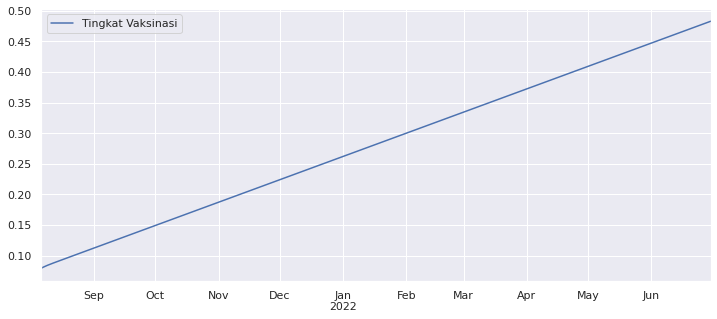

In [ ]:
pred_kalbar.plot(figsize=(12,5),legend=True)

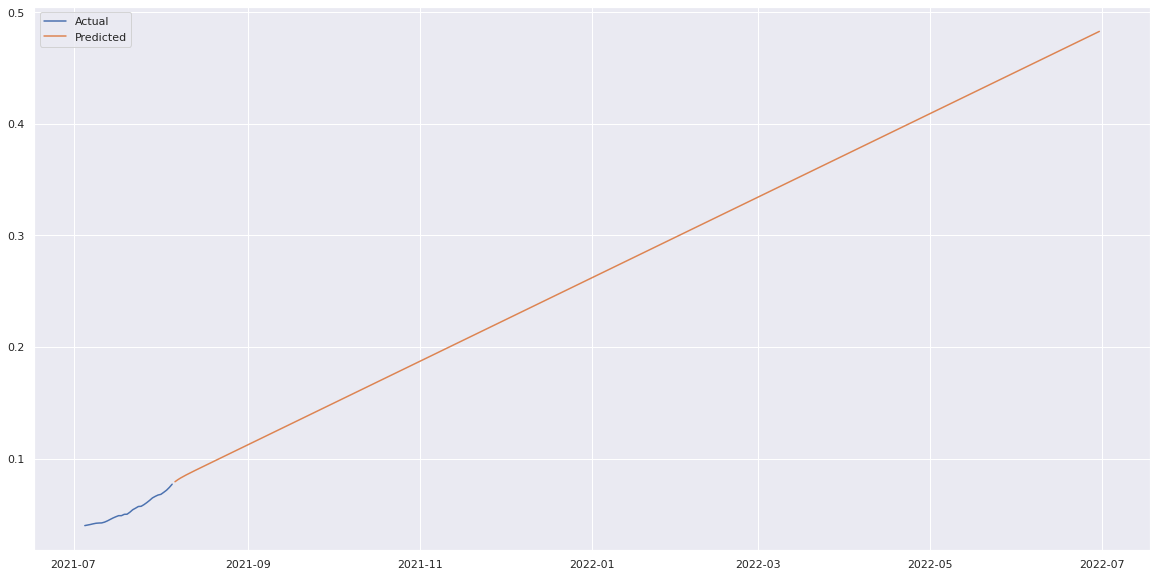

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kalbar['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_kalbar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

#Forecasting Tingkat Vaksinasi Indonesia

In [ ]:
!wget -P data/ https://raw.githubusercontent.com/malinaafemi/datathon2021/main/Tingkat%20Vaksinasi%20Indonesia%20Juli-Agustus%202021.csv

--2021-08-23 02:13:28--  https://raw.githubusercontent.com/malinaafemi/datathon2021/main/Tingkat%20Vaksinasi%20Indonesia%20Juli-Agustus%202021.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 932 [text/plain]
Saving to: ‘data/Tingkat Vaksinasi Indonesia Juli-Agustus 2021.csv’

Tingkat Vaksinasi I 100%[===================>]     932  --.-KB/s    in 0s      

2021-08-23 02:13:29 (30.0 MB/s) - ‘data/Tingkat Vaksinasi Indonesia Juli-Agustus 2021.csv’ saved [932/932]



In [ ]:
indo = pd.read_csv("/content/data/Tingkat Vaksinasi Indonesia Juli-Agustus 2021.csv")

In [ ]:
indo.head()

Tanggal     Negara Tingkat Vaksinasi
0  07/05/2021  Indonesia             6.83%
1  07/06/2021  Indonesia             6.92%
2  07/07/2021  Indonesia             7.03%
3  07/08/2021  Indonesia             7.14%
4  07/09/2021  Indonesia             7.20%

In [ ]:
indo.tail()

Tanggal     Negara Tingkat Vaksinasi
27  08/01/2021  Indonesia             9.96%
28  08/02/2021  Indonesia            10.17%
29  08/03/2021  Indonesia            10.42%
30  08/04/2021  Indonesia            10.69%
31  08/05/2021  Indonesia            10.69%

In [ ]:
indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tanggal            32 non-null     object
 1   Negara             32 non-null     object
 2   Tingkat Vaksinasi  32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [ ]:
indo['Tanggal'] = indo['Tanggal'].astype('datetime64')
indo.dtypes

Tanggal              datetime64[ns]
Negara                       object
Tingkat Vaksinasi            object
dtype: object

In [ ]:
indo['Tingkat Vaksinasi'] = indo['Tingkat Vaksinasi'].str.rstrip('%').astype('float') / 100.0

In [ ]:
indo.head()

Tanggal     Negara  Tingkat Vaksinasi
0 2021-07-05  Indonesia             0.0683
1 2021-07-06  Indonesia             0.0692
2 2021-07-07  Indonesia             0.0703
3 2021-07-08  Indonesia             0.0714
4 2021-07-09  Indonesia             0.0720

In [ ]:
fig = px.line(indo, x='Tanggal', y="Tingkat Vaksinasi", title = 'Tingkat Vaksinasi di Indonesia Juli-Agustus', width=900, height=600)
fig.show()

In [ ]:
indo = pd.read_csv("/content/data/Tingkat Vaksinasi Indonesia Juli-Agustus 2021.csv", index_col='Tanggal', parse_dates=True)

In [ ]:
indo.head()

Negara Tingkat Vaksinasi
Tanggal                                
2021-07-05  Indonesia             6.83%
2021-07-06  Indonesia             6.92%
2021-07-07  Indonesia             7.03%
2021-07-08  Indonesia             7.14%
2021-07-09  Indonesia             7.20%

In [ ]:
indo[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                     
2021-07-05             6.83%
2021-07-06             6.92%
2021-07-07             7.03%
2021-07-08             7.14%
2021-07-09             7.20%

In [ ]:
indo['Tingkat Vaksinasi'] = indo['Tingkat Vaksinasi'].str.rstrip('%').astype('float') / 100.0

In [ ]:
ad_test(indo['Tingkat Vaksinasi'])

1. ADF :  2.5140656080264665
2. P-Value :  0.9990542461733949
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_indo = auto_arima(indo['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_indo.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-331.279, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-325.912, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-331.086, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-334.699, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-327.887, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-333.292, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-331.634, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-336.495, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-333.180, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-334.722, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-333.085, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-332.998, Time=0.10 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.361 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 170.248
Date:                Mon, 23 Aug 2021   AIC                           -336.495
Time:                        02:13:31   BIC                           -333.693
Sample:                             0   HQIC                          -335.599
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6610      0.145     -4.559      0.000      -0.945      -0.377
sigma2      6.681e-07   1.78e-07      3.755      0.000    3.19e-07    1.02e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.58   Prob(JB):                         0.34
Heteroskedasticity (H):               6.95   Skew:                            -0.63
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_indo = (indo[['Tingkat Vaksinasi']])[:25]
test_indo = (indo[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_indo.fit(train_indo)

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_indo = stepwise_model_indo.predict(n_periods = len(test_indo))

In [ ]:
forecast_indo = pd.DataFrame(forecast_indo, index = test_indo.index, columns=['Prediksi'])

In [ ]:
forecast_indo

Prediksi
Tanggal             
2021-07-30  0.097901
2021-07-31  0.099903
2021-08-01  0.101904
2021-08-02  0.103905
2021-08-03  0.105907
2021-08-04  0.107908
2021-08-05  0.109909

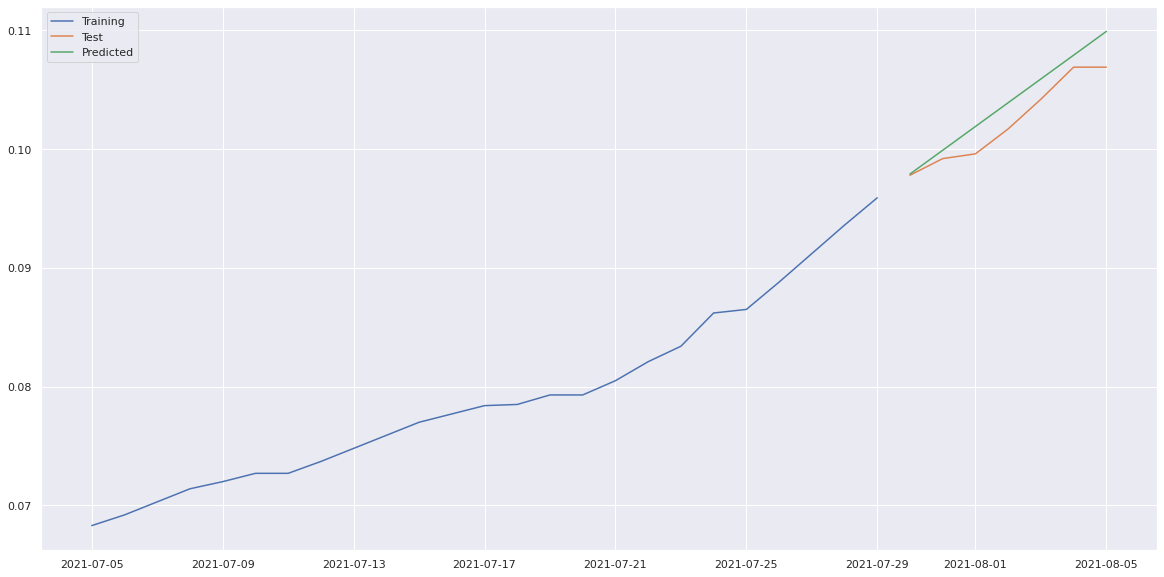

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_indo,label="Training")
plt.plot(test_indo,label="Test")
plt.plot(forecast_indo,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_indo = sqrt(mean_squared_error(test_indo, forecast_indo))
print(rms_indo)

0.0018384276219889652


## Prediksi ke depan

In [ ]:
stepwise_model_indo.fit(indo['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-05-31')
pred_indo = stepwise_model_indo.predict(n_periods=299)
pred_indo = pd.DataFrame(pred_indo, columns=['Tingkat Vaksinasi'])
pred_indo.index = index_future_dates
pred_indo.tail()

Tingkat Vaksinasi
2022-05-27           0.530842
2022-05-28           0.532279
2022-05-29           0.533716
2022-05-30           0.535153
2022-05-31           0.536590

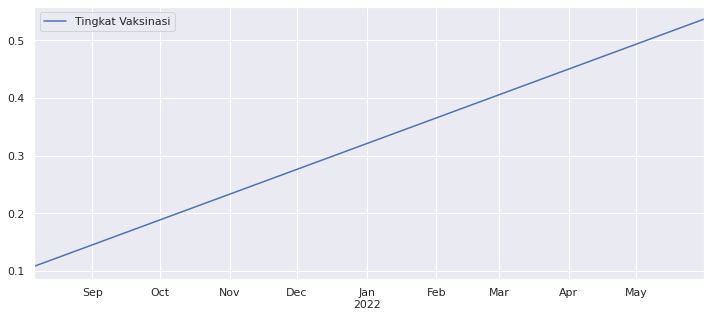

In [ ]:
pred_indo.plot(figsize=(12,5),legend=True)

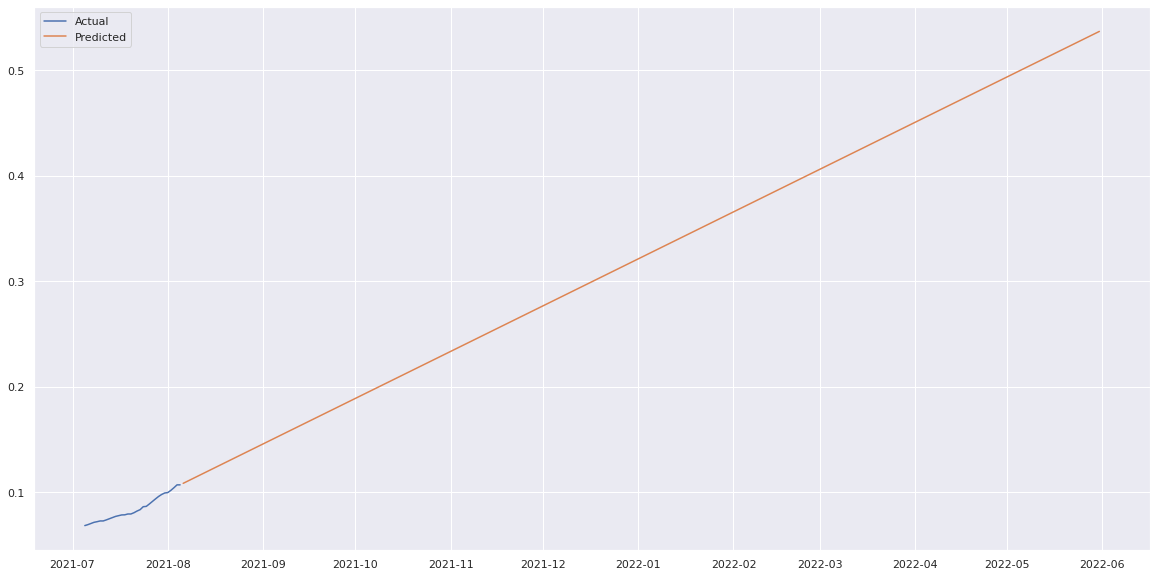

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(indo['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_indo,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Kalimantan Selatan

In [ ]:
kalsel = data2[data2['Provinsi']=='Kalimantan Selatan']

In [ ]:
kalsel.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                   
2021-07-05  Kalimantan Selatan             0.0609        1
2021-07-06  Kalimantan Selatan             0.0614        1
2021-07-07  Kalimantan Selatan             0.0622        1
2021-07-08  Kalimantan Selatan             0.0625        1
2021-07-09  Kalimantan Selatan             0.0626        1

In [ ]:
kalsel[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0609
2021-07-06             0.0614
2021-07-07             0.0622
2021-07-08             0.0625
2021-07-09             0.0626

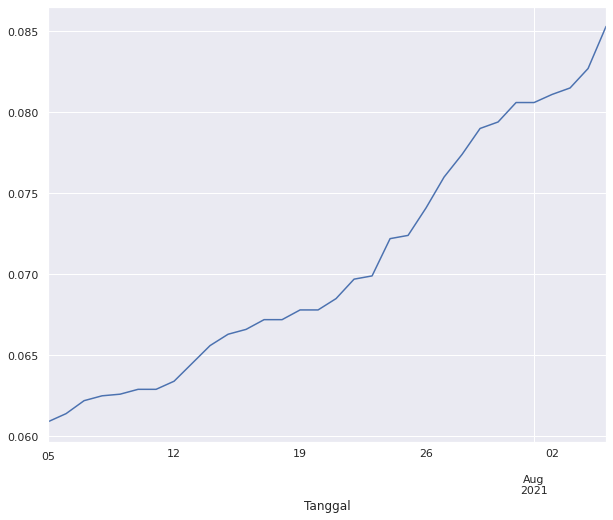

In [ ]:
kalsel['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(kalsel['Tingkat Vaksinasi'])

1. ADF :  2.941217497209022
2. P-Value :  1.0
3. Num of Lags :  10
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  21
5. Critical Values : 
	 1% : -3.7883858816542486
	 5% : -3.013097747543462
	 10% : -2.6463967573696143


In [ ]:
stepwise_model_kalsel = auto_arima(kalsel['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_kalsel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-356.866, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-360.130, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-358.633, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-358.120, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-335.828, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.458 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 182.065
Date:                Mon, 23 Aug 2021   AIC                           -360.130
Time:                        02:13:35   BIC                           -357.262
Sample:                             0   HQIC                          -359.196
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      4.898      0.000       0.000       0.001
sigma2      4.637e-07   1.48e-07      3.127      0.002    1.73e-07    7.54e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 4.78
Prob(Q):                              0.51   Prob(JB):                         0.09
Heteroskedasticity (H):               3.57   Skew:                             0.96
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_kalsel = (kalsel[['Tingkat Vaksinasi']])[:25]
test_kalsel = (kalsel[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_kalsel = stepwise_model_kalsel.fit(train_kalsel)

In [ ]:
forecast_kalsel = stepwise_model_kalsel.predict(n_periods = len(test_kalsel))

In [ ]:
forecast_kalsel = pd.DataFrame(forecast_kalsel, index = test_kalsel.index, columns=['Prediksi'])

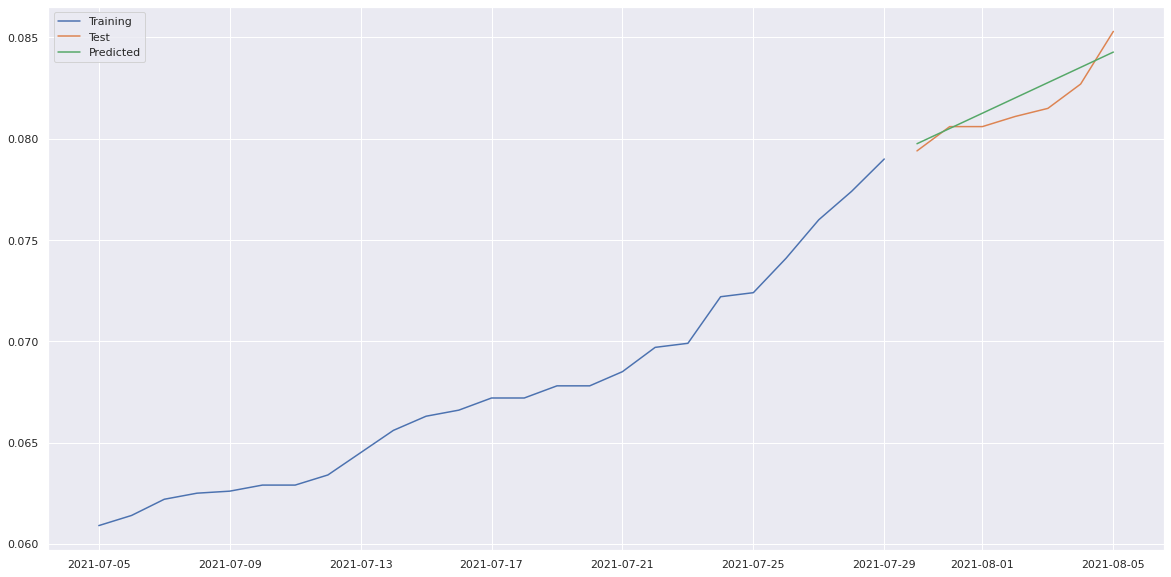

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_kalsel,label="Training")
plt.plot(test_kalsel,label="Test")
plt.plot(forecast_kalsel,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_kalsel = sqrt(mean_squared_error(test_kalsel, forecast_kalsel))
print(rms_kalsel)

0.0008238207059521838


In [ ]:
stepwise_model_kalsel.fit(kalsel['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_kalsel = stepwise_model_kalsel.predict(n_periods=len(index_future_dates))
pred_kalsel = pd.DataFrame(pred_kalsel, columns=['Tingkat Vaksinasi'])
pred_kalsel.index = index_future_dates
pred_kalsel.tail()

Tingkat Vaksinasi
2022-06-26           0.341106
2022-06-27           0.341894
2022-06-28           0.342681
2022-06-29           0.343468
2022-06-30           0.344255

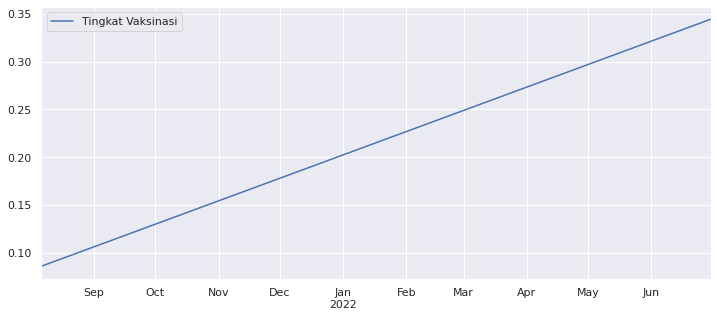

In [ ]:
pred_kalsel.plot(figsize=(12,5),legend=True)

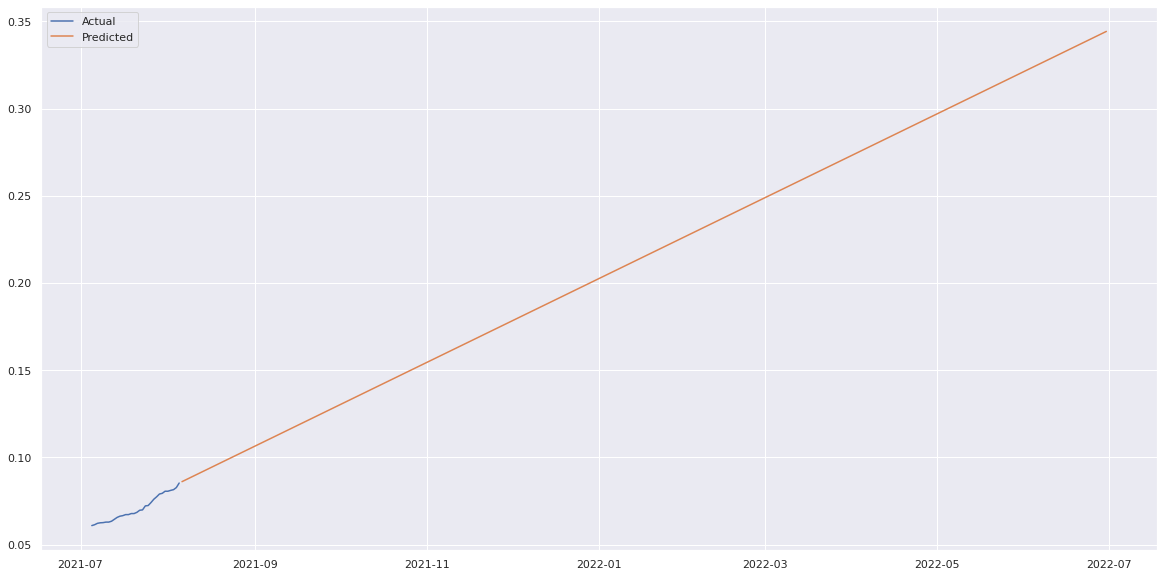

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kalsel['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_kalsel,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Kalimantan Timur

In [ ]:
kaltim = data2[data2['Provinsi']=='Kalimantan Timur']

In [ ]:
kaltim.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                 
2021-07-05  Kalimantan Timur             0.0810        1
2021-07-06  Kalimantan Timur             0.0818        1
2021-07-07  Kalimantan Timur             0.0831        1
2021-07-08  Kalimantan Timur             0.0838        1
2021-07-09  Kalimantan Timur             0.0844        1

In [ ]:
kaltim[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0810
2021-07-06             0.0818
2021-07-07             0.0831
2021-07-08             0.0838
2021-07-09             0.0844

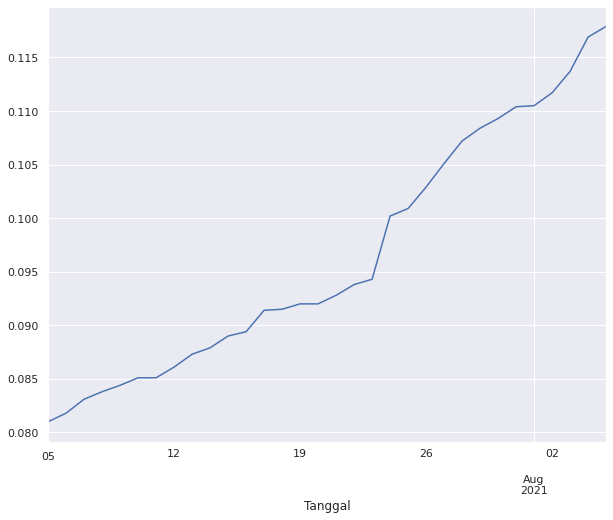

In [ ]:
kaltim['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(kaltim['Tingkat Vaksinasi'])

1. ADF :  1.4092944242116923
2. P-Value :  0.9971559586426176
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_kaltim = auto_arima(kaltim['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_kaltim.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-310.043, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-296.366, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-307.620, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-313.710, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-298.366, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-309.326, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-308.659, Time=0.34 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-314.840, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-311.814, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-311.049, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-309.583, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-310.287, Time=0.13 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.571 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 159.420
Date:                Mon, 23 Aug 2021   AIC                           -314.840
Time:                        02:13:39   BIC                           -312.038
Sample:                             0   HQIC                          -313.944
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8490      0.213     -3.978      0.000      -1.267      -0.431
sigma2      1.349e-06   1.47e-07      9.170      0.000    1.06e-06    1.64e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):               153.15
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               4.78   Skew:                             2.76
Prob(H) (two-sided):                  0.02   Kurtosis:                        12.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_kaltim = (kaltim[['Tingkat Vaksinasi']])[:25]
test_kaltim = (kaltim[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_kaltim = stepwise_model_kaltim.fit(train_kaltim)

In [ ]:
forecast_kaltim = stepwise_model_kaltim.predict(n_periods = len(test_kaltim))

In [ ]:
forecast_kaltim = pd.DataFrame(forecast_kaltim, index = test_kaltim.index, columns=['Prediksi'])

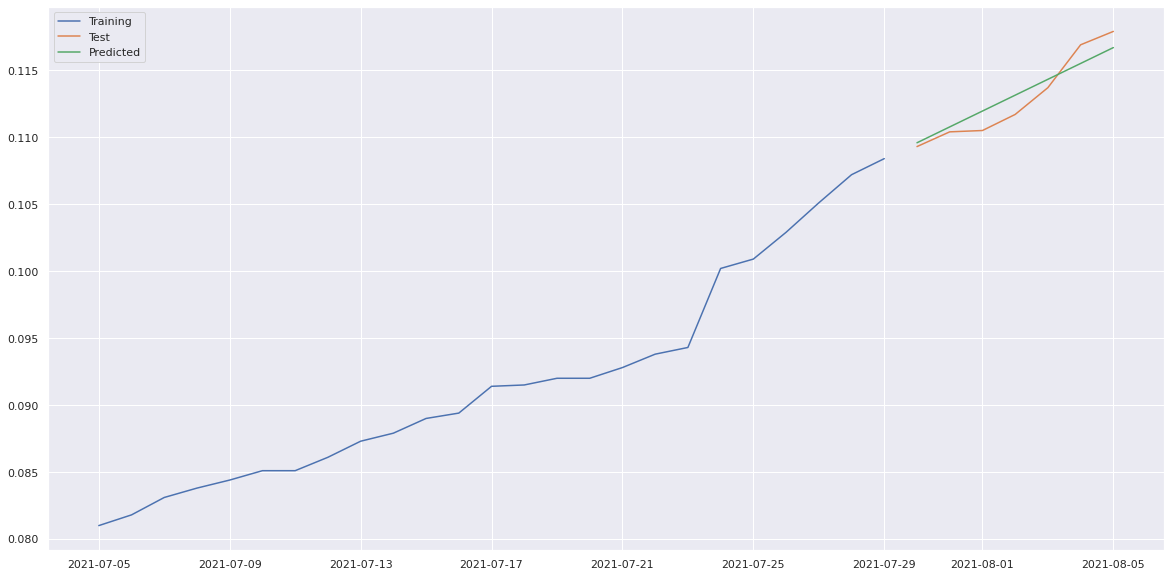

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_kaltim,label="Training")
plt.plot(test_kaltim,label="Test")
plt.plot(forecast_kaltim,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_kaltim = sqrt(mean_squared_error(test_kaltim, forecast_kaltim))
print(rms_kaltim)

0.0010813810351570788


In [ ]:
stepwise_model_kaltim.fit(kaltim['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_kaltim = stepwise_model_kaltim.predict(n_periods=len(index_future_dates))
pred_kaltim = pd.DataFrame(pred_kaltim, columns=['Tingkat Vaksinasi'])
pred_kaltim.index = index_future_dates
pred_kaltim.tail()

Tingkat Vaksinasi
2022-06-26           0.613571
2022-06-27           0.615096
2022-06-28           0.616621
2022-06-29           0.618146
2022-06-30           0.619672

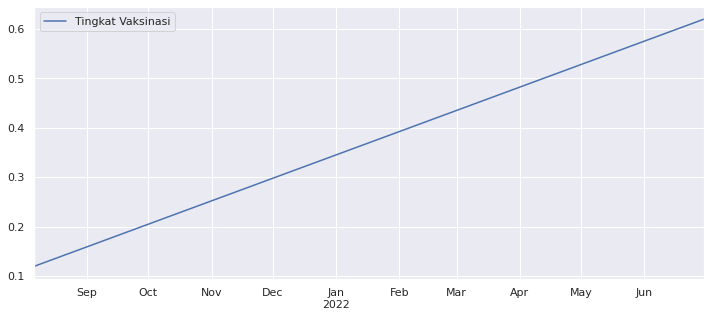

In [ ]:
pred_kaltim.plot(figsize=(12,5),legend=True)

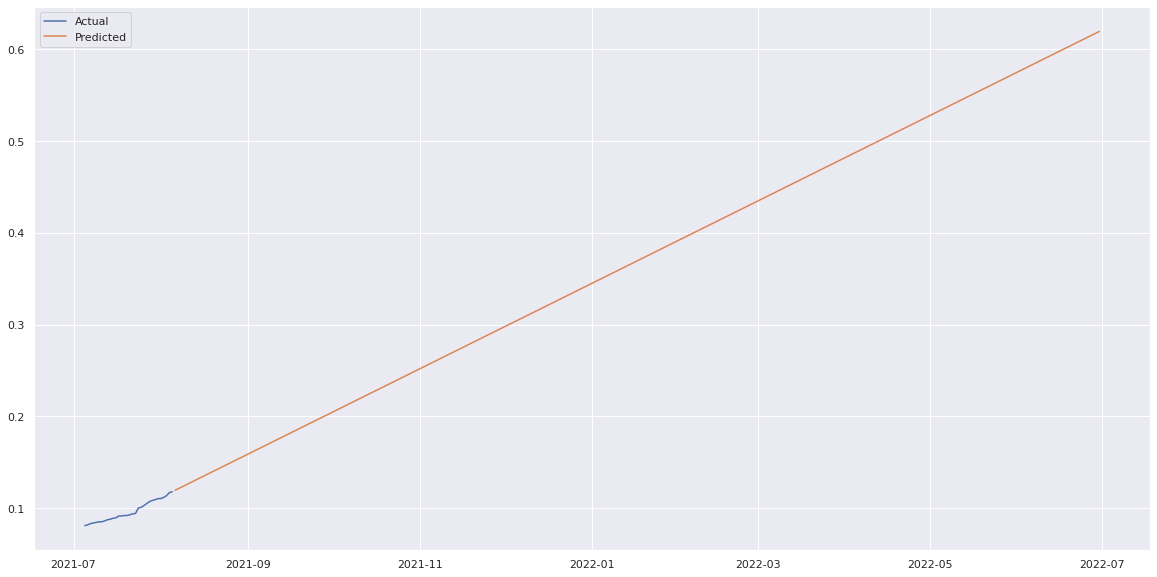

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kaltim['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_kaltim,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Jambi**

In [ ]:
jambi = data2[data2['Provinsi']=='Jambi']

In [ ]:
jambi.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05    Jambi             0.0530        1
2021-07-06    Jambi             0.0550        1
2021-07-07    Jambi             0.0571        1
2021-07-08    Jambi             0.0588        1
2021-07-09    Jambi             0.0596        1

In [ ]:
jambi[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0530
2021-07-06             0.0550
2021-07-07             0.0571
2021-07-08             0.0588
2021-07-09             0.0596

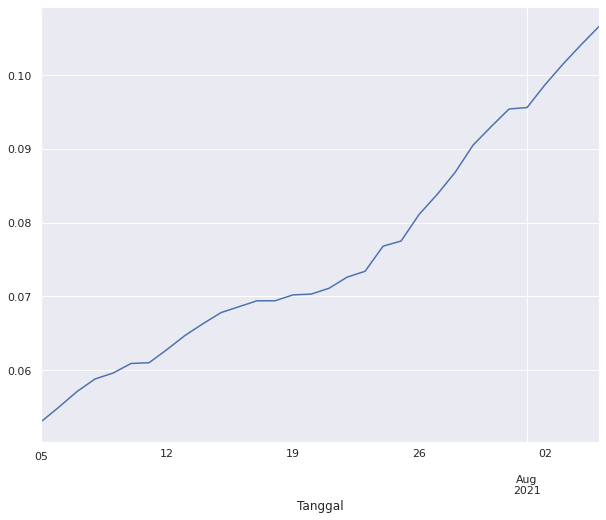

In [ ]:
jambi['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(jambi['Tingkat Vaksinasi'])

1. ADF :  1.72573318598187
2. P-Value :  0.9981897640906147
3. Num of Lags :  8
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  23
5. Critical Values : 
	 1% : -3.7529275211638033
	 5% : -2.998499866852963
	 10% : -2.6389669754253307


In [ ]:
stepwise_model_jambi = auto_arima(jambi['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=False, # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
stepwise_model_jambi.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-323.258, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-311.178, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-325.090, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-322.697, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-313.173, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-323.313, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-322.618, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-327.065, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-325.281, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-325.232, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-324.371, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-324.610, Time=0.21 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.364 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 165.532
Date:                Mon, 23 Aug 2021   AIC                           -327.065
Time:                        02:13:44   BIC                           -324.262
Sample:                             0   HQIC                          -326.168
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6495      0.112     -5.797      0.000      -0.869      -0.430
sigma2      9.222e-07   2.51e-07      3.668      0.000    4.29e-07    1.42e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.74   Prob(JB):                         0.89
Heteroskedasticity (H):               2.51   Skew:                             0.17
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_jambi = (jambi[['Tingkat Vaksinasi']])[:25]
test_jambi = (jambi[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_jambi.fit(train_jambi)

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_jambi = stepwise_model_jambi.predict(n_periods = len(test_jambi))

In [ ]:
forecast_jambi = pd.DataFrame(forecast_jambi, index = test_jambi.index, columns=['Prediksi'])

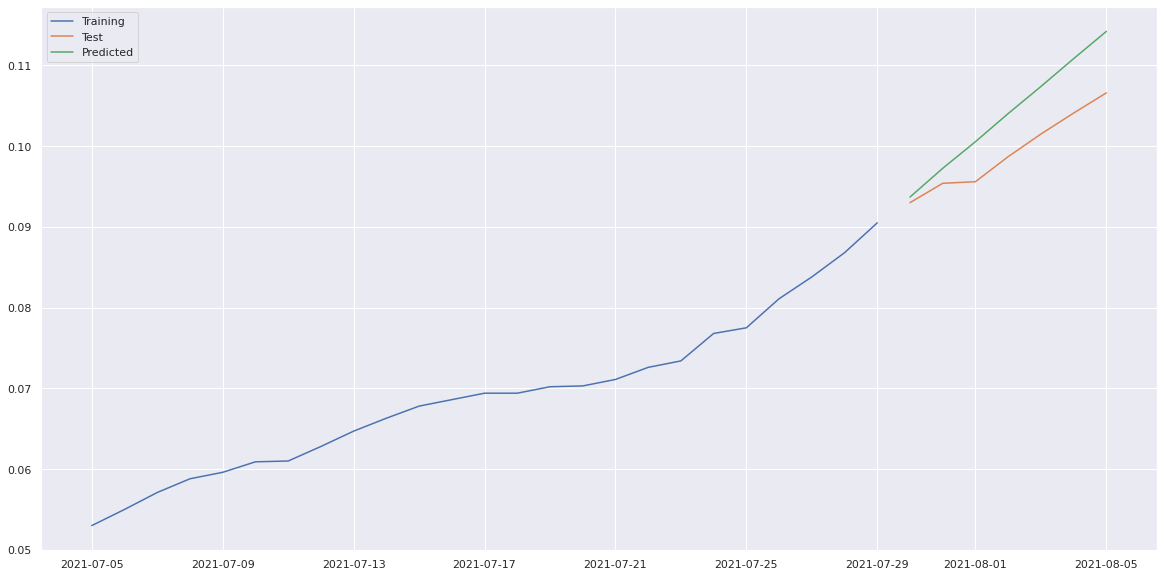

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_jambi,label="Training")
plt.plot(test_jambi,label="Test")
plt.plot(forecast_jambi,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_jambi = sqrt(mean_squared_error(test_jambi, forecast_jambi))
print(rms_jambi)

0.005278638418396335


In [ ]:
stepwise_model_jambi.fit(jambi['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_jambi = stepwise_model_jambi.predict(n_periods=len(index_future_dates))
pred_jambi = pd.DataFrame(pred_jambi, columns=['Tingkat Vaksinasi'])
pred_jambi.index = index_future_dates
pred_jambi.tail()

Tingkat Vaksinasi
2022-06-26           0.931914
2022-06-27           0.934453
2022-06-28           0.936992
2022-06-29           0.939532
2022-06-30           0.942071

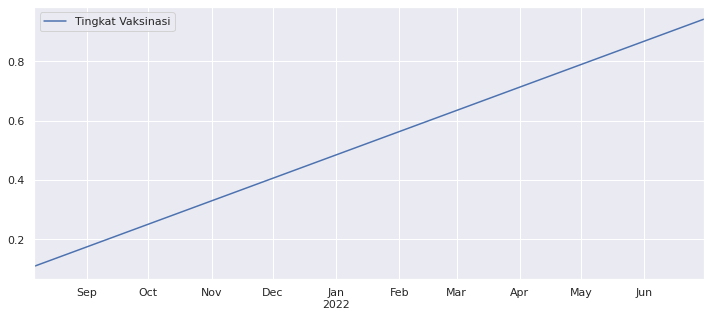

In [ ]:
pred_jambi.plot(figsize=(12,5),legend=True)

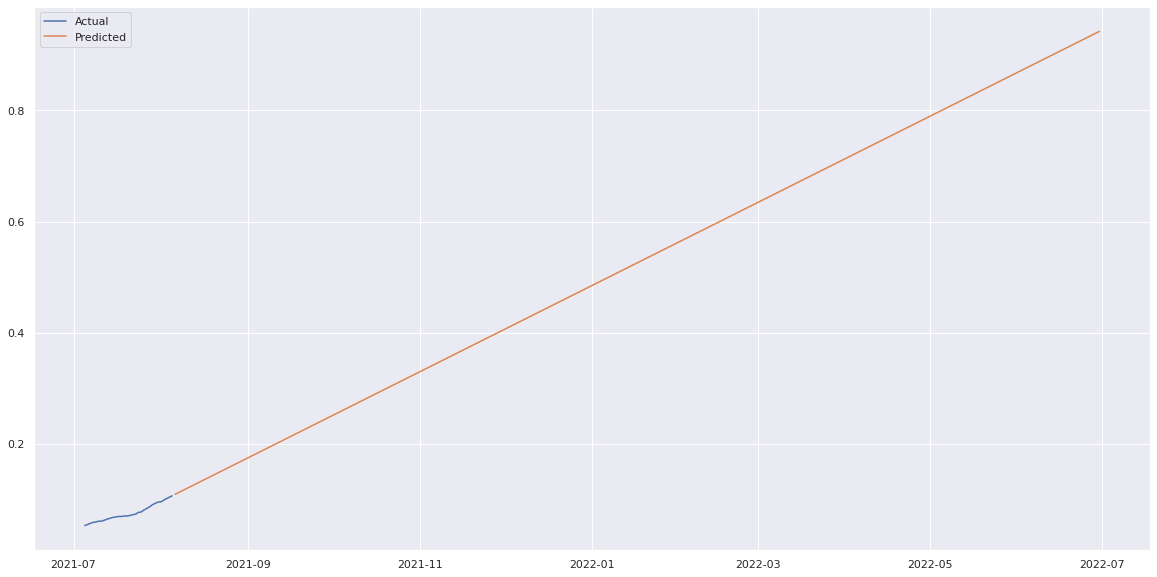

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jambi['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_jambi,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Gorontalo**

In [ ]:
gorontalo = data2[data2['Provinsi']=='Gorontalo']

In [ ]:
gorontalo.tail()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                          
2021-08-01  Gorontalo             0.1044        0
2021-08-02  Gorontalo             0.1065        0
2021-08-03  Gorontalo             0.1085        0
2021-08-04  Gorontalo             0.1105        0
2021-08-05  Gorontalo             0.1119        0

In [ ]:
gorontalo[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.1044
2021-08-02             0.1065
2021-08-03             0.1085
2021-08-04             0.1105
2021-08-05             0.1119

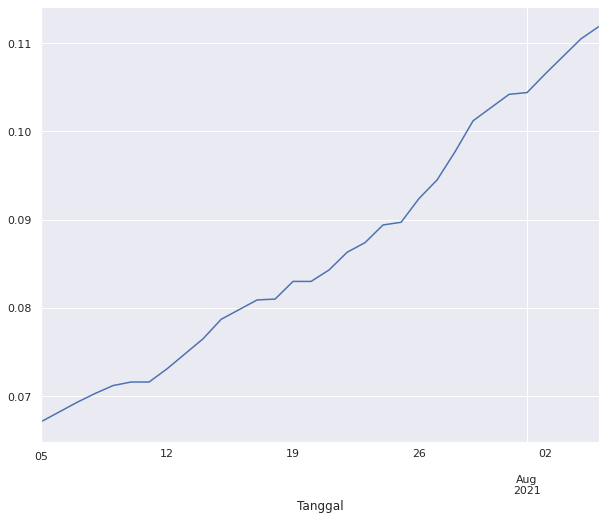

In [ ]:
gorontalo['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(gorontalo['Tingkat Vaksinasi'])

1. ADF :  1.6431592530758048
2. P-Value :  0.9979814508648077
3. Num of Lags :  9
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  22
5. Critical Values : 
	 1% : -3.769732625845229
	 5% : -3.005425537190083
	 10% : -2.6425009917355373


In [ ]:
stepwise_model_gorontalo = auto_arima(gorontalo['Tingkat Vaksinasi'],start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_gorontalo.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-342.857, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-345.510, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-344.787, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-344.329, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-306.040, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.636 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 174.755
Date:                Mon, 23 Aug 2021   AIC                           -345.510
Time:                        02:13:47   BIC                           -342.642
Sample:                             0   HQIC                          -344.576
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.000      9.206      0.000       0.001       0.002
sigma2      7.431e-07      2e-07      3.716      0.000    3.51e-07    1.14e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.41   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.23   Prob(JB):                         0.86
Heteroskedasticity (H):               2.24   Skew:                             0.22
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_gorontalo = (gorontalo[['Tingkat Vaksinasi']])[:25]
test_gorontalo = (gorontalo[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_gorontalo.fit(train_gorontalo)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_gorontalo = stepwise_model_gorontalo.predict(n_periods = len(test_gorontalo))

In [ ]:
forecast_gorontalo = pd.DataFrame(forecast_gorontalo, index = test_gorontalo.index, columns=['Prediksi'])

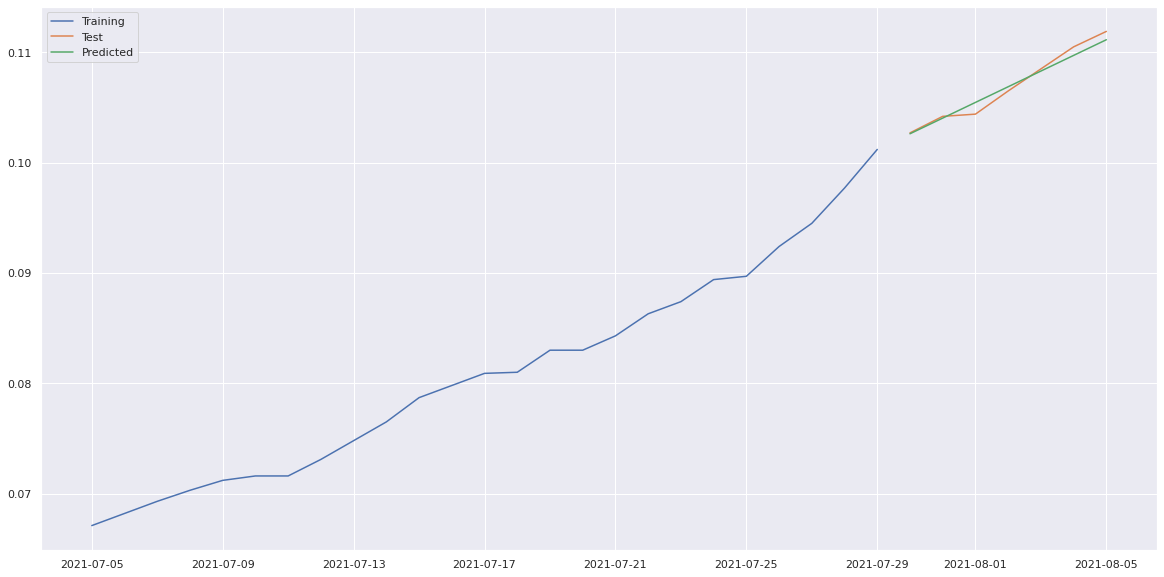

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_gorontalo,label="Training")
plt.plot(test_gorontalo,label="Test")
plt.plot(forecast_gorontalo,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_gorontalo = sqrt(mean_squared_error(test_gorontalo, forecast_gorontalo))
print(rms_gorontalo)

0.0005993961908877997


In [ ]:
stepwise_model_gorontalo.fit(gorontalo['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_gorontalo = stepwise_model_gorontalo.predict(n_periods=len(index_future_dates))
pred_gorontalo = pd.DataFrame(pred_gorontalo, columns=['Tingkat Vaksinasi'])
pred_gorontalo.index = index_future_dates
pred_gorontalo.tail()

Tingkat Vaksinasi
2022-06-26           0.581577
2022-06-27           0.583023
2022-06-28           0.584468
2022-06-29           0.585913
2022-06-30           0.587358

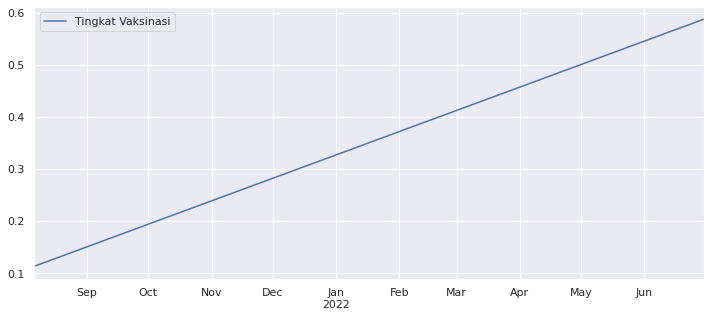

In [ ]:
pred_gorontalo.plot(figsize=(12,5),legend=True)

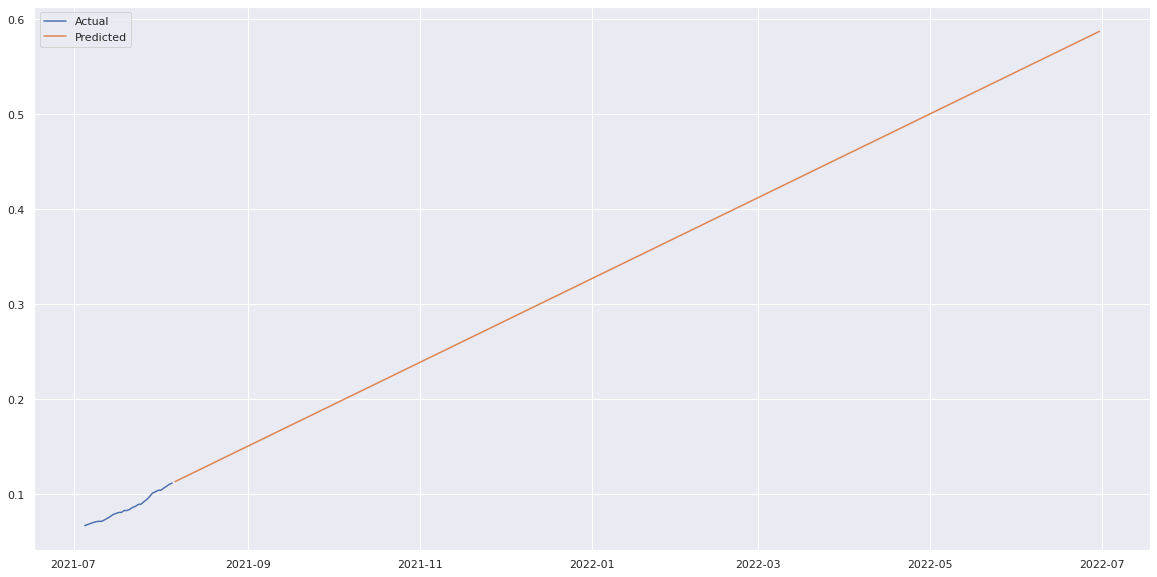

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(gorontalo['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_gorontalo,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Bengkulu**

In [ ]:
bengkulu = data2[data2['Provinsi']=='Bengkulu']

In [ ]:
bengkulu.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                         
2021-07-05  Bengkulu             0.0397        0
2021-07-06  Bengkulu             0.0403        0
2021-07-07  Bengkulu             0.0410        0
2021-07-08  Bengkulu             0.0416        0
2021-07-09  Bengkulu             0.0419        0

In [ ]:
bengkulu[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0721
2021-08-02             0.0734
2021-08-03             0.0753
2021-08-04             0.0780
2021-08-05             0.0813

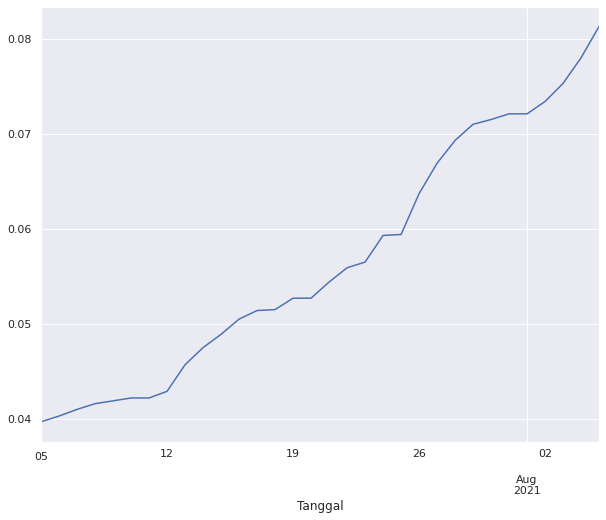

In [ ]:
bengkulu['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(bengkulu['Tingkat Vaksinasi'])

1. ADF :  2.9413837117566617
2. P-Value :  1.0
3. Num of Lags :  10
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  21
5. Critical Values : 
	 1% : -3.7883858816542486
	 5% : -3.013097747543462
	 10% : -2.6463967573696143


In [ ]:
stepwise_model_bengkulu = auto_arima(bengkulu['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_bengkulu.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-328.589, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-329.401, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-330.333, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-329.274, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-303.734, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-329.893, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-326.222, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-323.146, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.897 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 168.167
Date:                Mon, 23 Aug 2021   AIC                           -330.333
Time:                        02:13:51   BIC                           -326.031
Sample:                             0   HQIC                          -328.931
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.000      2.228      0.026       0.000       0.002
ar.L1          0.3220      0.228      1.409      0.159      -0.126       0.770
sigma2      1.123e-06   3.51e-07      3.197      0.001    4.35e-07    1.81e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 7.10
Prob(Q):                              0.68   Prob(JB):                         0.03
Heteroskedasticity (H):               1.26   Skew:                             1.01
Prob(H) (two-sided):                  0.72   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_bengkulu = (bengkulu[['Tingkat Vaksinasi']])[:25]
test_bengkulu = (bengkulu[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_bengkulu.fit(train_bengkulu)

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
forecast_bengkulu = stepwise_model_bengkulu.predict(n_periods = len(test_bengkulu))

In [ ]:
forecast_bengkulu = pd.DataFrame(forecast_bengkulu, index = test_bengkulu.index, columns=['Prediksi'])

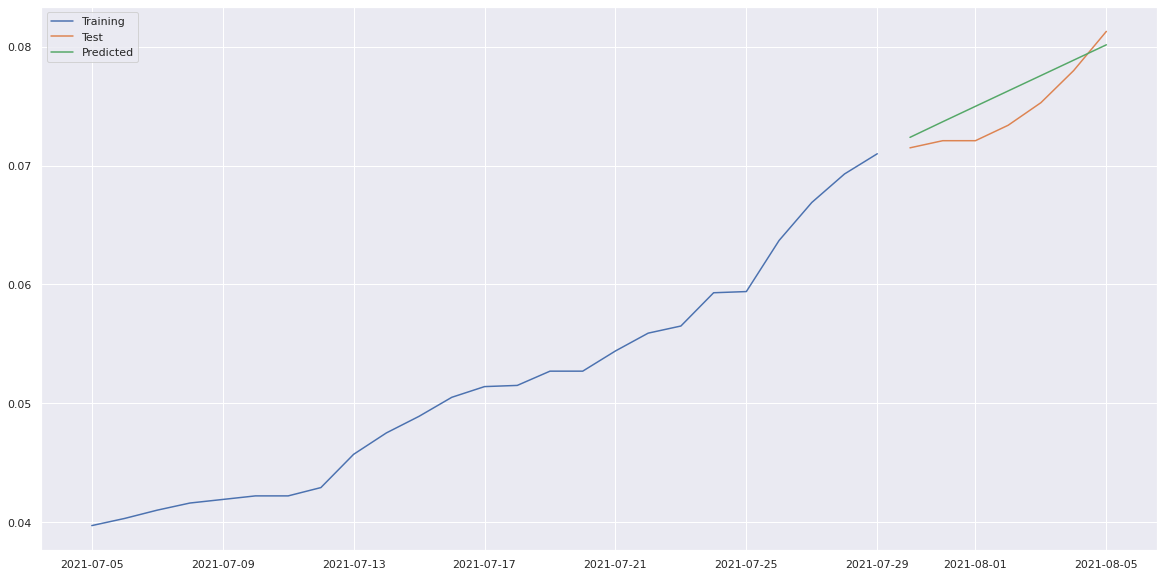

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_bengkulu,label="Training")
plt.plot(test_bengkulu,label="Test")
plt.plot(forecast_bengkulu,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_bengkulu = sqrt(mean_squared_error(test_bengkulu, forecast_bengkulu))
print(rms_bengkulu)

0.0019747745629850057


In [ ]:
stepwise_model_bengkulu.fit(bengkulu['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_bengkulu = stepwise_model_bengkulu.predict(n_periods=len(index_future_dates))
pred_bengkulu = pd.DataFrame(pred_bengkulu, columns=['Tingkat Vaksinasi'])
pred_bengkulu.index = index_future_dates
pred_bengkulu.tail()

Tingkat Vaksinasi
2022-06-26           0.521544
2022-06-27           0.522896
2022-06-28           0.524248
2022-06-29           0.525600
2022-06-30           0.526951

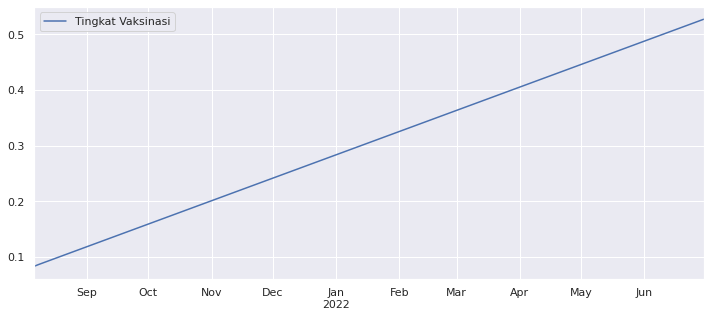

In [ ]:
pred_bengkulu.plot(figsize=(12,5),legend=True)

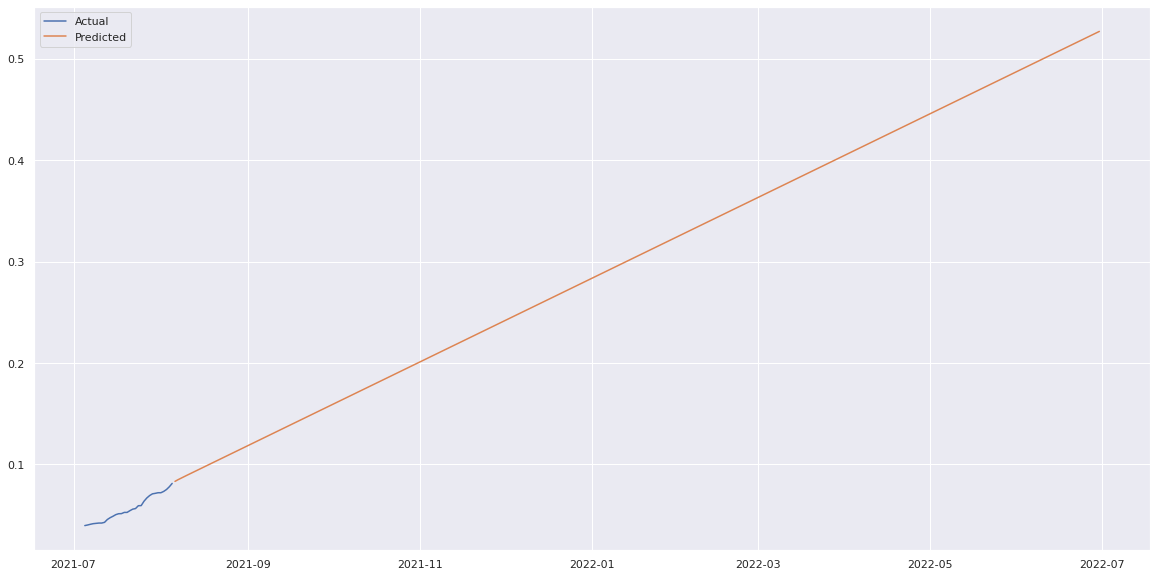

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(bengkulu['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_bengkulu,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# **Forecasting Bangka Belitung**

In [ ]:
batung = data2[data2['Provinsi']=='Bangka Belitung']

In [ ]:
batung.tail()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                
2021-08-01  Bangka Belitung             0.1101        0
2021-08-02  Bangka Belitung             0.1109        0
2021-08-03  Bangka Belitung             0.1139        0
2021-08-04  Bangka Belitung             0.1165        0
2021-08-05  Bangka Belitung             0.1190        0

In [ ]:
batung[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.1101
2021-08-02             0.1109
2021-08-03             0.1139
2021-08-04             0.1165
2021-08-05             0.1190

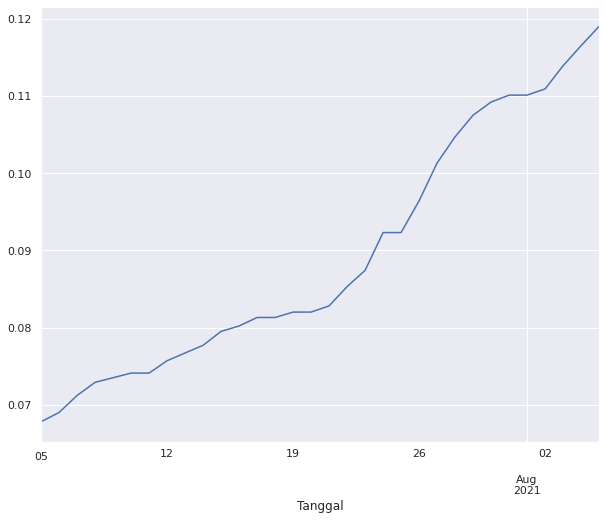

In [ ]:
batung['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(batung['Tingkat Vaksinasi'])

1. ADF :  1.6635960281751316
2. P-Value :  0.9980363640288329
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_batung = auto_arima(batung['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_batung.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-302.062, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-298.327, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-303.482, Time=0.16 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-304.417, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-300.304, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-302.253, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-300.049, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-306.339, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-304.006, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-304.158, Time=0.17 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-305.445, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-301.997, Time=0.19 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.818 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 155.169
Date:                Mon, 23 Aug 2021   AIC                           -306.339
Time:                        02:13:56   BIC                           -303.537
Sample:                             0   HQIC                          -305.442
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5276      0.120     -4.387      0.000      -0.763      -0.292
sigma2      1.854e-06   4.92e-07      3.766      0.000    8.89e-07    2.82e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.82   Prob(JB):                         0.96
Heteroskedasticity (H):               3.25   Skew:                             0.12
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_batung = (batung[['Tingkat Vaksinasi']])[:25]
test_batung = (batung[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_batung.fit(train_batung)

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
forecast_batung = stepwise_model_batung.predict(n_periods = len(test_batung))

In [ ]:
forecast_batung = pd.DataFrame(forecast_batung, index = test_batung.index, columns=['Prediksi'])

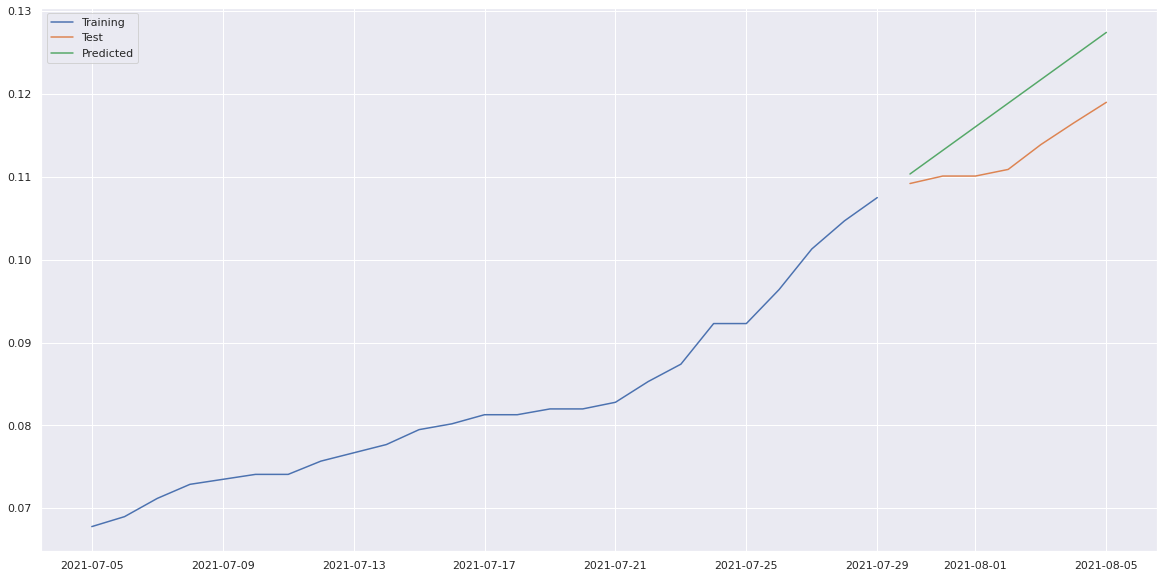

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_batung,label="Training")
plt.plot(test_batung,label="Test")
plt.plot(forecast_batung,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_batung = sqrt(mean_squared_error(test_batung, forecast_batung))
print(rms_batung)

0.006633759540639021


In [ ]:
stepwise_model_batung.fit(batung['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_batung = stepwise_model_batung.predict(n_periods=len(index_future_dates))
pred_batung = pd.DataFrame(pred_batung, columns=['Tingkat Vaksinasi'])
pred_batung.index = index_future_dates
pred_batung.tail()

Tingkat Vaksinasi
2022-06-26           0.882921
2022-06-27           0.885272
2022-06-28           0.887623
2022-06-29           0.889973
2022-06-30           0.892324

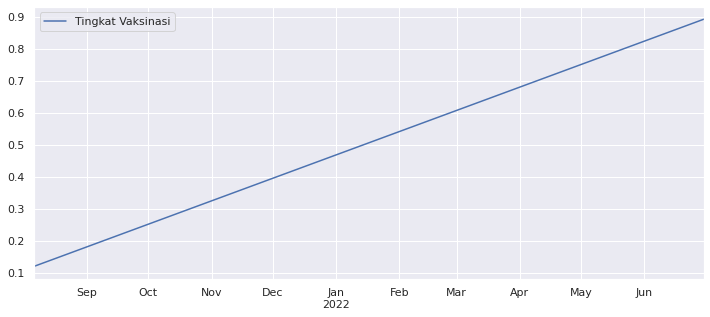

In [ ]:
pred_batung.plot(figsize=(12,5),legend=True)

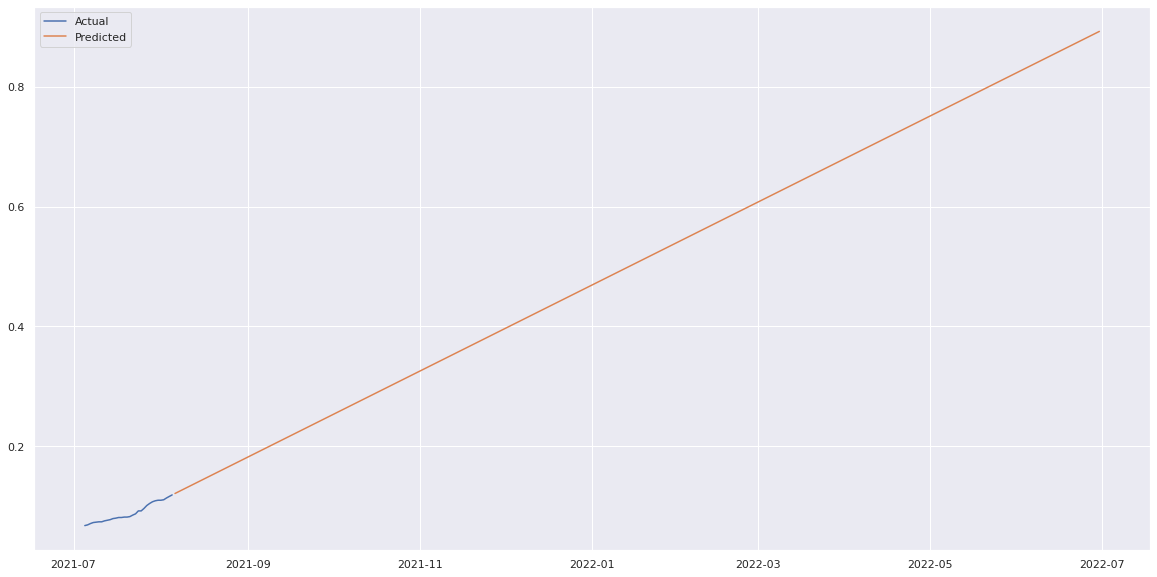

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(batung['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_batung,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Kalimantan Utara

In [ ]:
kalut = data2[data2['Provinsi']=='Kalimantan Utara']

In [ ]:
kalut.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                 
2021-07-05  Kalimantan Utara             0.0555        0
2021-07-06  Kalimantan Utara             0.0560        0
2021-07-07  Kalimantan Utara             0.0567        0
2021-07-08  Kalimantan Utara             0.0591        0
2021-07-09  Kalimantan Utara             0.0598        0

In [ ]:
kalut[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0555
2021-07-06             0.0560
2021-07-07             0.0567
2021-07-08             0.0591
2021-07-09             0.0598

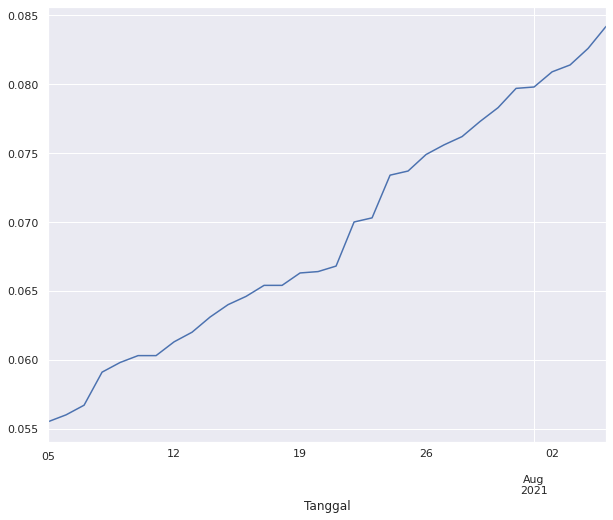

In [ ]:
kalut['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(kalut['Tingkat Vaksinasi'])

1. ADF :  1.4312698876341445
2. P-Value :  0.9972516677024086
3. Num of Lags :  4
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  27
5. Critical Values : 
	 1% : -3.6996079738860943
	 5% : -2.9764303469999494
	 10% : -2.627601001371742


In [ ]:
stepwise_model_kalut = auto_arima(kalut['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_kalut.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-352.445, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-352.954, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-354.094, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-353.211, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-326.968, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-353.089, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-350.833, Time=0.54 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-332.061, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.314 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 180.047
Date:                Mon, 23 Aug 2021   AIC                           -354.094
Time:                        02:14:00   BIC                           -349.792
Sample:                             0   HQIC                          -352.692
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.000      3.128      0.002       0.000       0.002
ar.L1         -0.3175      0.478     -0.665      0.506      -1.254       0.619
sigma2      5.218e-07   1.57e-07      3.317      0.001    2.13e-07     8.3e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                15.61
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             1.42
Prob(H) (two-sided):                  0.20   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_kalut = (kalut[['Tingkat Vaksinasi']])[:25]
test_kalut = (kalut[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_kalut = stepwise_model_kalut.fit(train_kalut)

In [ ]:
forecast_kalut = stepwise_model_kalut.predict(n_periods = len(test_kalut))

In [ ]:
forecast_kalut = pd.DataFrame(forecast_kalut, index = test_kalut.index, columns=['Prediksi'])

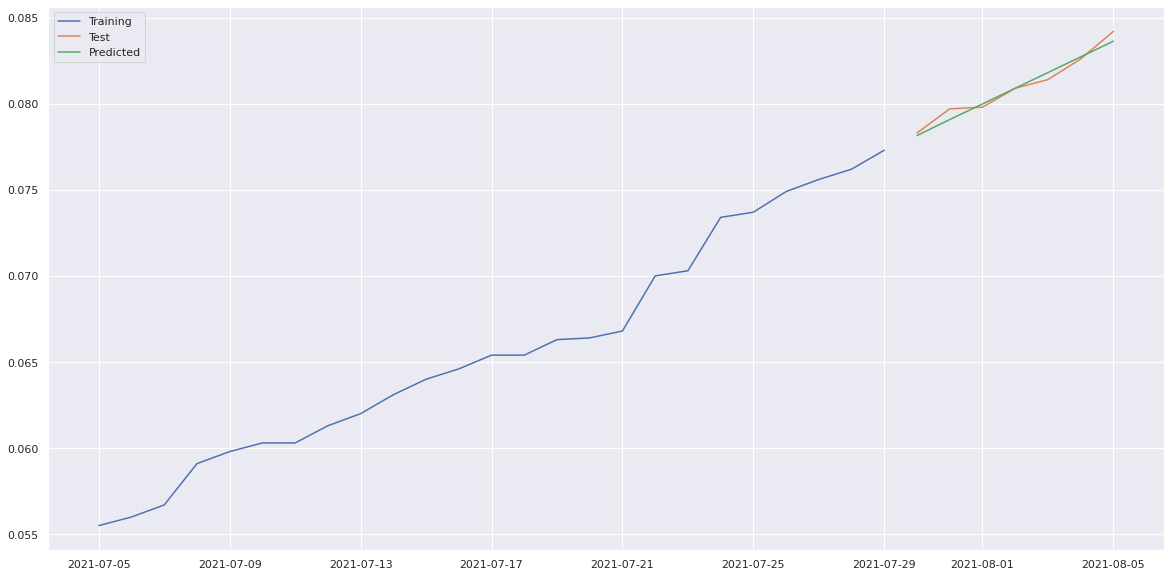

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_kalut,label="Training")
plt.plot(test_kalut,label="Test")
plt.plot(forecast_kalut,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_kalut = sqrt(mean_squared_error(test_kalut, forecast_kalut))
print(rms_kalut)

0.00036753177928302146


In [ ]:
stepwise_model_kalut.fit(kalut['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_kalut = stepwise_model_kalut.predict(n_periods=len(index_future_dates))
pred_kalut = pd.DataFrame(pred_kalut, columns=['Tingkat Vaksinasi'])
pred_kalut.index = index_future_dates
pred_kalut.tail()

Tingkat Vaksinasi
2022-06-26           0.385089
2022-06-27           0.386015
2022-06-28           0.386941
2022-06-29           0.387868
2022-06-30           0.388794

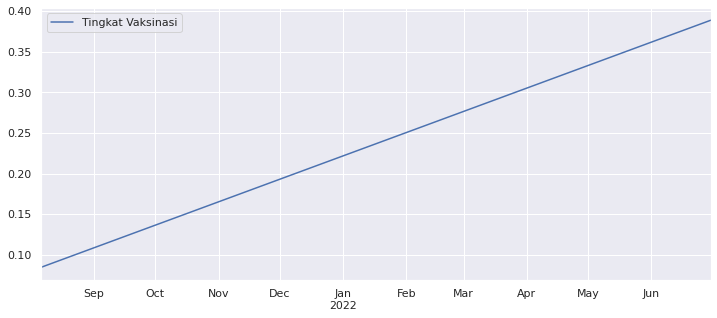

In [ ]:
pred_kalut.plot(figsize=(12,5),legend=True)

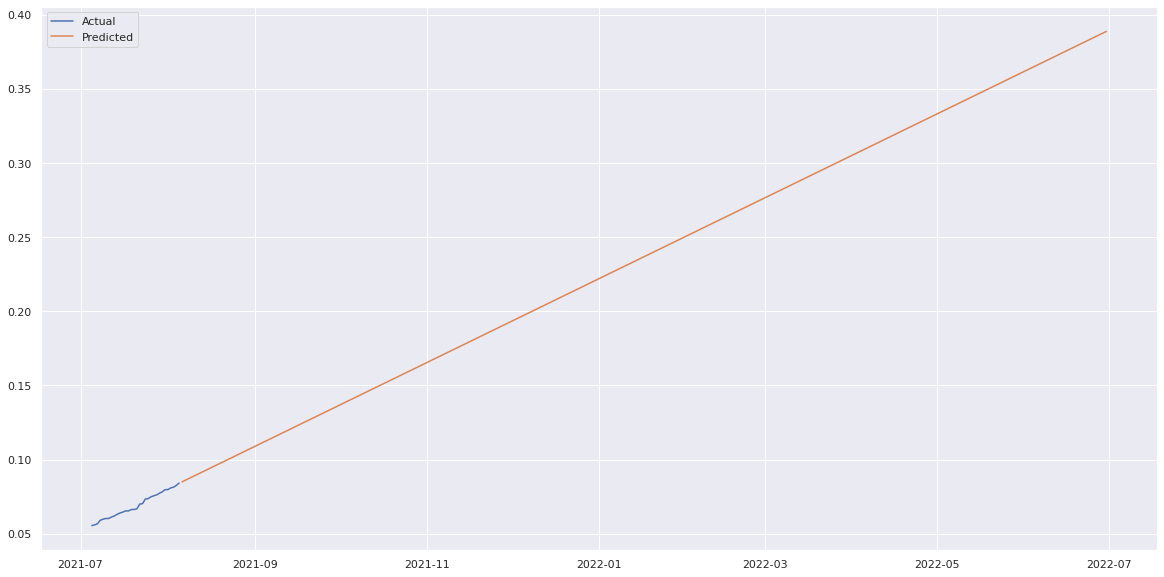

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kalut['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_kalut,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Kalimantan Tengah

In [ ]:
kalteng = data2[data2['Provinsi']=='Kalimantan Tengah']

In [ ]:
kalteng.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                                  
2021-07-05  Kalimantan Tengah             0.0842        0
2021-07-06  Kalimantan Tengah             0.0857        0
2021-07-07  Kalimantan Tengah             0.0880        0
2021-07-08  Kalimantan Tengah             0.0902        0
2021-07-09  Kalimantan Tengah             0.0918        0

In [ ]:
kalteng[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.1174
2021-08-02             0.1181
2021-08-03             0.1208
2021-08-04             0.1227
2021-08-05             0.1276

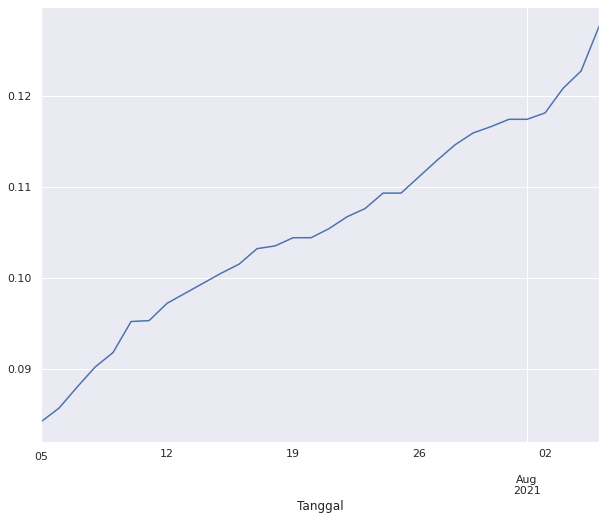

In [ ]:
kalteng['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(kalteng['Tingkat Vaksinasi'])

1. ADF :  0.3545886929836159
2. P-Value :  0.9797149448582242
3. Num of Lags :  4
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  27
5. Critical Values : 
	 1% : -3.6996079738860943
	 5% : -2.9764303469999494
	 10% : -2.627601001371742


In [ ]:
stepwise_model_kalteng = auto_arima(kalteng['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_kalteng.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-322.729, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-312.771, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-324.767, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-320.437, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-314.520, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-322.762, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-306.771, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-326.415, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-324.403, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-324.370, Time=0.24 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-322.215, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-308.521, Time=0.12 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.614 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 165.207
Date:                Mon, 23 Aug 2021   AIC                           -326.415
Time:                        02:14:04   BIC                           -323.612
Sample:                             0   HQIC                          -325.518
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6850      0.165     -4.142      0.000      -1.009      -0.361
sigma2      9.399e-07   2.11e-07      4.448      0.000    5.26e-07    1.35e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.96   Prob(JB):                         0.39
Heteroskedasticity (H):               1.98   Skew:                             0.52
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_kalteng = (kalteng[['Tingkat Vaksinasi']])[:25]
test_kalteng = (kalteng[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_kalteng = stepwise_model_kalteng.fit(train_kalteng)

In [ ]:
forecast_kalteng = stepwise_model_kalteng.predict(n_periods = len(test_kalteng))

In [ ]:
forecast_kalteng = pd.DataFrame(forecast_kalteng, index = test_kalteng.index, columns=['Prediksi'])

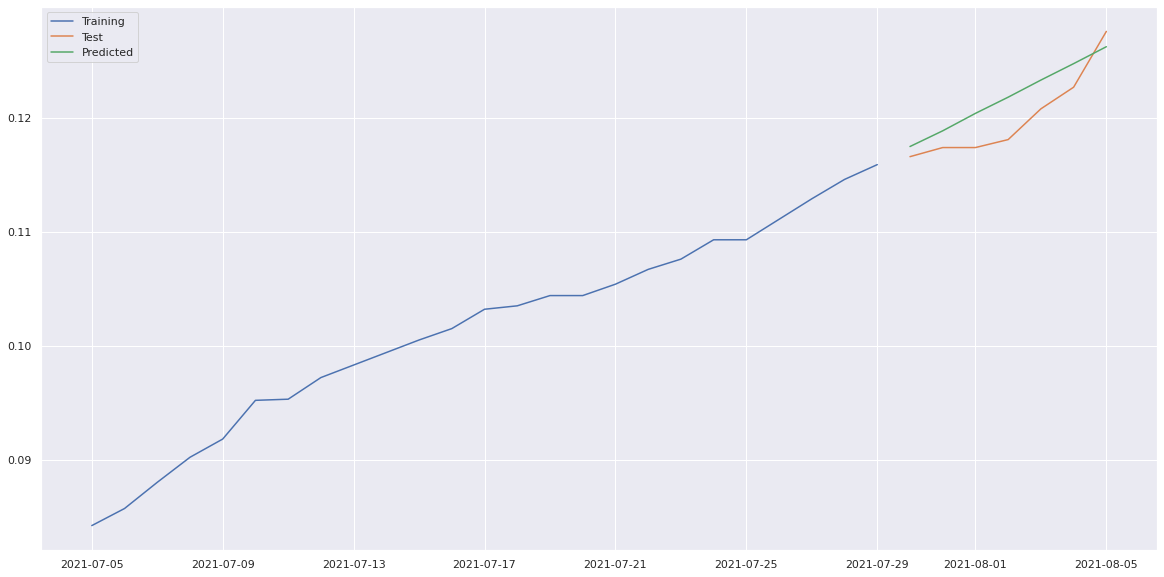

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_kalteng,label="Training")
plt.plot(test_kalteng,label="Test")
plt.plot(forecast_kalteng,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_kalteng = sqrt(mean_squared_error(test_kalteng, forecast_kalteng))
print(rms_kalteng)

0.0023394224906451338


In [ ]:
stepwise_model_kalteng.fit(kalteng['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_kalteng = stepwise_model_kalteng.predict(n_periods=len(index_future_dates))
pred_kalteng = pd.DataFrame(pred_kalteng, columns=['Tingkat Vaksinasi'])
pred_kalteng.index = index_future_dates
pred_kalteng.tail()

Tingkat Vaksinasi
2022-06-26           1.323259
2022-06-27           1.326939
2022-06-28           1.330620
2022-06-29           1.334300
2022-06-30           1.337981

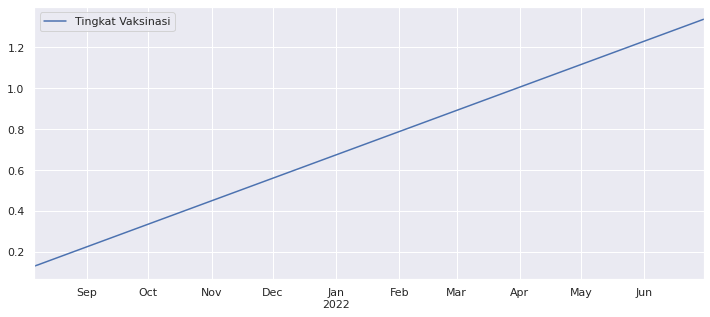

In [ ]:
pred_kalteng.plot(figsize=(12,5),legend=True)

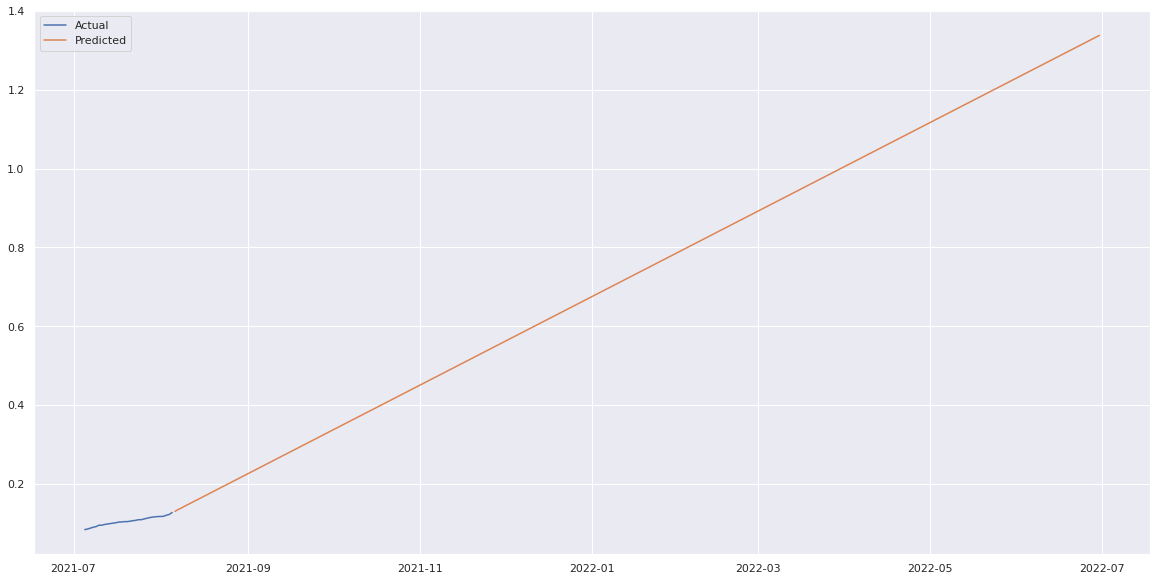

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kalteng['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_kalteng,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Kep. Riau

In [ ]:
kepri = data2[data2['Provinsi']=='Kep. Riau']

In [ ]:
kepri.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                          
2021-07-05  Kep. Riau             0.0839        0
2021-07-06  Kep. Riau             0.0851        0
2021-07-07  Kep. Riau             0.0872        0
2021-07-08  Kep. Riau             0.0888        0
2021-07-09  Kep. Riau             0.0901        0

In [ ]:
kepri[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0839
2021-07-06             0.0851
2021-07-07             0.0872
2021-07-08             0.0888
2021-07-09             0.0901

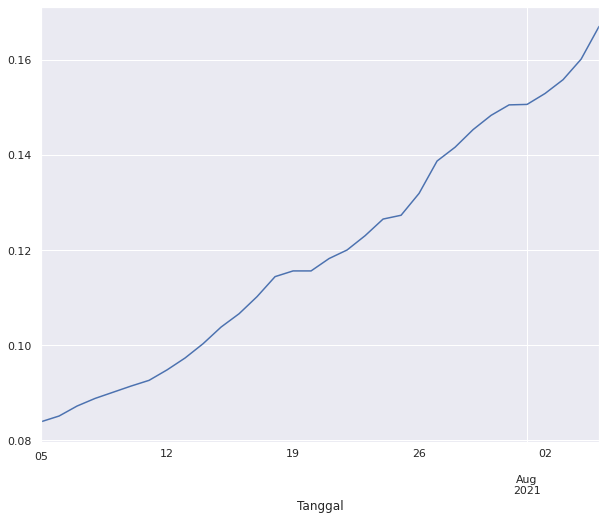

In [ ]:
kepri['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(kepri['Tingkat Vaksinasi'])

1. ADF :  2.784186274753728
2. P-Value :  1.0
3. Num of Lags :  10
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  21
5. Critical Values : 
	 1% : -3.7883858816542486
	 5% : -3.013097747543462
	 10% : -2.6463967573696143


In [ ]:
stepwise_model_kepri = auto_arima(kepri['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_kepri.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-291.214, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-294.239, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-293.448, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-294.134, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-295.857, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.481 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 148.928
Date:                Mon, 23 Aug 2021   AIC                           -295.857
Time:                        02:14:08   BIC                           -294.456
Sample:                             0   HQIC                          -295.409
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.842e-06   7.23e-07      3.932      0.000    1.43e-06    4.26e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.26   Prob(JB):                         0.73
Heteroskedasticity (H):              12.39   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_kepri = (kepri[['Tingkat Vaksinasi']])[:25]
test_kepri = (kepri[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_kepri = stepwise_model_kepri.fit(train_kepri)

In [ ]:
forecast_kepri = stepwise_model_kepri.predict(n_periods = len(test_kepri))

In [ ]:
forecast_kepri = pd.DataFrame(forecast_kepri, index = test_kepri.index, columns=['Prediksi'])

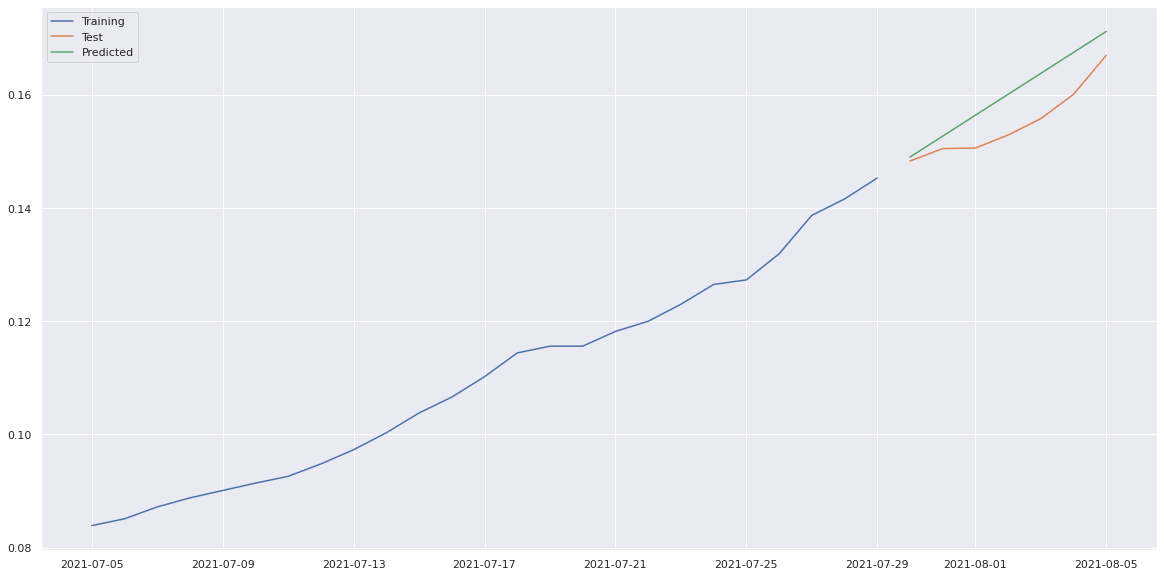

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_kepri,label="Training")
plt.plot(test_kepri,label="Test")
plt.plot(forecast_kepri,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_kepri = sqrt(mean_squared_error(test_kepri, forecast_kepri))
print(rms_kepri)

0.005697108600014894


In [ ]:
stepwise_model_kepri.fit(kepri['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_kepri = stepwise_model_kepri.predict(n_periods=len(index_future_dates))
pred_kepri = pd.DataFrame(pred_kepri, columns=['Tingkat Vaksinasi'])
pred_kepri.index = index_future_dates
pred_kepri.tail()

Tingkat Vaksinasi
2022-06-26           2.409465
2022-06-27           2.416365
2022-06-28           2.423265
2022-06-29           2.430165
2022-06-30           2.437065

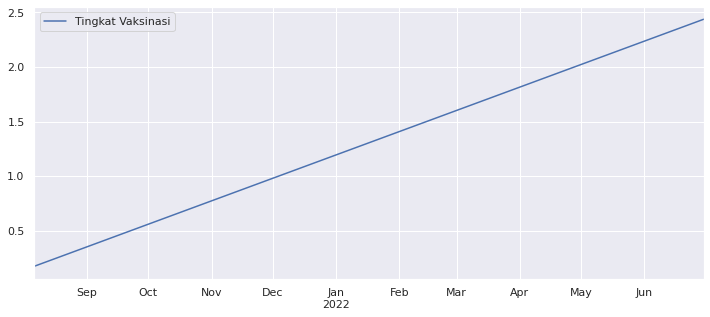

In [ ]:
pred_kepri.plot(figsize=(12,5),legend=True)

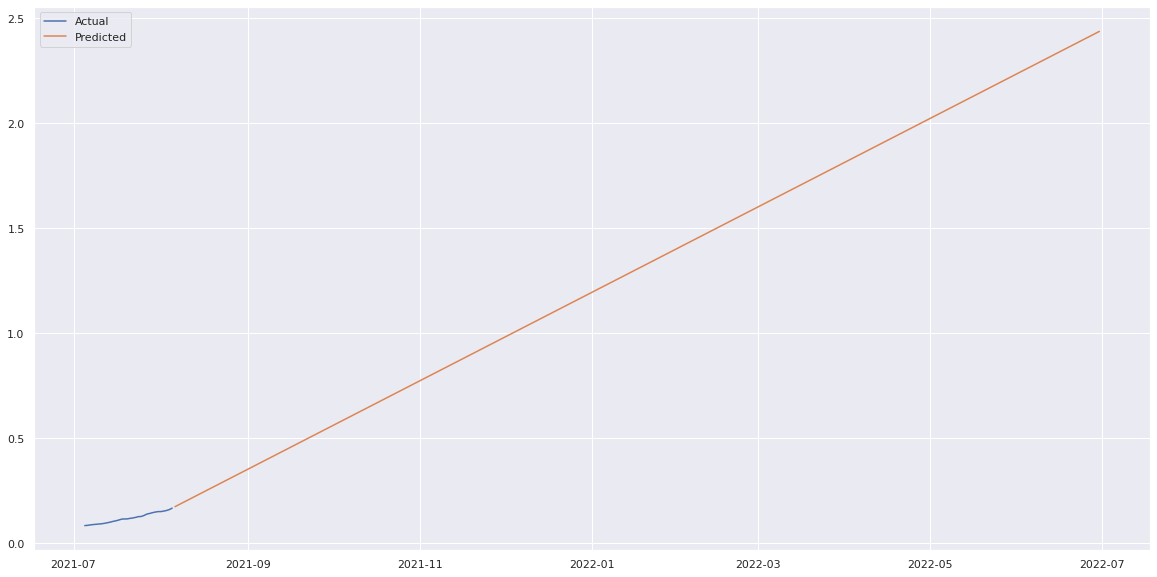

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kepri['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_kepri,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Lampung

In [ ]:
lamp = data2[data2['Provinsi']=='Lampung']

In [ ]:
lamp.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05  Lampung             0.0335        3
2021-07-06  Lampung             0.0342        3
2021-07-07  Lampung             0.0349        3
2021-07-08  Lampung             0.0356        3
2021-07-09  Lampung             0.0360        3

In [ ]:
lamp[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0335
2021-07-06             0.0342
2021-07-07             0.0349
2021-07-08             0.0356
2021-07-09             0.0360

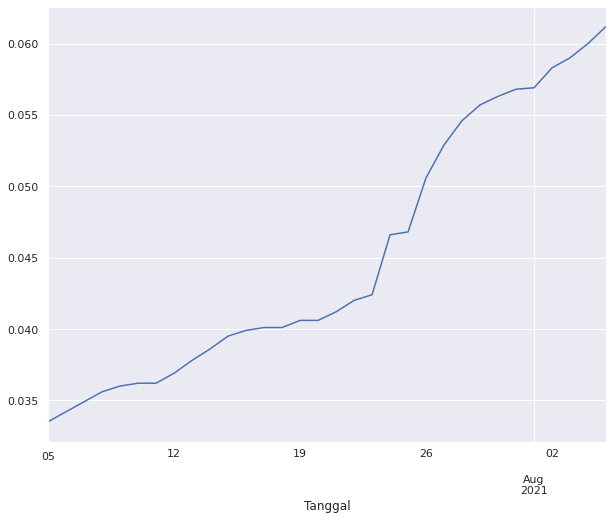

In [ ]:
lamp['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(lamp['Tingkat Vaksinasi'])

1. ADF :  0.8282488493928484
2. P-Value :  0.9920787406078176
3. Num of Lags :  5
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  26
5. Critical Values : 
	 1% : -3.7112123008648155
	 5% : -2.981246804733728
	 10% : -2.6300945562130176


In [ ]:
stepwise_model_lamp = auto_arima(lamp['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_lamp.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-327.260, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-309.292, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-328.569, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-323.658, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-311.287, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-327.760, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-303.292, Time=0.41 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-330.548, Time=0.10 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-329.735, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-329.234, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-325.382, Time=0.12 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-305.287, Time=0.12 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.943 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 167.274
Date:                Mon, 23 Aug 2021   AIC                           -330.548
Time:                        02:14:13   BIC                           -327.745
Sample:                             0   HQIC                          -329.651
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7211      0.109     -6.642      0.000      -0.934      -0.508
sigma2      8.178e-07   1.11e-07      7.347      0.000       6e-07    1.04e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                46.37
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               5.60   Skew:                             1.61
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_lamp = (kepri[['Tingkat Vaksinasi']])[:25]
test_lamp = (kepri[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_lamp = stepwise_model_lamp.fit(train_lamp)

In [ ]:
forecast_lamp = stepwise_model_lamp.predict(n_periods = len(test_lamp))

In [ ]:
forecast_lamp = pd.DataFrame(forecast_lamp, index = test_lamp.index, columns=['Prediksi'])

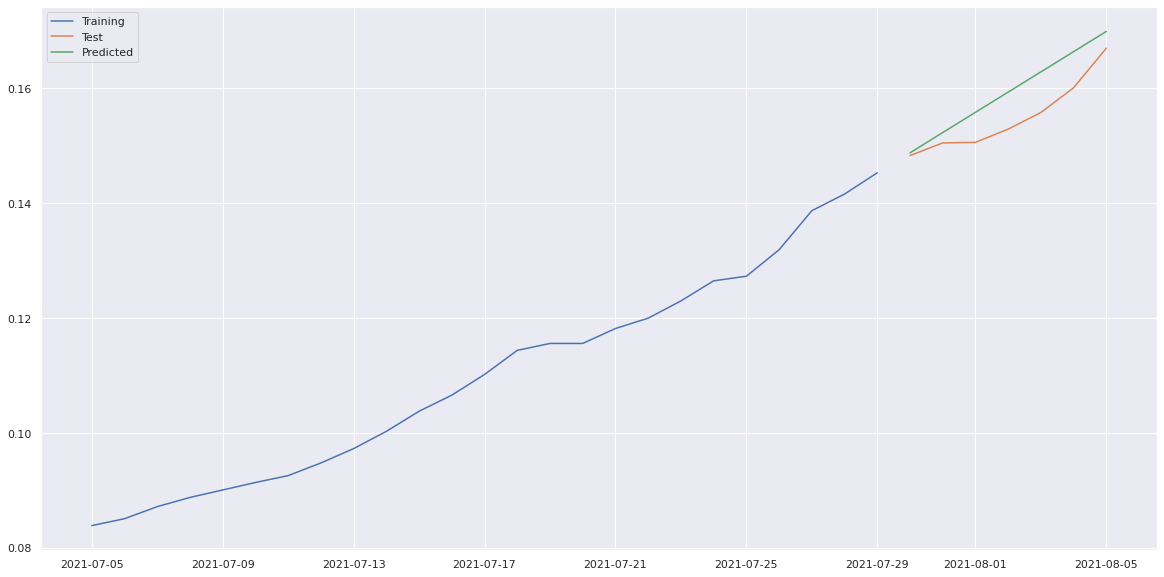

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_lamp,label="Training")
plt.plot(test_lamp,label="Test")
plt.plot(forecast_lamp,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_lamp = sqrt(mean_squared_error(test_lamp, forecast_lamp))
print(rms_lamp)

0.0049320395336380565


In [ ]:
stepwise_model_lamp.fit(lamp['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_lamp = stepwise_model_lamp.predict(n_periods=len(index_future_dates))
pred_lamp = pd.DataFrame(pred_lamp, columns=['Tingkat Vaksinasi'])
pred_lamp.index = index_future_dates
pred_lamp.tail()

Tingkat Vaksinasi
2022-06-26           0.423931
2022-06-27           0.425047
2022-06-28           0.426163
2022-06-29           0.427279
2022-06-30           0.428396

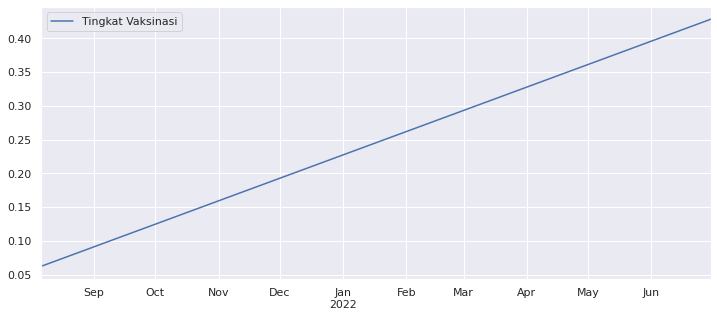

In [ ]:
pred_lamp.plot(figsize=(12,5),legend=True)

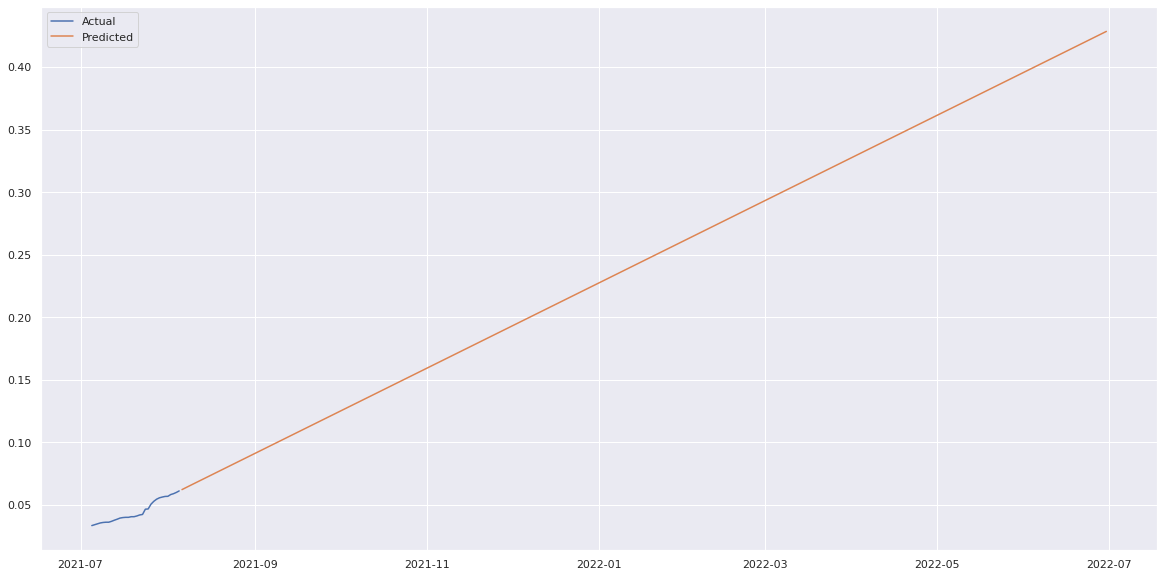

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(lamp['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_lamp,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Maluku

In [ ]:
malu = data2[data2['Provinsi']=='Maluku']

In [ ]:
malu.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05   Maluku             0.0423        0
2021-07-06   Maluku             0.0426        0
2021-07-07   Maluku             0.0429        0
2021-07-08   Maluku             0.0433        0
2021-07-09   Maluku             0.0435        0

In [ ]:
malu[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0605
2021-08-02             0.0621
2021-08-03             0.0637
2021-08-04             0.0655
2021-08-05             0.0669

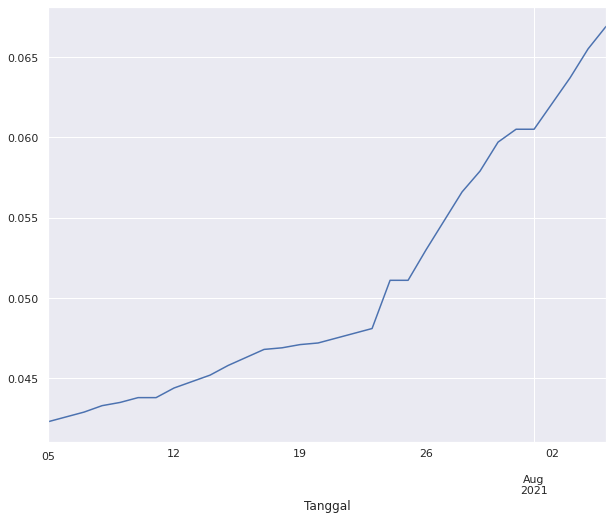

In [ ]:
malu['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(malu['Tingkat Vaksinasi'])

1. ADF :  3.4794079502136714
2. P-Value :  1.0
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_malu = auto_arima(malu['Tingkat Vaksinasi'],test='adf', m=1, trace=True,
                                 suppress_warnings=True, stepwise=True)
stepwise_model_malu.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-341.461, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-332.051, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-343.931, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-344.801, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-345.611, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-343.553, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-343.206, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-344.865, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-345.070, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-344.678, Time=0.10 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 1.278 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 175.805
Date:                Mon, 23 Aug 2021   AIC                           -345.611
Time:                        02:14:17   BIC                           -341.407
Sample:                             0   HQIC                          -344.266
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3147      0.251     -1.255      0.209      -0.806       0.177
ma.L1         -0.5483      0.269     -2.038      0.042      -1.076      -0.021
sigma2      4.636e-07   5.82e-08      7.965      0.000     3.5e-07    5.78e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                56.94
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              16.13   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_malu = (malu[['Tingkat Vaksinasi']])[:25]
test_malu = (malu[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_malu = stepwise_model_malu.fit(train_malu)

In [ ]:
forecast_malu = stepwise_model_malu.predict(n_periods = len(test_malu))

In [ ]:
forecast_malu = pd.DataFrame(forecast_malu, index = test_malu.index, columns=['Prediksi'])

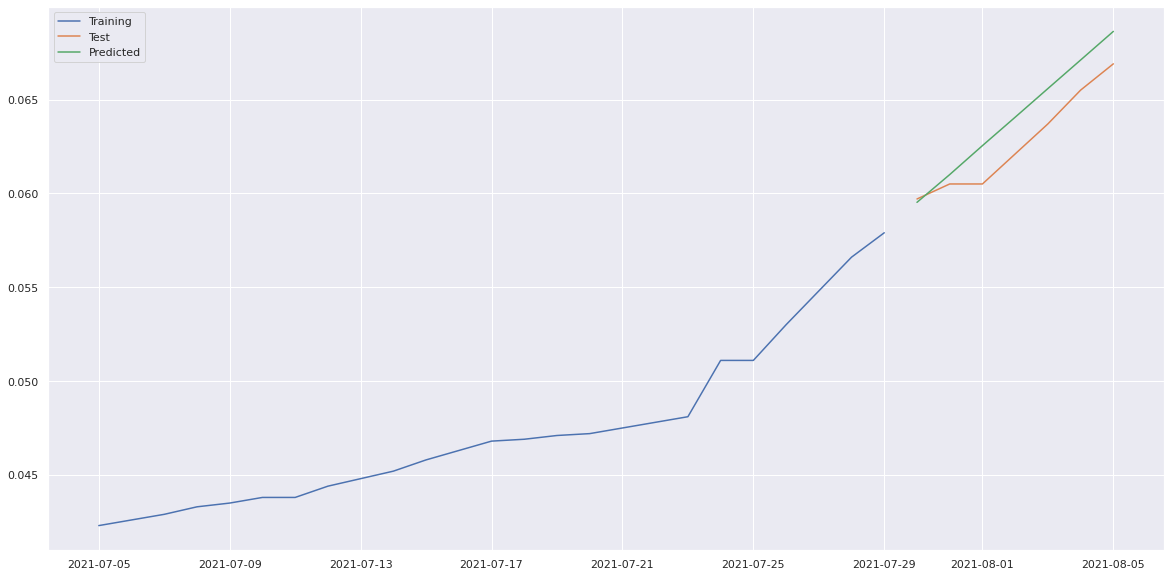

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_malu,label="Training")
plt.plot(test_malu,label="Test")
plt.plot(forecast_malu,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_malu = sqrt(mean_squared_error(test_malu, forecast_malu))
print(rms_malu)

0.0015759941147004079


In [ ]:
stepwise_model_malu.fit(malu['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_malu = stepwise_model_malu.predict(n_periods=len(index_future_dates))
pred_malu = pd.DataFrame(pred_malu, columns=['Tingkat Vaksinasi'])
pred_malu.index = index_future_dates
pred_malu.tail()

Tingkat Vaksinasi
2022-06-26           0.551881
2022-06-27           0.553373
2022-06-28           0.554866
2022-06-29           0.556358
2022-06-30           0.557850

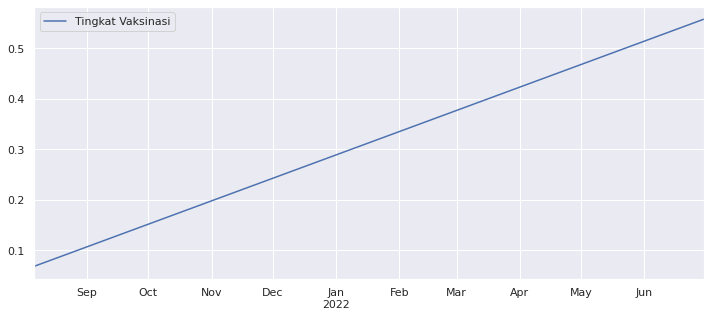

In [ ]:
pred_malu.plot(figsize=(12,5),legend=True)

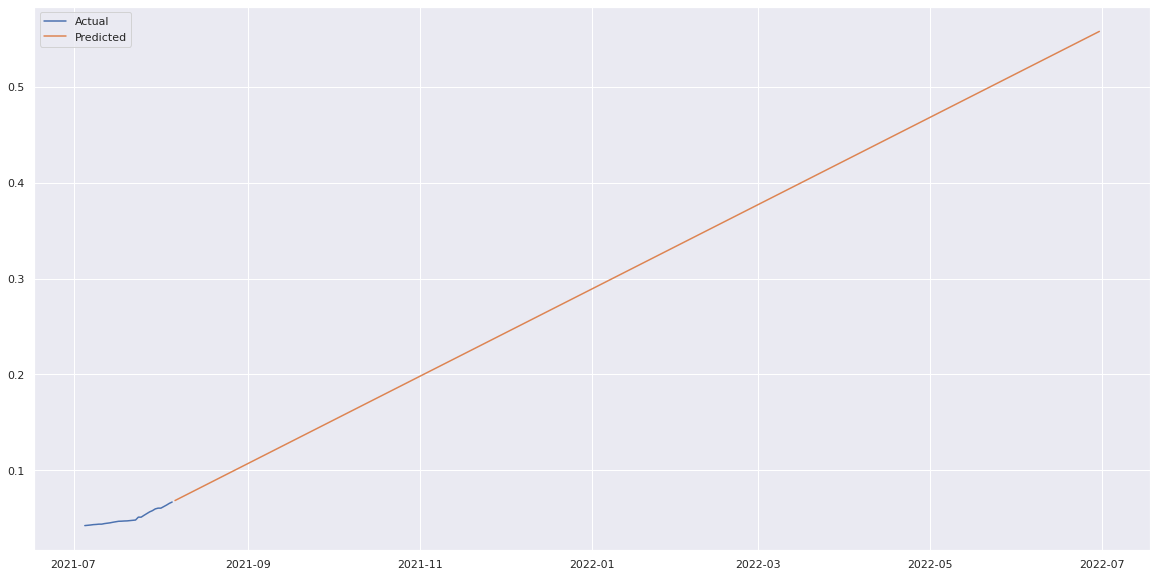

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(malu['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_malu,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di NTB

In [ ]:
ntb = data2[data2['Provinsi']=='NTB']

In [ ]:
ntb.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05      NTB             0.0477        1
2021-07-06      NTB             0.0479        1
2021-07-07      NTB             0.0481        1
2021-07-08      NTB             0.0484        1
2021-07-09      NTB             0.0486        1

In [ ]:
ntb[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0477
2021-07-06             0.0479
2021-07-07             0.0481
2021-07-08             0.0484
2021-07-09             0.0486

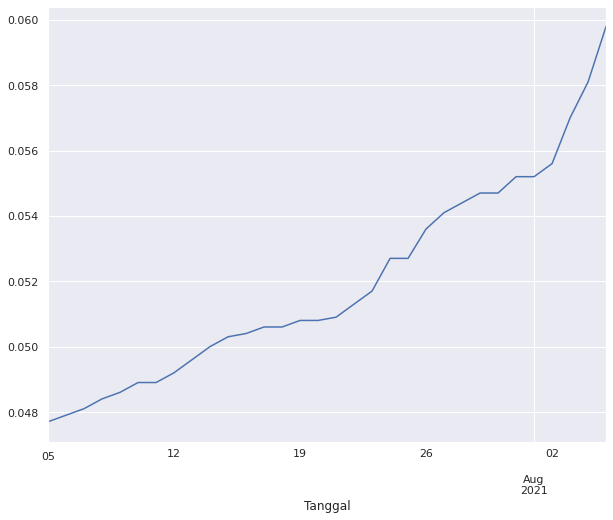

In [ ]:
ntb['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(ntb['Tingkat Vaksinasi'])

1. ADF :  2.9783068727383184
2. P-Value :  1.0
3. Num of Lags :  7
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  24
5. Critical Values : 
	 1% : -3.7377092158564813
	 5% : -2.9922162731481485
	 10% : -2.635746736111111


In [ ]:
stepwise_model_ntb = auto_arima(ntb['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                max_p=3, max_q=3, # maximum p and q
                                m=1, # frequency of series
                                d=None, # let model determine 'd'
                                seasonal=False, # No Seasonality
                                start_P=0,
                                D=0,
                                trace=True,
                                error_action='ignore',
                                suppress_warnings=True,
                                stepwise=True)
stepwise_model_ntb.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-385.997, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-379.114, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-387.987, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-384.597, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-380.665, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-386.019, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-373.113, Time=0.31 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-388.822, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-386.823, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-386.826, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-385.365, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-374.682, Time=0.31 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.714 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 196.411
Date:                Mon, 23 Aug 2021   AIC                           -388.822
Time:                        02:14:22   BIC                           -386.020
Sample:                             0   HQIC                          -387.926
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5648      0.157     -3.586      0.000      -0.873      -0.256
sigma2      1.177e-07   2.03e-08      5.812      0.000     7.8e-08    1.57e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.46
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               9.20   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_ntb = (ntb[['Tingkat Vaksinasi']])[:25]
test_ntb = (ntb[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_ntb = stepwise_model_ntb.fit(train_ntb)

In [ ]:
forecast_ntb = stepwise_model_ntb.predict(n_periods = len(test_ntb))

In [ ]:
forecast_ntb = pd.DataFrame(forecast_ntb, index = test_ntb.index, columns=['Prediksi'])

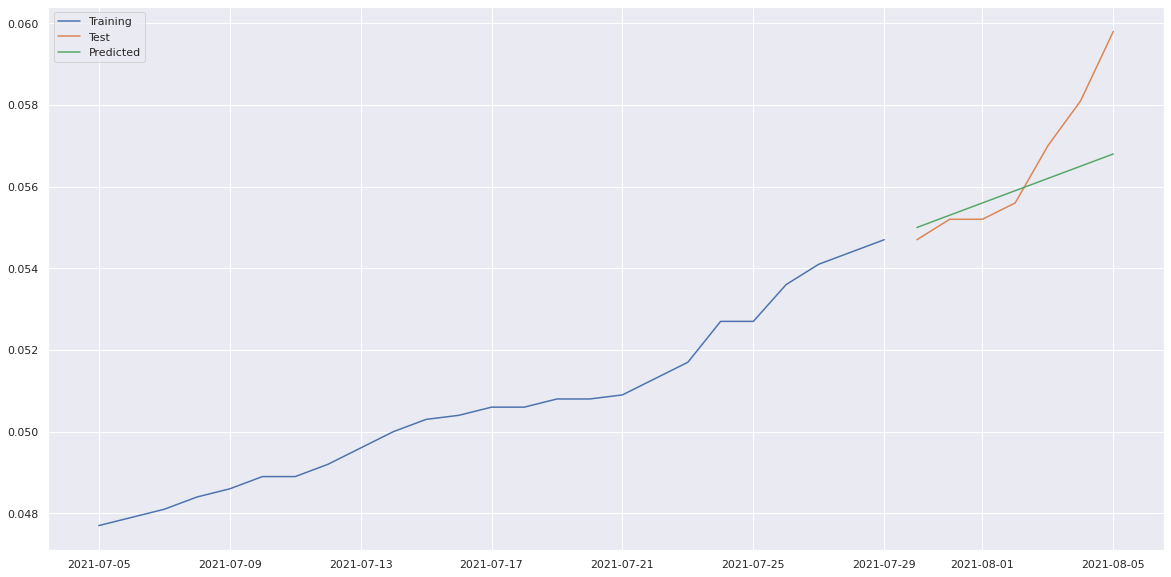

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_ntb,label="Training")
plt.plot(test_ntb,label="Test")
plt.plot(forecast_ntb,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_ntb = sqrt(mean_squared_error(test_ntb, forecast_ntb))
print(rms_ntb)

0.0013389761547007127


In [ ]:
stepwise_model_ntb.fit(ntb['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_ntb = stepwise_model_ntb.predict(n_periods=len(index_future_dates))
pred_ntb = pd.DataFrame(pred_ntb, columns=['Tingkat Vaksinasi'])
pred_ntb.index = index_future_dates
pred_ntb.tail()

Tingkat Vaksinasi
2022-06-26           0.541845
2022-06-27           0.543329
2022-06-28           0.544812
2022-06-29           0.546296
2022-06-30           0.547779

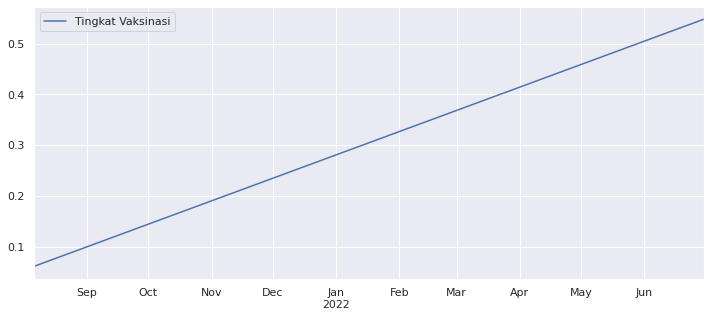

In [ ]:
pred_ntb.plot(figsize=(12,5),legend=True)

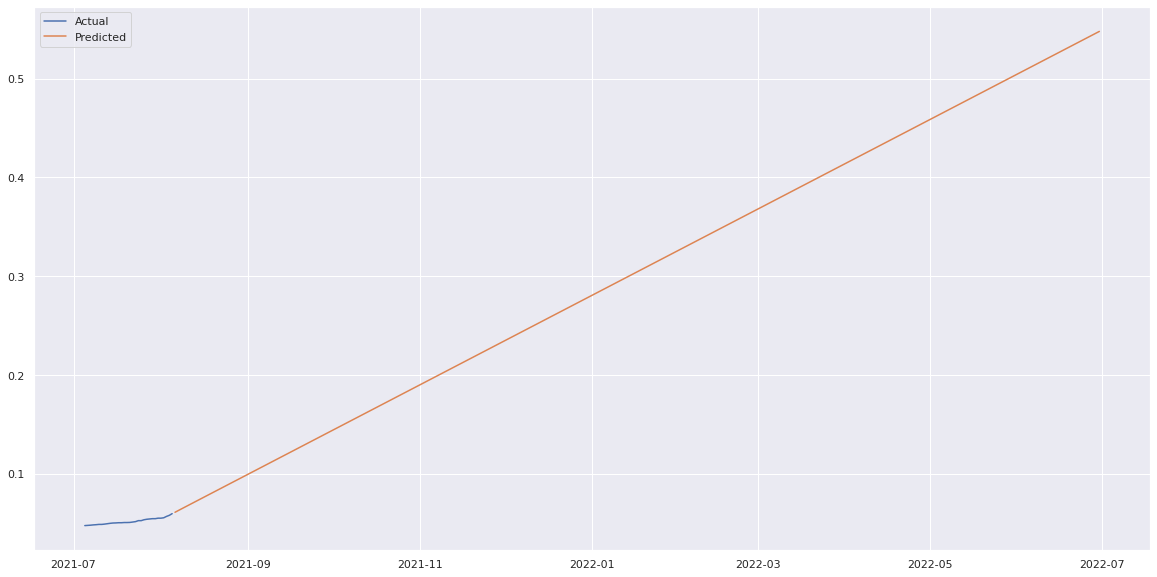

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ntb['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_ntb,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di NTT

In [ ]:
ntt = data2[data2['Provinsi']=='NTT']

In [ ]:
ntt.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-07-05      NTT             0.0484        1
2021-07-06      NTT             0.0490        1
2021-07-07      NTT             0.0499        1
2021-07-08      NTT             0.0507        1
2021-07-09      NTT             0.0516        1

In [ ]:
ntt[['Tingkat Vaksinasi']].head()

Tingkat Vaksinasi
Tanggal                      
2021-07-05             0.0484
2021-07-06             0.0490
2021-07-07             0.0499
2021-07-08             0.0507
2021-07-09             0.0516

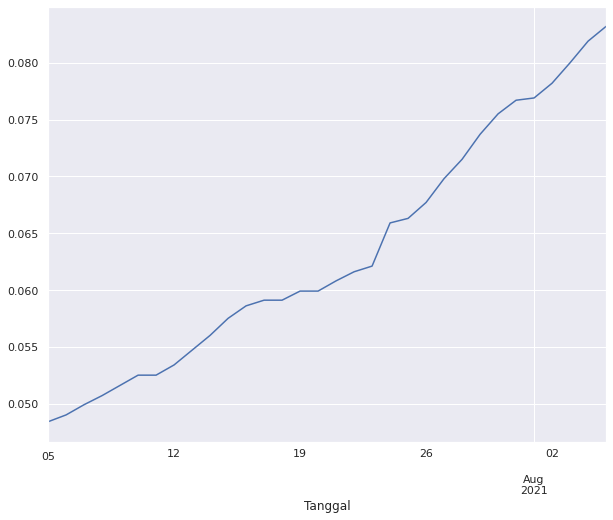

In [ ]:
ntt['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(ntt['Tingkat Vaksinasi'])

1. ADF :  1.97794322329019
2. P-Value :  0.9986435961194571
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_ntt = auto_arima(ntt['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_ntt.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-333.454, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-322.860, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-330.477, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-336.674, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-324.848, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-335.137, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-332.955, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-338.164, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-335.152, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-336.366, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-332.413, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-334.256, Time=0.14 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.363 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(0, 2, 1)   Log Likelihood                 171.082
Date:                Mon, 23 Aug 2021   AIC                           -338.164
Time:                        02:14:27   BIC                           -335.362
Sample:                             0   HQIC                          -337.268
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7341      0.175     -4.194      0.000      -1.077      -0.391
sigma2       6.29e-07   8.55e-08      7.357      0.000    4.61e-07    7.97e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                48.66
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             1.49
Prob(H) (two-sided):                  0.19   Kurtosis:                         8.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_ntt = (ntt[['Tingkat Vaksinasi']])[:25]
test_ntt = (ntt[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_ntt = stepwise_model_ntt.fit(train_ntt)

In [ ]:
forecast_ntt = stepwise_model_ntt.predict(n_periods = len(test_ntt))

In [ ]:
forecast_ntt = pd.DataFrame(forecast_ntt, index = test_ntt.index, columns=['Prediksi'])

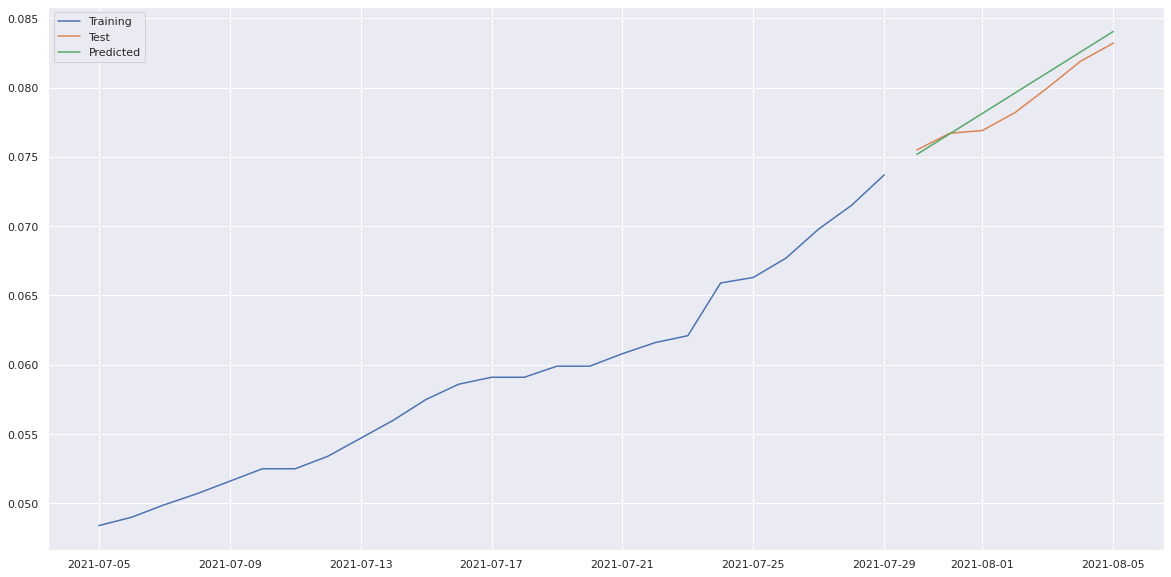

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_ntt,label="Training")
plt.plot(test_ntt,label="Test")
plt.plot(forecast_ntt,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_ntt = sqrt(mean_squared_error(test_ntt, forecast_ntt))
print(rms_ntt)

0.0009246995180683115


In [ ]:
stepwise_model_ntt.fit(ntt['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_ntt = stepwise_model_ntt.predict(n_periods=len(index_future_dates))
pred_ntt = pd.DataFrame(pred_ntt, columns=['Tingkat Vaksinasi'])
pred_ntt.index = index_future_dates
pred_ntt.tail()

Tingkat Vaksinasi
2022-06-26           0.559693
2022-06-27           0.561159
2022-06-28           0.562625
2022-06-29           0.564091
2022-06-30           0.565557

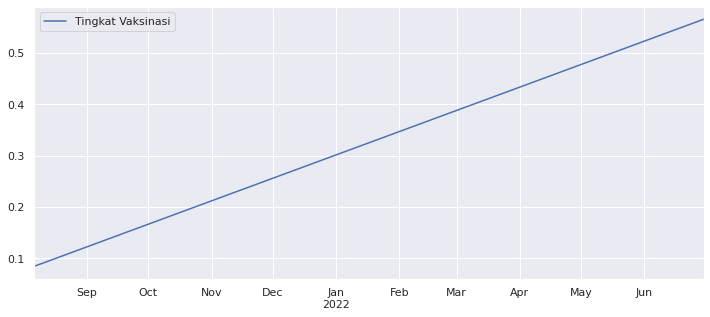

In [ ]:
pred_ntt.plot(figsize=(12,5),legend=True)

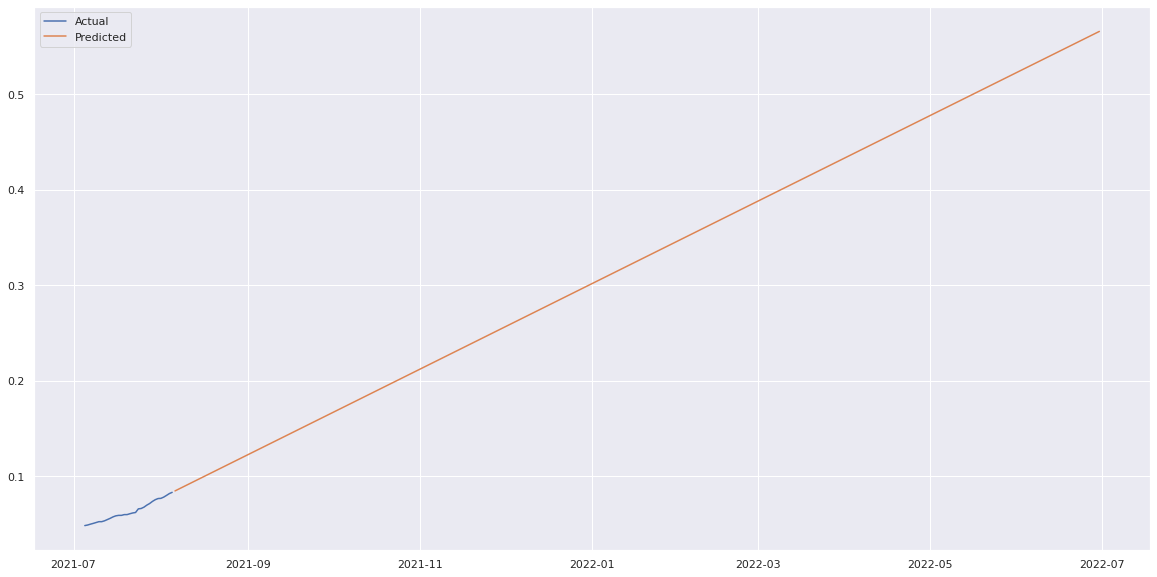

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(ntt['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_ntt,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Papua

In [ ]:
papua = data2[data2['Provinsi']=='Papua']

In [ ]:
papua.tail()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                        
2021-08-01    Papua             0.0666        1
2021-08-02    Papua             0.0684        1
2021-08-03    Papua             0.0710        1
2021-08-04    Papua             0.0736        1
2021-08-05    Papua             0.0760        1

In [ ]:
papua[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0666
2021-08-02             0.0684
2021-08-03             0.0710
2021-08-04             0.0736
2021-08-05             0.0760

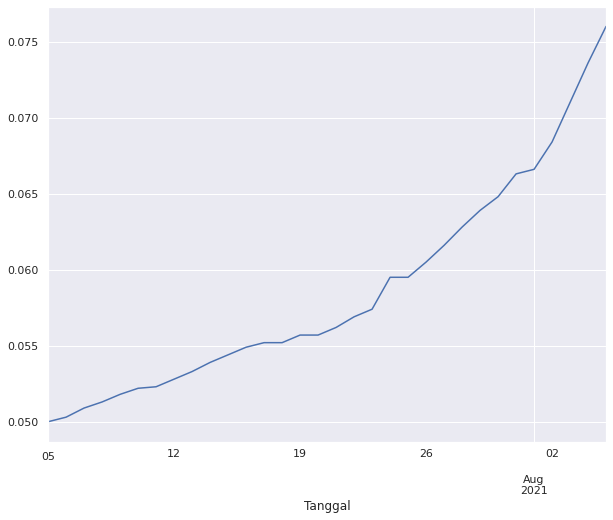

In [ ]:
papua['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(papua['Tingkat Vaksinasi'])

1. ADF :  6.340862707332532
2. P-Value :  1.0
3. Num of Lags :  0
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  31
5. Critical Values : 
	 1% : -3.661428725118324
	 5% : -2.960525341210433
	 10% : -2.6193188033298647


In [ ]:
stepwise_model_papua = auto_arima(papua['Tingkat Vaksinasi'], test='adf', m=1,
                                    start_p=1, start_q=1, # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and qtrace=True,
                                    trace=True,
                                    d=None,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_papua.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-357.712, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-349.874, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-358.562, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-358.215, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-357.804, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-355.857, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-357.646, Time=0.08 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.792 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 181.281
Date:                Mon, 23 Aug 2021   AIC                           -358.562
Time:                        02:14:31   BIC                           -355.760
Sample:                             0   HQIC                          -357.666
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5542      0.096     -5.798      0.000      -0.742      -0.367
sigma2      3.249e-07   6.09e-08      5.335      0.000    2.06e-07    4.44e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 4.88
Prob(Q):                              0.36   Prob(JB):                         0.09
Heteroskedasticity (H):              16.43   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_papua = (papua[['Tingkat Vaksinasi']])[:25]
test_papua = (papua[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_papua = stepwise_model_papua.fit(train_papua)

In [ ]:
forecast_papua = stepwise_model_papua.predict(n_periods = len(test_papua))

In [ ]:
forecast_papua = pd.DataFrame(forecast_papua, index = test_papua.index, columns=['Prediksi'])

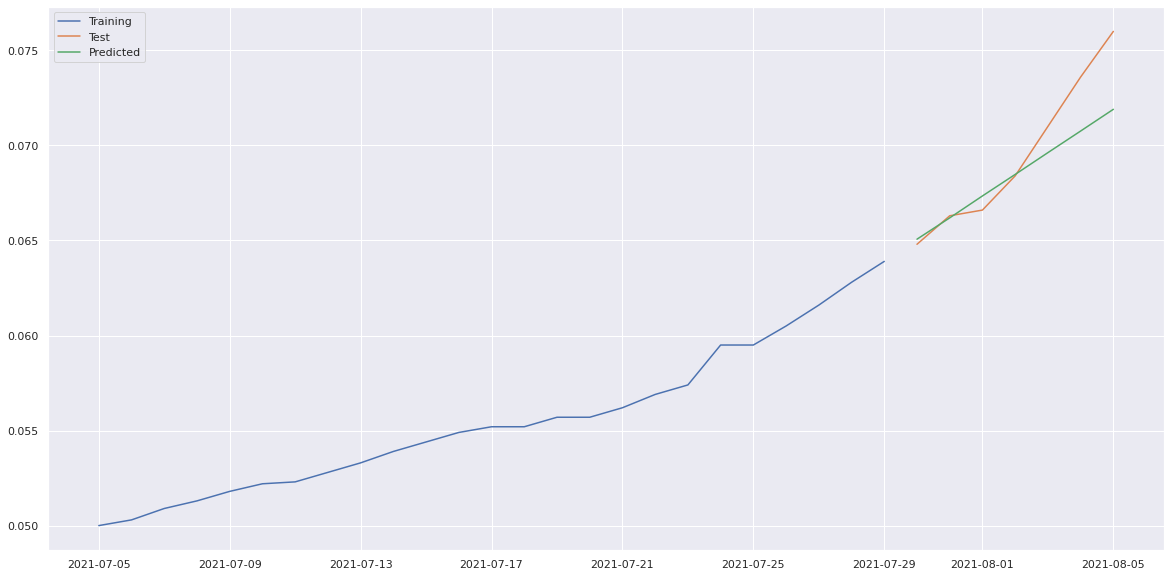

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_papua,label="Training")
plt.plot(test_papua,label="Test")
plt.plot(forecast_papua,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_papua = sqrt(mean_squared_error(test_papua, forecast_papua))
print(rms_papua)

0.0019789319755619534


In [ ]:
stepwise_model_papua.fit(papua['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_papua = stepwise_model_papua.predict(n_periods=len(index_future_dates))
pred_papua = pd.DataFrame(pred_papua, columns=['Tingkat Vaksinasi'])
pred_papua.index = index_future_dates
pred_papua.tail()

Tingkat Vaksinasi
2022-06-26           0.879203
2022-06-27           0.881675
2022-06-28           0.884146
2022-06-29           0.886617
2022-06-30           0.889089

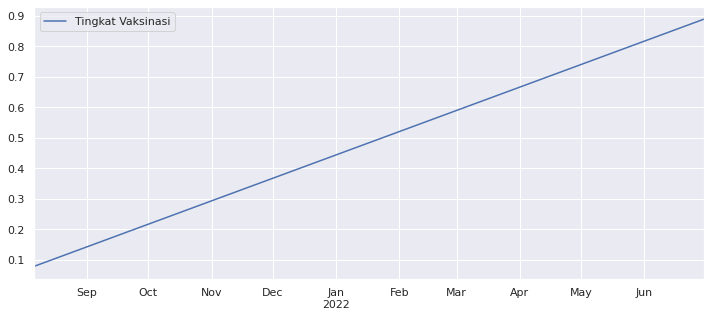

In [ ]:
pred_papua.plot(figsize=(12,5),legend=True)

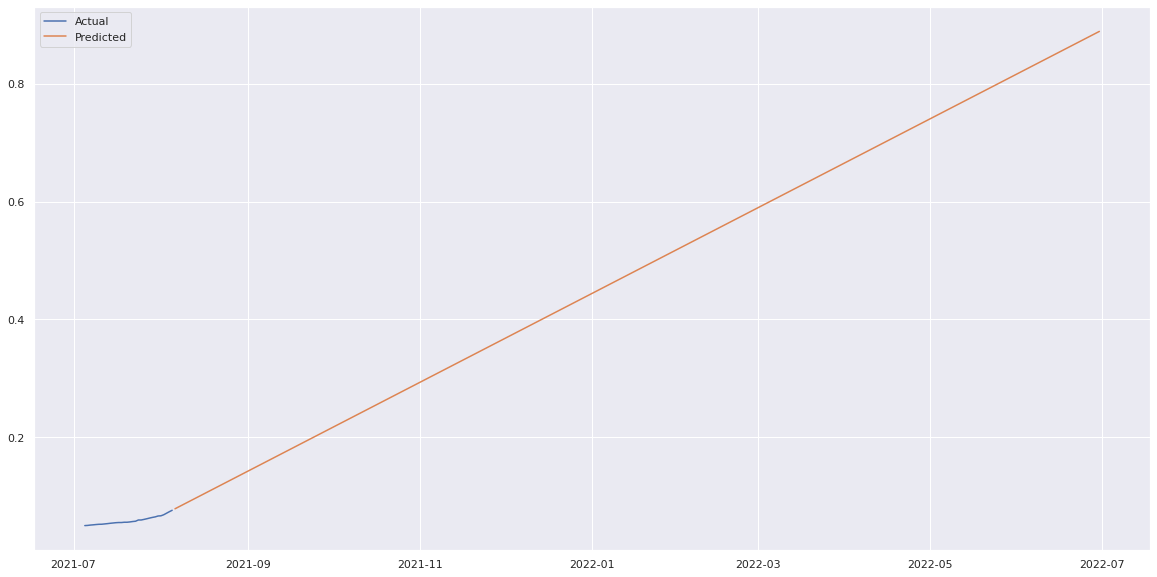

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(papua['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_papua,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# Forecasting Tingkat Vaksinasi di Papua Barat

In [ ]:
pabar = data2[data2['Provinsi']=='Papua Barat']

In [ ]:
pabar.head()

Provinsi  Tingkat Vaksinasi  Kluster
Tanggal                                            
2021-07-05  Papua Barat             0.0592        0
2021-07-06  Papua Barat             0.0605        0
2021-07-07  Papua Barat             0.0614        0
2021-07-08  Papua Barat             0.0623        0
2021-07-09  Papua Barat             0.0632        0

In [ ]:
pabar[['Tingkat Vaksinasi']].tail()

Tingkat Vaksinasi
Tanggal                      
2021-08-01             0.0842
2021-08-02             0.0863
2021-08-03             0.0888
2021-08-04             0.0915
2021-08-05             0.0936

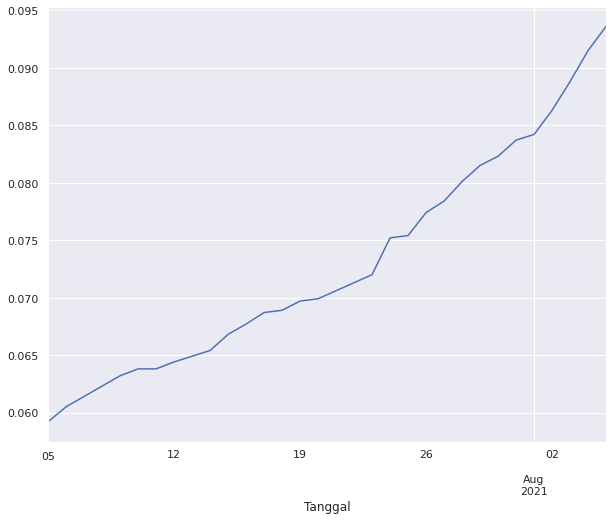

In [ ]:
pabar['Tingkat Vaksinasi'].plot(figsize=(10,8))

In [ ]:
ad_test(pabar['Tingkat Vaksinasi'])

1. ADF :  3.186269998591603
2. P-Value :  1.0
3. Num of Lags :  6
4. Num of Observations Used for ADF Regression and Critical Values Calculation :  25
5. Critical Values : 
	 1% : -3.7238633119999998
	 5% : -2.98648896
	 10% : -2.6328004


In [ ]:
stepwise_model_pabar = auto_arima(pabar['Tingkat Vaksinasi'], start_p=1, start_q=1, test='adf', # use adftest to find optimal 'd'
                                    max_p=3, max_q=3, # maximum p and q
                                    m=1, # frequency of series
                                    d=None, # let model determine 'd'
                                    seasonal=False, # No Seasonality
                                    start_P=0,
                                    D=0,
                                    trace=True,
                                    error_action='ignore',
                                    suppress_warnings=True,
                                    stepwise=True)
stepwise_model_pabar.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-342.097, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-327.017, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-343.281, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-343.111, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-328.999, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-342.048, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-340.144, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-345.010, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-343.634, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-343.630, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-343.161, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-341.894, Time=0.11 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 1.582 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 174.505
Date:                Mon, 23 Aug 2021   AIC                           -345.010
Time:                        02:14:35   BIC                           -342.207
Sample:                             0   HQIC                          -344.113
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6827      0.118     -5.789      0.000      -0.914      -0.452
sigma2      5.051e-07   7.88e-08      6.412      0.000    3.51e-07     6.6e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                19.98
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               2.50   Skew:                             1.31
Prob(H) (two-sided):                  0.16   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_pabar = (pabar[['Tingkat Vaksinasi']])[:25]
test_pabar = (pabar[['Tingkat Vaksinasi']])[-7:]

In [ ]:
stepwise_model_pabar = stepwise_model_pabar.fit(train_pabar)

In [ ]:
forecast_pabar = stepwise_model_pabar.predict(n_periods = len(test_pabar))

In [ ]:
forecast_pabar = pd.DataFrame(forecast_pabar, index = test_pabar.index, columns=['Prediksi'])

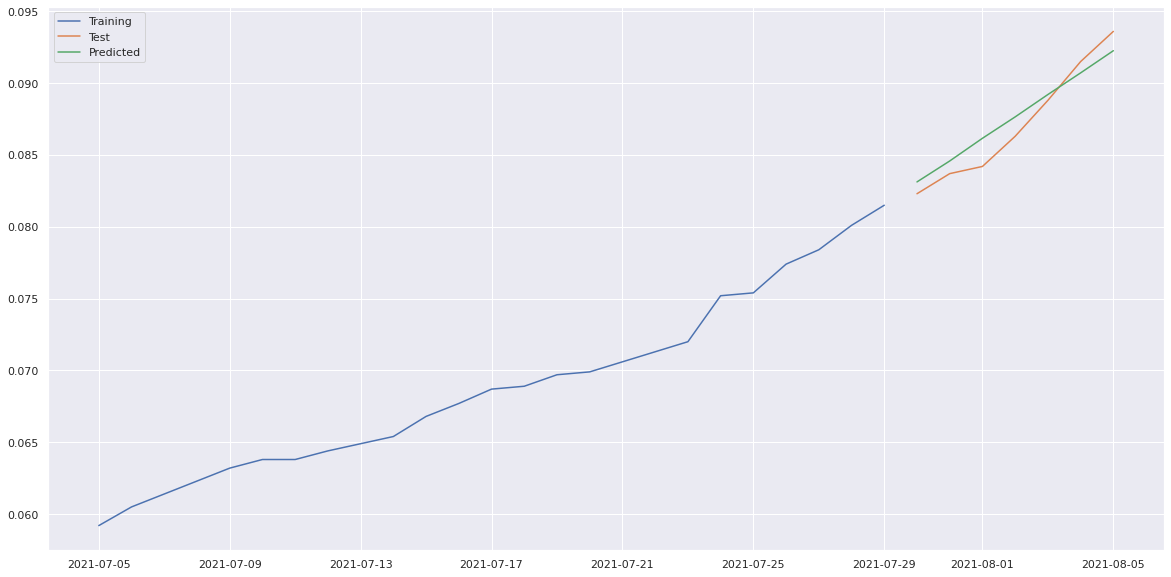

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train_pabar,label="Training")
plt.plot(test_pabar,label="Test")
plt.plot(forecast_pabar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [ ]:
rms_pabar = sqrt(mean_squared_error(test_pabar, forecast_pabar))
print(rms_pabar)

0.0011775686547623506


In [ ]:
stepwise_model_pabar.fit(pabar['Tingkat Vaksinasi'])

ARIMA(maxiter=50, method='lbfgs', order=(1, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
index_future_dates = pd.date_range(start='2021-08-06',end='2022-06-30')
pred_pabar = stepwise_model_pabar.predict(n_periods=len(index_future_dates))
pred_pabar = pd.DataFrame(pred_pabar, columns=['Tingkat Vaksinasi'])
pred_pabar.index = index_future_dates
pred_pabar.tail()

Tingkat Vaksinasi
2022-06-26           0.855315
2022-06-27           0.857659
2022-06-28           0.860002
2022-06-29           0.862346
2022-06-30           0.864689

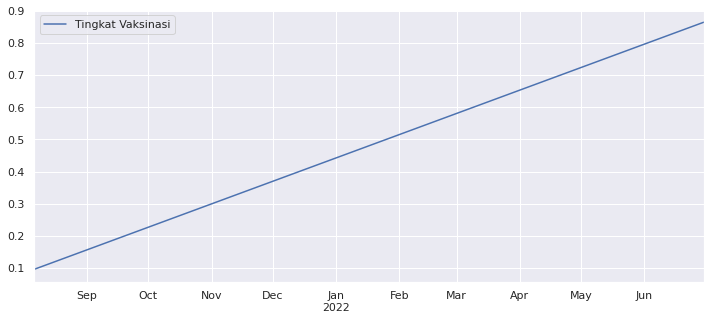

In [ ]:
pred_pabar.plot(figsize=(12,5),legend=True)

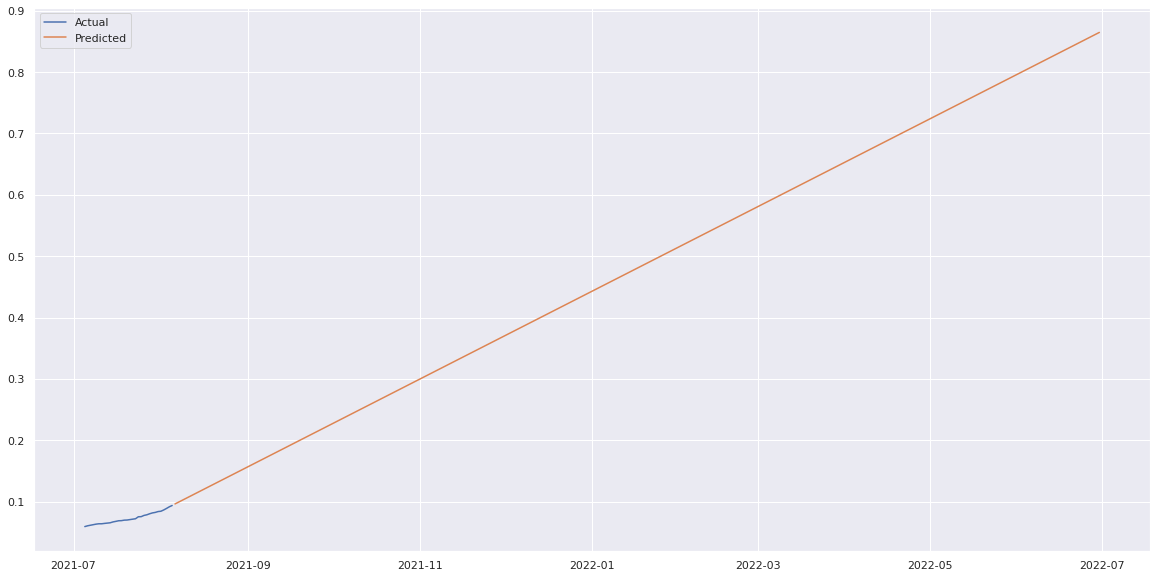

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pabar['Tingkat Vaksinasi'],label="Actual")
plt.plot(pred_pabar,label="Predicted")
plt.legend(loc = 'best')
plt.show()

# ARIMA berdasarkan cluster

## Kluster 2

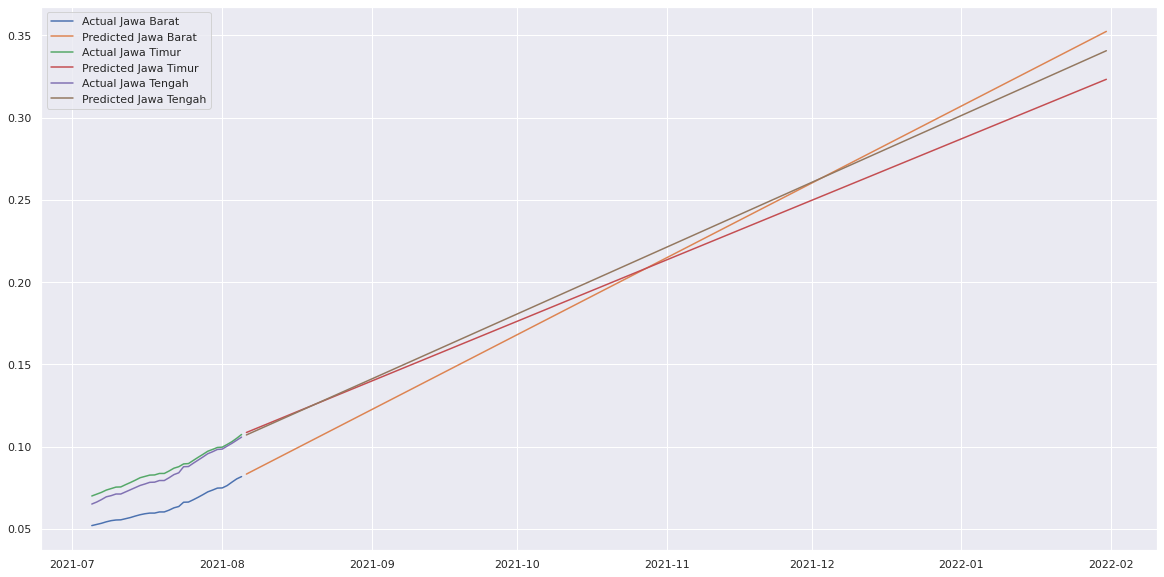

In [ ]:
# cluster 2
plt.figure(figsize=(20,10))
plt.plot(jabar['Tingkat Vaksinasi'],label="Actual Jawa Barat")
plt.plot(pred_jabar.loc[:"2022-01-31"],label="Predicted Jawa Barat")

plt.plot(jatim['Tingkat Vaksinasi'],label="Actual Jawa Timur")
plt.plot(pred_jatim.loc[:"2022-01-31"],label="Predicted Jawa Timur")

plt.plot(jateng['Tingkat Vaksinasi'],label="Actual Jawa Tengah")
plt.plot(pred_jateng.loc[:"2022-01-31"],label="Predicted Jawa Tengah")

plt.legend(loc = 'best')

## Kluster 0

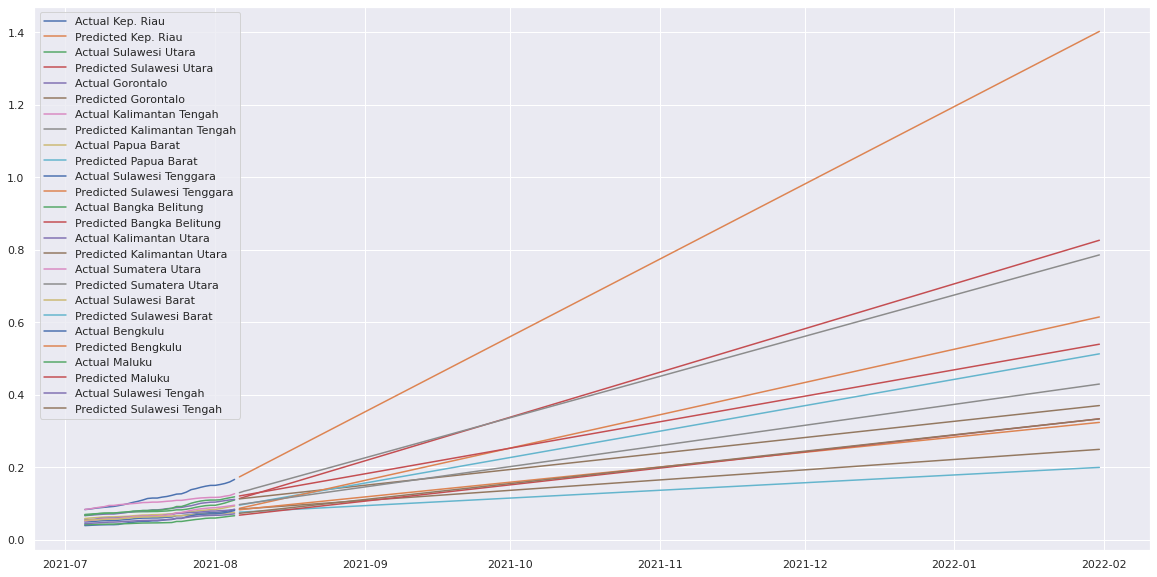

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(kepri['Tingkat Vaksinasi'],label="Actual Kep. Riau")
plt.plot(pred_kepri.loc[:"2022-01-31"],label="Predicted Kep. Riau")

plt.plot(sulut['Tingkat Vaksinasi'],label="Actual Sulawesi Utara")
plt.plot(pred_sulut.loc[:"2022-01-31"],label="Predicted Sulawesi Utara")

plt.plot(gorontalo['Tingkat Vaksinasi'],label="Actual Gorontalo")
plt.plot(pred_gorontalo.loc[:"2022-01-31"],label="Predicted Gorontalo")

plt.plot(kalteng['Tingkat Vaksinasi'],label="Actual Kalimantan Tengah")
plt.plot(pred_kalteng.loc[:"2022-01-31"],label="Predicted Kalimantan Tengah")

plt.plot(pabar['Tingkat Vaksinasi'],label="Actual Papua Barat")
plt.plot(pred_pabar.loc[:"2022-01-31"],label="Predicted Papua Barat")

plt.plot(sultra['Tingkat Vaksinasi'],label="Actual Sulawesi Tenggara")
plt.plot(pred_sultra.loc[:"2022-01-31"],label="Predicted Sulawesi Tenggara")

plt.plot(batung['Tingkat Vaksinasi'],label="Actual Bangka Belitung")
plt.plot(pred_batung.loc[:"2022-01-31"],label="Predicted Bangka Belitung")

plt.plot(kalut['Tingkat Vaksinasi'],label="Actual Kalimantan Utara")
plt.plot(pred_kalut.loc[:"2022-01-31"],label="Predicted Kalimantan Utara")

plt.plot(sumut['Tingkat Vaksinasi'],label="Actual Sumatera Utara")
plt.plot(pred_sumut.loc[:"2022-01-31"],label="Predicted Sumatera Utara")

plt.plot(sulbar['Tingkat Vaksinasi'],label="Actual Sulawesi Barat")
plt.plot(pred_sulbar.loc[:"2022-01-31"],label="Predicted Sulawesi Barat")

plt.plot(bengkulu['Tingkat Vaksinasi'],label="Actual Bengkulu")
plt.plot(pred_bengkulu.loc[:"2022-01-31"],label="Predicted Bengkulu")

plt.plot(malu['Tingkat Vaksinasi'],label="Actual Maluku")
plt.plot(pred_malu.loc[:"2022-01-31"],label="Predicted Maluku")

plt.plot(sulteng['Tingkat Vaksinasi'],label="Actual Sulawesi Tengah")
plt.plot(pred_sulteng.loc[:"2022-01-31"],label="Predicted Sulawesi Tengah")

plt.legend(loc = 'best')
plt.show()

#array(['Kep. Riau', 'Sulawesi Utara', 'Gorontalo', 'Kalimantan Tengah',
       #'Papua Barat', 'Sulawesi Tenggara', 'Bangka Belitung',
       #'Kalimantan Utara', 'Sumatera Utara', 'Sulawesi Barat', 'Bengkulu',
       #'Maluku', 'Sulawesi Tengah'], dtype=object)

## Kluster 1

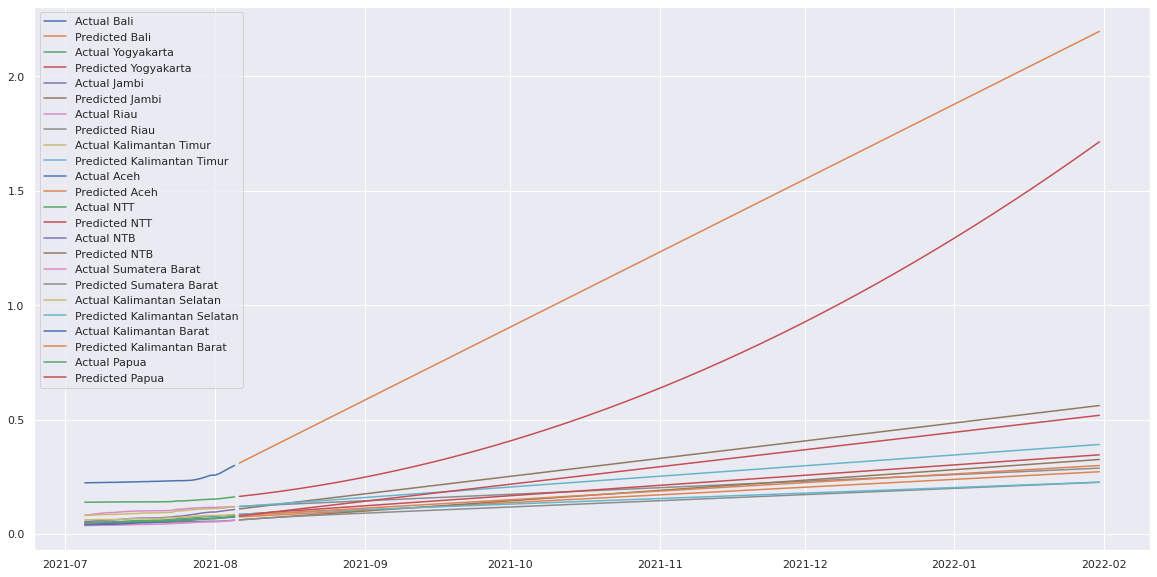

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(bali['Tingkat Vaksinasi'],label="Actual Bali")
plt.plot(pred_bali.loc[:"2022-01-31"],label="Predicted Bali")

plt.plot(yogya['Tingkat Vaksinasi'],label="Actual Yogyakarta")
plt.plot(pred_yogya.loc[:"2022-01-31"],label="Predicted Yogyakarta")

plt.plot(jambi['Tingkat Vaksinasi'],label="Actual Jambi")
plt.plot(pred_jambi.loc[:"2022-01-31"],label="Predicted Jambi")

plt.plot(riau['Tingkat Vaksinasi'],label="Actual Riau")
plt.plot(pred_riau.loc[:"2022-01-31"],label="Predicted Riau")

plt.plot(kaltim['Tingkat Vaksinasi'],label="Actual Kalimantan Timur")
plt.plot(pred_kaltim.loc[:"2022-01-31"],label="Predicted Kalimantan Timur")

plt.plot(aceh['Tingkat Vaksinasi'],label="Actual Aceh")
plt.plot(pred_aceh.loc[:"2022-01-31"],label="Predicted Aceh")

plt.plot(ntt['Tingkat Vaksinasi'],label="Actual NTT")
plt.plot(pred_ntt.loc[:"2022-01-31"],label="Predicted NTT")

plt.plot(ntb['Tingkat Vaksinasi'],label="Actual NTB")
plt.plot(pred_ntb.loc[:"2022-01-31"],label="Predicted NTB")

plt.plot(sumbar['Tingkat Vaksinasi'],label="Actual Sumatera Barat")
plt.plot(pred_sumbar.loc[:"2022-01-31"],label="Predicted Sumatera Barat")

plt.plot(kalsel['Tingkat Vaksinasi'],label="Actual Kalimantan Selatan")
plt.plot(pred_kalsel.loc[:"2022-01-31"],label="Predicted Kalimantan Selatan")

plt.plot(kalbar['Tingkat Vaksinasi'],label="Actual Kalimantan Barat")
plt.plot(pred_kalbar.loc[:"2022-01-31"],label="Predicted Kalimantan Barat")

plt.plot(papua['Tingkat Vaksinasi'],label="Actual Papua")
plt.plot(pred_papua.loc[:"2022-01-31"],label="Predicted Papua")

plt.legend(loc = 'best')
plt.show()


#array(['Bali', 'yogyakarta', 'Jambi', 'Riau', 'Kalimantan Timur', 'Aceh',
       #'NTT', 'NTB', 'Sumatera Barat', 'Kalimantan Selatan',
       #'Kalimantan Barat', 'Papua'], dtype=object

## Kluster 3

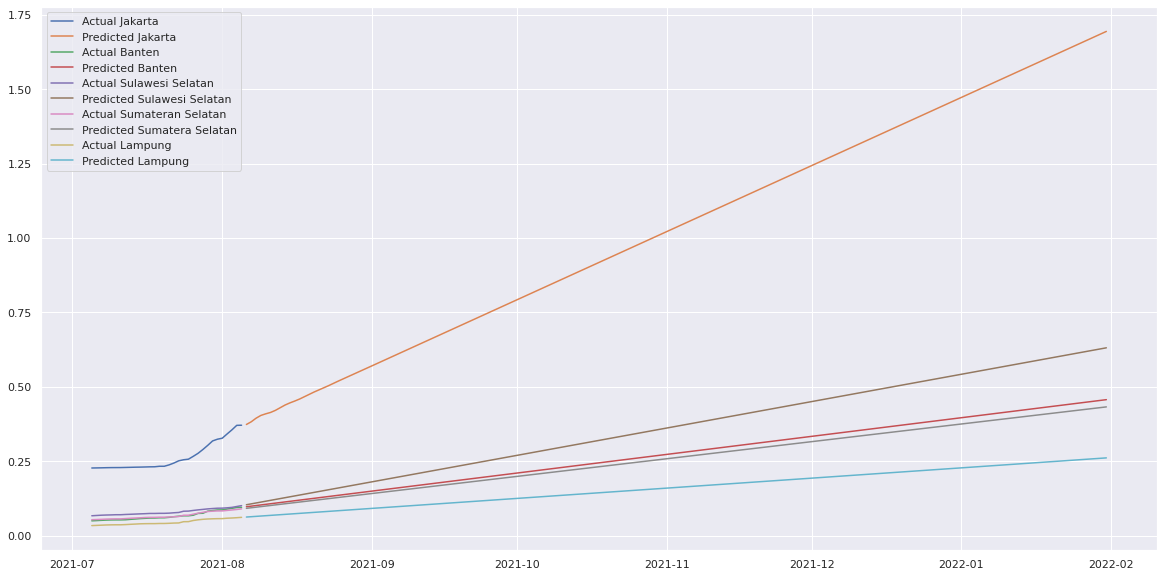

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(jakarta['Tingkat Vaksinasi'],label="Actual Jakarta")
plt.plot(pred_jakarta.loc[:"2022-01-31"],label="Predicted Jakarta")

plt.plot(banten['Tingkat Vaksinasi'],label="Actual Banten")
plt.plot(pred_banten.loc[:"2022-01-31"],label="Predicted Banten")

plt.plot(sulsel['Tingkat Vaksinasi'],label="Actual Sulawesi Selatan")
plt.plot(pred_sulsel.loc[:"2022-01-31"],label="Predicted Sulawesi Selatan")

plt.plot(sumsel['Tingkat Vaksinasi'],label="Actual Sumateran Selatan")
plt.plot(pred_sumsel.loc[:"2022-01-31"],label="Predicted Sumatera Selatan")

plt.plot(lamp['Tingkat Vaksinasi'],label="Actual Lampung")
plt.plot(pred_lamp.loc[:"2022-01-31"],label="Predicted Lampung")

plt.legend(loc = 'best')
plt.show()

#array(['Jakarta', 'Banten', 'Sulawesi Selatan', 'Sumatera Selatan',
       #'Lampung'], dtype=object)

# Perhitungan Per Provinsi

In [ ]:
p = "2022-01-31"

In [ ]:
pred_jakarta.loc[p]

Tingkat Vaksinasi    1.693848
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_bali.loc[p]

Tingkat Vaksinasi    2.196505
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_yogya.loc[p]

Tingkat Vaksinasi    1.713983
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_banten.loc[p]

Tingkat Vaksinasi    0.456596
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_jateng.loc[p]

Tingkat Vaksinasi    0.340722
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_jabar.loc[p]

Tingkat Vaksinasi    0.352466
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_jatim.loc[p]

Tingkat Vaksinasi    0.323345
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_kepri.loc[p]

Tingkat Vaksinasi    1.402081
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sulut.loc[p]

Tingkat Vaksinasi    0.826311
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_jambi.loc[p]

Tingkat Vaksinasi    0.561164
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_gorontalo.loc[p]

Tingkat Vaksinasi    0.370584
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_kalteng.loc[p]

Tingkat Vaksinasi    0.785909
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sulsel.loc[p]

Tingkat Vaksinasi    0.630797
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_pabar.loc[p]

Tingkat Vaksinasi    0.513174
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sultra.loc[p]

Tingkat Vaksinasi    0.614879
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_batung.loc[p]

Tingkat Vaksinasi    0.539744
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_riau.loc[p]

Tingkat Vaksinasi    0.287423
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_kaltim.loc[p]

Tingkat Vaksinasi    0.3909
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_kalut.loc[p]

Tingkat Vaksinasi    0.249847
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sumut.loc[p]

Tingkat Vaksinasi    0.429896
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_aceh.loc[p]

Tingkat Vaksinasi    0.271652
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sulbar.loc[p]

Tingkat Vaksinasi    0.200145
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_bengkulu.loc[p]

Tingkat Vaksinasi    0.324189
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_ntt.loc[p]

Tingkat Vaksinasi    0.345638
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sumsel.loc[p]

Tingkat Vaksinasi    0.432279
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_malu.loc[p]

Tingkat Vaksinasi    0.334023
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_ntb.loc[p]

Tingkat Vaksinasi    0.325261
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sulteng.loc[p]

Tingkat Vaksinasi    0.333924
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_sumbar.loc[p]

Tingkat Vaksinasi    0.225672
Name: 2022-01-31 00:00:00, dtype: float64

In [ ]:
pred_kalsel.loc[p]

Tingkat Vaksinasi    0.22619
Name: 2022-01-31 00:00:00, dtype: float64